# MIS710 Machine Learning in Business - Assignment 2

##Load Libraries and Data

In [ ]:
# Load requires libraries
#load libraries
import pandas as pd #for data manipulation and analysis
import numpy as np #for working with arrays

#import data visualisation libraries
import matplotlib.pyplot as plt
import seaborn as sns
#Mount google drive
from google.colab import drive
drive.mount('/content/drive')

# Load data from CloudDeakin
food_data=pd.read_csv("/content/drive/MyDrive/FoodieBay.csv")



Mounted at /content/drive


In [ ]:
food_data

url  \
0      https://www.zomato.com/bangalore/d2v-cafe-1-ba...   
1      https://www.zomato.com/bangalore/the-burger-pl...   
2      https://www.zomato.com/bangalore/millet-mama-b...   
3      https://www.zomato.com/bangalore/red-onion-sha...   
4      https://www.zomato.com/bangalore/chaiywaala-da...   
...                                                  ...   
40125  https://www.zomato.com/bangalore/yumlane-brook...   
40126  https://www.zomato.com/bangalore/american-dess...   
40127  https://www.zomato.com/bangalore/new-arya-bhav...   
40128  https://www.zomato.com/bangalore/le-charcoal-x...   
40129  https://www.zomato.com/bangalore/kaati-zone-ch...   

                                                 address                 name  \
0      173/218, GF, Opposite Ranka Colony, Bannerghat...             D2V Cafe   
1      2nd Floor, MMR Plaza, Above DCB Bank, Sarjapur...     The Burger Place   
2      Next To Surana College, South End Circle, Basa...          Millet Mama   
3      Money Chambers Double Road, Shanti Nagar, Bang...            Red Onion   
4      Shop 67, 69, 70, Inside Ramaiah Campus, New BE...  Chaiywaala Da Dhaba   
...                                                  ...                  ...   
40125  ACES Layout Road, Kundanahalli Gate, Brookefie...              Yumlane   
40126  18, 2nd H Cross, Dodda Banaswadi Main Road, Ne...    American Desserts   
40127                            113, MG Road, Bangalore      New Arya Bhavan   
40128  2334, Aarush Arcade, 17th Cross, 1st Sector, H...   Le Charcoal Xpress   
40129       48, Triumph Towers, Church Street, Bangalore           Kaati Zone   

                                      phone               location  \
0          +91 9886986111\r\n+91 8550051111      Bannerghatta Road   
1                            +91 9108974600  Koramangala 1st Block   
2          +91 7411918648\r\n+91 9986975625           Basavanagudi   
3                            +91 8867253669           Shanti Nagar   
4            +91 8217431260\n+91 7975991975           New BEL Road   
...                                     ...                    ...   
40125                                   NaN            Brookefield   
40126                        +91 9686415784              Banaswadi   
40127                          080 40913062                MG Road   
40128      +91 9036300066\r\n+91 9036300088                    HSR   
40129  +91 9148398566\r\r\r\r\n080 65660000          Church Street   

                rest_type                               cuisines  \
0                    Cafe                                   Cafe   
1             Quick Bites         Burger, Continental, Fast Food   
2             Quick Bites             South Indian, Healthy Food   
3           Casual Dining  Chinese, North Indian, Biryani, Kebab   
4                    Cafe                              Cafe, Tea   
...                   ...                                    ...   
40125  Takeaway, Delivery                       Pizza, Fast Food   
40126  Takeaway, Delivery                       Desserts, Bakery   
40127         Quick Bites   Street Food, Beverages, North Indian   
40128         Quick Bites           Arabian, BBQ, Rolls, Chinese   
40129         Quick Bites              Fast Food, Biryani, Rolls   

                                               menu_item listed_in_type  \
0                                                     []          Cafes   
1                                                     []       Dine-out   
2                                                     []       Delivery   
3      ['Hyderabadi Biryani', 'Special Veg Combo', 'S...       Delivery   
4                                                     []       Dine-out   
...                                                  ...            ...   
40125                                                 []       Delivery   
40126                                                 []       Delivery   
40127                     

In [ ]:
food_data.describe()

ave_cost_for_two         votes  ave_review_ranking          rate
count      39890.000000  40130.000000        33751.000000  31794.000000
mean         506.697293    225.685547            3.588297      3.657275
std          324.164372    598.568781            0.913524      0.431129
min           40.000000      0.000000            1.000000      1.800000
25%          300.000000      6.000000            3.000000      3.400000
50%          400.000000     36.000000            3.727273      3.700000
75%          600.000000    174.000000            4.142857      4.000000
max         2500.000000  12121.000000            5.000000      4.900000

In [ ]:
# use info() to check the data type of columns
food_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40130 entries, 0 to 40129
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   url                 40130 non-null  object 
 1   address             40130 non-null  object 
 2   name                40130 non-null  object 
 3   phone               39246 non-null  object 
 4   location            40130 non-null  object 
 5   rest_type           40130 non-null  object 
 6   cuisines            40112 non-null  object 
 7   menu_item           40130 non-null  object 
 8   listed_in_type      40130 non-null  object 
 9   listed_in_city      40130 non-null  object 
 10  online_order        40130 non-null  object 
 11  book_table          40130 non-null  object 
 12  ave_cost_for_two    39890 non-null  float64
 13  dish_liked          17351 non-null  object 
 14  votes               40130 non-null  int64  
 15  ave_review_ranking  33751 non-null  float64
 16  rate

All of columns are identified in a right data type. There are 13 columns with data as object and 4 numerical columns.

In [ ]:
#Investigate numerical data
food_data.describe()

ave_cost_for_two         votes  ave_review_ranking          rate
count      39890.000000  40130.000000        33751.000000  31794.000000
mean         506.697293    225.685547            3.588297      3.657275
std          324.164372    598.568781            0.913524      0.431129
min           40.000000      0.000000            1.000000      1.800000
25%          300.000000      6.000000            3.000000      3.400000
50%          400.000000     36.000000            3.727273      3.700000
75%          600.000000    174.000000            4.142857      4.000000
max         2500.000000  12121.000000            5.000000      4.900000

As can be seen, two columns ave_cost_for_two and votes both have left_skewed distribution with outiers in the right side. Otherwise, ave_review_ranking and rate have much more even distribution. This is clearly explained by the different scale of variables as ave_review_ranking and rate are in (1,5) interval and the others are in price unit and discrete numbers. Therefore, we need to take into consideration of scaling these variable to the same scale when fitting models.


In [ ]:
#Investigate categorical data
food_data.describe(include=['object'])

url        address  \
count                                               40130          40130   
unique                                              40130           9319   
top     https://www.zomato.com/bangalore/d2v-cafe-1-ba...  Delivery Only   
freq                                                    1            124   

                   name         phone location    rest_type      cuisines  \
count             40130         39246    40130        40130         40112   
unique             7321         12010       93            7          2213   
top     Cafe Coffee Day  080 43334321      BTM  Quick Bites  North Indian   
freq                 96           215     4422        19132          2723   

       menu_item listed_in_type listed_in_city online_order book_table  \
count      40130          40130          40130        40130      40130   
unique      7324              7             30            2          2   
top           []       Delivery            BTM          Yes         No   
freq       30620          21446           2618        24559      36036   

       dish_liked  
count       17351  
unique       3975  
top       Biryani  
freq          177

## 1. Check for missing values

In [ ]:
#Drop some redundant variables
food_data=food_data.drop(columns=['url','address','name','phone','location','menu_item'])

In [ ]:
#Check for missing values
food_data.isnull().sum()

rest_type                 0
cuisines                 18
listed_in_type            0
listed_in_city            0
online_order              0
book_table                0
ave_cost_for_two        240
dish_liked            22779
votes                     0
ave_review_ranking     6379
rate                   8336
dtype: int64

There are 6 columns that exist missing values in that the column 'phone' apparently is meaningless in fitting models therefore we ignore it in filling missing values. So remaining columns with missing values we need to handle are: cuisines, ave_cost_for_two, dish_liked, ave_review_ranking and rate in that two are numerical data (ave_cost_for_two, ave_review_ranking) and the others are object.
Before handling missing values, I will do Exploratory Data Analysis to explore data distribution so I can figure out an appropriate approach for filling missing values.



In [ ]:
food_data.head()

rest_type                               cuisines listed_in_type  \
0           Cafe                                   Cafe          Cafes   
1    Quick Bites         Burger, Continental, Fast Food       Dine-out   
2    Quick Bites             South Indian, Healthy Food       Delivery   
3  Casual Dining  Chinese, North Indian, Biryani, Kebab       Delivery   
4           Cafe                              Cafe, Tea       Dine-out   

          listed_in_city online_order book_table  ave_cost_for_two  \
0               JP Nagar           No         No             700.0   
1  Koramangala 5th Block          Yes         No             400.0   
2              Jayanagar          Yes         No             200.0   
3           Brigade Road          Yes        Yes            1200.0   
4           New BEL Road          Yes         No             250.0   

                                          dish_liked  votes  \
0                                                NaN     13   
1                                                NaN     28   
2                                                NaN     18   
3  Fish, Dumplings, Biryani, Paneer Tikka Masala,...    550   
4  Ginger Chai, Pakoda, Tea, Paneer Thali, Chole ...     67   

   ave_review_ranking  rate  
0                4.75   3.6  
1                4.50   3.8  
2                4.00   3.9  
3                4.80   4.3  
4                3.00   3.7

I think some variables are not useful in predicting the target variable so I drop them

###

In [ ]:
food_data.head()

rest_type                               cuisines listed_in_type  \
0           Cafe                                   Cafe          Cafes   
1    Quick Bites         Burger, Continental, Fast Food       Dine-out   
2    Quick Bites             South Indian, Healthy Food       Delivery   
3  Casual Dining  Chinese, North Indian, Biryani, Kebab       Delivery   
4           Cafe                              Cafe, Tea       Dine-out   

          listed_in_city online_order book_table  ave_cost_for_two  \
0               JP Nagar           No         No             700.0   
1  Koramangala 5th Block          Yes         No             400.0   
2              Jayanagar          Yes         No             200.0   
3           Brigade Road          Yes        Yes            1200.0   
4           New BEL Road          Yes         No             250.0   

                                          dish_liked  votes  \
0                                                NaN     13   
1                                                NaN     28   
2                                                NaN     18   
3  Fish, Dumplings, Biryani, Paneer Tikka Masala,...    550   
4  Ginger Chai, Pakoda, Tea, Paneer Thali, Chole ...     67   

   ave_review_ranking  rate  
0                4.75   3.6  
1                4.50   3.8  
2                4.00   3.9  
3                4.80   4.3  
4                3.00   3.7

Because the column 'cuisines' has only 18 missing values I assume the data is missing completely in random and drop them for simplicity in processing data

In [ ]:
#Drop missing values in column 'cuisines'
food_data=food_data.dropna(subset=['cuisines'])


In [ ]:
food_data.reset_index(inplace=True)

In [ ]:
food_data.drop(columns=['index'],inplace=True)

In [ ]:
food_data

rest_type                               cuisines  \
0                    Cafe                                   Cafe   
1             Quick Bites         Burger, Continental, Fast Food   
2             Quick Bites             South Indian, Healthy Food   
3           Casual Dining  Chinese, North Indian, Biryani, Kebab   
4                    Cafe                              Cafe, Tea   
...                   ...                                    ...   
40107  Takeaway, Delivery                       Pizza, Fast Food   
40108  Takeaway, Delivery                       Desserts, Bakery   
40109         Quick Bites   Street Food, Beverages, North Indian   
40110         Quick Bites           Arabian, BBQ, Rolls, Chinese   
40111         Quick Bites              Fast Food, Biryani, Rolls   

      listed_in_type         listed_in_city online_order book_table  \
0              Cafes               JP Nagar           No         No   
1           Dine-out  Koramangala 5th Block          Yes         No   
2           Delivery              Jayanagar          Yes         No   
3           Delivery           Brigade Road          Yes        Yes   
4           Dine-out           New BEL Road          Yes         No   
...              ...                    ...          ...        ...   
40107       Delivery             Whitefield           No         No   
40108       Delivery           Kammanahalli          Yes         No   
40109       Delivery                MG Road           No         No   
40110       Delivery              Bellandur          Yes         No   
40111       Delivery           Brigade Road          Yes         No   

       ave_cost_for_two                                         dish_liked  \
0                 700.0                                                NaN   
1                 400.0                                                NaN   
2                 200.0                                                NaN   
3                1200.0  Fish, Dumplings, Biryani, Paneer Tikka Masala,...   
4                 250.0  Ginger Chai, Pakoda, Tea, Paneer Thali, Chole ...   
...                 ...                                                ...   
40107               NaN                                                NaN   
40108             500.0                                                NaN   
40109             300.0                                                NaN   
40110             500.0  Pita Bread, Rolls, Shawarma Roll, Lebanese Sha...   
40111             350.0             Rolls, Chicken Tikka Roll, Cheese Roll   

       votes  ave_review_ranking  rate  
0         13            4.750000   3.6  
1         28            4.500000   3.8  
2         18            4.000000   3.9  
3        550            4.800000   4.3  
4         67            3.000000   3.7  
...      ...                 ...   ...  
40107     25            2.000000   2.9  
40108     23            3.454545   3.6  
40109     23            3.454545   3.1  
40110    162            3.500000   4.0  
40111    163            3.254808   3.1  

[40112 rows x 11 columns]

## Data Transformation

In [ ]:
#create a copy of the dataset
df=food_data.copy()
#convert categorical variables by dummy
df=pd.get_dummies(df, columns = ['rest_type','online_order','book_table'])

In [ ]:
df.reset_index(inplace=True)

In [ ]:
df.drop(columns=['index'],inplace=True)

In [ ]:
df

cuisines listed_in_type  \
0                                       Cafe          Cafes   
1             Burger, Continental, Fast Food       Dine-out   
2                 South Indian, Healthy Food       Delivery   
3      Chinese, North Indian, Biryani, Kebab       Delivery   
4                                  Cafe, Tea       Dine-out   
...                                      ...            ...   
40107                       Pizza, Fast Food       Delivery   
40108                       Desserts, Bakery       Delivery   
40109   Street Food, Beverages, North Indian       Delivery   
40110           Arabian, BBQ, Rolls, Chinese       Delivery   
40111              Fast Food, Biryani, Rolls       Delivery   

              listed_in_city  ave_cost_for_two  \
0                   JP Nagar             700.0   
1      Koramangala 5th Block             400.0   
2                  Jayanagar             200.0   
3               Brigade Road            1200.0   
4               New BEL Road             250.0   
...                      ...               ...   
40107             Whitefield               NaN   
40108           Kammanahalli             500.0   
40109                MG Road             300.0   
40110              Bellandur             500.0   
40111           Brigade Road             350.0   

                                              dish_liked  votes  \
0                                                    NaN     13   
1                                                    NaN     28   
2                                                    NaN     18   
3      Fish, Dumplings, Biryani, Paneer Tikka Masala,...    550   
4      Ginger Chai, Pakoda, Tea, Paneer Thali, Chole ...     67   
...                                                  ...    ...   
40107                                                NaN     25   
40108                                                NaN     23   
40109                                                NaN     23   
40110  Pita Bread, Rolls, Shawarma Roll, Lebanese Sha...    162   
40111             Rolls, Chicken Tikka Roll, Cheese Roll    163   

       ave_review_ranking  rate  rest_type_Bakery  rest_type_Cafe  \
0                4.750000   3.6                 0               1   
1                4.500000   3.8                 0               0   
2                4.000000   3.9                 0               0   
3                4.800000   4.3                 0               0   
4                3.000000   3.7                 0               1   
...                   ...   ...               ...             ...   
40107            2.000000   2.9                 0               0   
40108            3.454545   3.6                 0               0   
40109            3.454545   3.1                 0               0   
40110            3.500000   4.0                 0               0   
40111            3.254808   3.1                 0               0   

       rest_type_Casual Dining  rest_type_Casual Dining, Bar  \
0                            0                             0   
1                            0                             0   
2                            0                             0   
3                            1                             0   
4                            0                             0   
...                        ...                           ...   
40107                        0                             0   
40108                        0                             0   
40109                        0                             0   
40110                        0                             0   
40111                        0                             0   

       rest_type_Delivery  rest_type_Quick Bites  \
0                       0                      0   
1                       0                      1   
2                       0                      1   
3                       0                      0   
4              

## Fill missing values

I will fill missing values for numerical variables ave_cost_for_two, ave_review_ranking, rate by kNN Imputation

In [ ]:
food_data.reset_index(inplace=True)

In [ ]:
df.head()

cuisines listed_in_type  \
0                                   Cafe          Cafes   
1         Burger, Continental, Fast Food       Dine-out   
2             South Indian, Healthy Food       Delivery   
3  Chinese, North Indian, Biryani, Kebab       Delivery   
4                              Cafe, Tea       Dine-out   

          listed_in_city  ave_cost_for_two  \
0               JP Nagar             700.0   
1  Koramangala 5th Block             400.0   
2              Jayanagar             200.0   
3           Brigade Road            1200.0   
4           New BEL Road             250.0   

                                          dish_liked  votes  \
0                                                NaN     13   
1                                                NaN     28   
2                                                NaN     18   
3  Fish, Dumplings, Biryani, Paneer Tikka Masala,...    550   
4  Ginger Chai, Pakoda, Tea, Paneer Thali, Chole ...     67   

   ave_review_ranking  rate  rest_type_Bakery  rest_type_Cafe  \
0                4.75   3.6                 0               1   
1                4.50   3.8                 0               0   
2                4.00   3.9                 0               0   
3                4.80   4.3                 0               0   
4                3.00   3.7                 0               1   

   rest_type_Casual Dining  rest_type_Casual Dining, Bar  rest_type_Delivery  \
0                        0                             0                   0   
1                        0                             0                   0   
2                        0                             0                   0   
3                        1                             0                   0   
4                        0                             0                   0   

   rest_type_Quick Bites  rest_type_Takeaway, Delivery  online_order_No  \
0                      0                             0                1   
1                      1                             0                0   
2                      1                             0                0   
3                      0                             0                0   
4                      0                             0                0   

   online_order_Yes  book_table_No  book_table_Yes  
0                 0              1               0  
1                 1              1               0  
2                 1              1               0  
3                 1              0               1  
4                 1              1               0

In [ ]:
#drop text and categorical columns
df.drop(columns=['cuisines','listed_in_type','listed_in_city','dish_liked'],inplace=True)

In [ ]:
df

ave_cost_for_two  votes  ave_review_ranking  rate  rest_type_Bakery  \
0                 700.0     13            4.750000   3.6                 0   
1                 400.0     28            4.500000   3.8                 0   
2                 200.0     18            4.000000   3.9                 0   
3                1200.0    550            4.800000   4.3                 0   
4                 250.0     67            3.000000   3.7                 0   
...                 ...    ...                 ...   ...               ...   
40107               NaN     25            2.000000   2.9                 0   
40108             500.0     23            3.454545   3.6                 0   
40109             300.0     23            3.454545   3.1                 0   
40110             500.0    162            3.500000   4.0                 0   
40111             350.0    163            3.254808   3.1                 0   

       rest_type_Cafe  rest_type_Casual Dining  rest_type_Casual Dining, Bar  \
0                   1                        0                             0   
1                   0                        0                             0   
2                   0                        0                             0   
3                   0                        1                             0   
4                   1                        0                             0   
...               ...                      ...                           ...   
40107               0                        0                             0   
40108               0                        0                             0   
40109               0                        0                             0   
40110               0                        0                             0   
40111               0                        0                             0   

       rest_type_Delivery  rest_type_Quick Bites  \
0                       0                      0   
1                       0                      1   
2                       0                      1   
3                       0                      0   
4                       0                      0   
...                   ...                    ...   
40107                   0                      0   
40108                   0                      0   
40109                   0                      1   
40110                   0                      1   
40111                   0                      1   

       rest_type_Takeaway, Delivery  online_order_No  online_order_Yes  \
0                                 0                1                 0   
1                                 0                0                 1   
2                                 0                0                 1   
3                                 0                0                 1   
4                                 0                0                 1   
...                             ...              ...               ...   
40107                             1                1                 0   
40108                             1                0                 1   
40109                             0                1                 0   
40110                             0                0                 1   
40111                             0                0                 1   

       book_table_No  book_table_Yes  
0                  1               0  
1                  1               0  
2                  1               0  
3                  0               1  
4                  1               0  
...              ...             ...  
40107              1               0  
40108              1               0  
40109              1               0  
40110              1               0  
40111              1               0  

[40112 rows x 15 columns]

In [ ]:
food_data.isna().sum()

rest_type                 0
cuisines                 18
listed_in_type            0
listed_in_city            0
online_order              0
book_table                0
ave_cost_for_two        240
dish_liked            22779
votes                     0
ave_review_ranking     6379
rate                   8336
dtype: int64

In [ ]:
df_imputer.isna().sum()

NameError: ignored

In [ ]:
from sklearn.impute import KNNImputer

In [ ]:
#columns_to_impute=['ave_cost_for_two', 'ave_review_ranking', 'rate']

In [ ]:
# Create a KNNImputer object with the desired number of neighbors 10
imputer = KNNImputer(n_neighbors=10)

In [ ]:
df[['ave_cost_for_two','ave_review_ranking','rate']]

ave_cost_for_two  ave_review_ranking  rate
0                 700.0            4.750000   3.6
1                 400.0            4.500000   3.8
2                 200.0            4.000000   3.9
3                1200.0            4.800000   4.3
4                 250.0            3.000000   3.7
...                 ...                 ...   ...
40107               NaN            2.000000   2.9
40108             500.0            3.454545   3.6
40109             300.0            3.454545   3.1
40110             500.0            3.500000   4.0
40111             350.0            3.254808   3.1

[40112 rows x 3 columns]

In [ ]:
df.head()

rest_type                               cuisines listed_in_type  \
0           Cafe                                   Cafe          Cafes   
1    Quick Bites         Burger, Continental, Fast Food       Dine-out   
2    Quick Bites             South Indian, Healthy Food       Delivery   
3  Casual Dining  Chinese, North Indian, Biryani, Kebab       Delivery   
4           Cafe                              Cafe, Tea       Dine-out   

          listed_in_city online_order book_table  ave_cost_for_two  \
0               JP Nagar           No         No             700.0   
1  Koramangala 5th Block          Yes         No             400.0   
2              Jayanagar          Yes         No             200.0   
3           Brigade Road          Yes        Yes            1200.0   
4           New BEL Road          Yes         No             250.0   

                                          dish_liked  votes  \
0                                                NaN     13   
1                                                NaN     28   
2                                                NaN     18   
3  Fish, Dumplings, Biryani, Paneer Tikka Masala,...    550   
4  Ginger Chai, Pakoda, Tea, Paneer Thali, Chole ...     67   

   ave_review_ranking  rate  dish_liked_count  
0                4.75   3.6                 0  
1                4.50   3.8                 0  
2                4.00   3.9                 0  
3                4.80   4.3                 7  
4                3.00   3.7                 5

In [ ]:
df.head()

ave_cost_for_two  votes  ave_review_ranking  rate  rest_type_Bakery  \
0             700.0     13                4.75   3.6                 0   
1             400.0     28                4.50   3.8                 0   
2             200.0     18                4.00   3.9                 0   
3            1200.0    550                4.80   4.3                 0   
4             250.0     67                3.00   3.7                 0   

   rest_type_Cafe  rest_type_Casual Dining  rest_type_Casual Dining, Bar  \
0               1                        0                             0   
1               0                        0                             0   
2               0                        0                             0   
3               0                        1                             0   
4               1                        0                             0   

   rest_type_Delivery  rest_type_Quick Bites  rest_type_Takeaway, Delivery  \
0                   0                      0                             0   
1                   0                      1                             0   
2                   0                      1                             0   
3                   0                      0                             0   
4                   0                      0                             0   

   online_order_No  online_order_Yes  book_table_No  book_table_Yes  
0                1                 0              1               0  
1                0                 1              1               0  
2                0                 1              1               0  
3                0                 1              0               1  
4                0                 1              1               0

In [ ]:
# Fit the imputer to your dataset and transform it
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

In [ ]:
df_imputed

ave_cost_for_two  votes  ave_review_ranking  rate  rest_type_Bakery  \
0                 700.0   13.0            4.750000   3.6               0.0   
1                 400.0   28.0            4.500000   3.8               0.0   
2                 200.0   18.0            4.000000   3.9               0.0   
3                1200.0  550.0            4.800000   4.3               0.0   
4                 250.0   67.0            3.000000   3.7               0.0   
...                 ...    ...                 ...   ...               ...   
40107             515.0   25.0            2.000000   2.9               0.0   
40108             500.0   23.0            3.454545   3.6               0.0   
40109             300.0   23.0            3.454545   3.1               0.0   
40110             500.0  162.0            3.500000   4.0               0.0   
40111             350.0  163.0            3.254808   3.1               0.0   

       rest_type_Cafe  rest_type_Casual Dining  rest_type_Casual Dining, Bar  \
0                 1.0                      0.0                           0.0   
1                 0.0                      0.0                           0.0   
2                 0.0                      0.0                           0.0   
3                 0.0                      1.0                           0.0   
4                 1.0                      0.0                           0.0   
...               ...                      ...                           ...   
40107             0.0                      0.0                           0.0   
40108             0.0                      0.0                           0.0   
40109             0.0                      0.0                           0.0   
40110             0.0                      0.0                           0.0   
40111             0.0                      0.0                           0.0   

       rest_type_Delivery  rest_type_Quick Bites  \
0                     0.0                    0.0   
1                     0.0                    1.0   
2                     0.0                    1.0   
3                     0.0                    0.0   
4                     0.0                    0.0   
...                   ...                    ...   
40107                 0.0                    0.0   
40108                 0.0                    0.0   
40109                 0.0                    1.0   
40110                 0.0                    1.0   
40111                 0.0                    1.0   

       rest_type_Takeaway, Delivery  online_order_No  online_order_Yes  \
0                               0.0              1.0               0.0   
1                               0.0              0.0               1.0   
2                               0.0              0.0               1.0   
3                               0.0              0.0               1.0   
4                               0.0              0.0               1.0   
...                             ...              ...               ...   
40107                           1.0              1.0               0.0   
40108                           1.0              0.0               1.0   
40109                           0.0              1.0               0.0   
40110                           0.0              0.0               1.0   
40111                           0.0              0.0               1.0   

       book_table_No  book_table_Yes  
0                1.0             0.0  
1                1.0             0.0  
2                1.0             0.0  
3                0.0             1.0  
4                1.0             0.0  
...              ...             ...  
40107            1.0             0.0  
40108            1.0             0.0  
40109            1.0             0.0  
40110            1.0             0.0  
40111            1.0             0.0  

[40112 rows x 15 columns]

In [ ]:
df_imputed.isna().sum()

ave_cost_for_two                0
votes                           0
ave_review_ranking              0
rate                            0
rest_type_Bakery                0
rest_type_Cafe                  0
rest_type_Casual Dining         0
rest_type_Casual Dining, Bar    0
rest_type_Delivery              0
rest_type_Quick Bites           0
rest_type_Takeaway, Delivery    0
online_order_No                 0
online_order_Yes                0
book_table_No                   0
book_table_Yes                  0
dtype: int64

So now we complete filling missing_values

## 2. Exploratory Data Analysis

### Univariate analysis

#### Numerical variables

In [ ]:
food_data.drop(columns=['index'],inplace=True)

In [ ]:
food_data

rest_type                               cuisines  \
0                    Cafe                                   Cafe   
1             Quick Bites         Burger, Continental, Fast Food   
2             Quick Bites             South Indian, Healthy Food   
3           Casual Dining  Chinese, North Indian, Biryani, Kebab   
4                    Cafe                              Cafe, Tea   
...                   ...                                    ...   
40107  Takeaway, Delivery                       Pizza, Fast Food   
40108  Takeaway, Delivery                       Desserts, Bakery   
40109         Quick Bites   Street Food, Beverages, North Indian   
40110         Quick Bites           Arabian, BBQ, Rolls, Chinese   
40111         Quick Bites              Fast Food, Biryani, Rolls   

      listed_in_type         listed_in_city online_order book_table  \
0              Cafes               JP Nagar           No         No   
1           Dine-out  Koramangala 5th Block          Yes         No   
2           Delivery              Jayanagar          Yes         No   
3           Delivery           Brigade Road          Yes        Yes   
4           Dine-out           New BEL Road          Yes         No   
...              ...                    ...          ...        ...   
40107       Delivery             Whitefield           No         No   
40108       Delivery           Kammanahalli          Yes         No   
40109       Delivery                MG Road           No         No   
40110       Delivery              Bellandur          Yes         No   
40111       Delivery           Brigade Road          Yes         No   

       ave_cost_for_two                                         dish_liked  \
0                 700.0                                                NaN   
1                 400.0                                                NaN   
2                 200.0                                                NaN   
3                1200.0  Fish, Dumplings, Biryani, Paneer Tikka Masala,...   
4                 250.0  Ginger Chai, Pakoda, Tea, Paneer Thali, Chole ...   
...                 ...                                                ...   
40107               NaN                                                NaN   
40108             500.0                                                NaN   
40109             300.0                                                NaN   
40110             500.0  Pita Bread, Rolls, Shawarma Roll, Lebanese Sha...   
40111             350.0             Rolls, Chicken Tikka Roll, Cheese Roll   

       votes  ave_review_ranking  rate  
0         13            4.750000   3.6  
1         28            4.500000   3.8  
2         18            4.000000   3.9  
3        550            4.800000   4.3  
4         67            3.000000   3.7  
...      ...                 ...   ...  
40107     25            2.000000   2.9  
40108     23            3.454545   3.6  
40109     23            3.454545   3.1  
40110    162            3.500000   4.0  
40111    163            3.254808   3.1  

[40112 rows x 11 columns]

In [ ]:
#Get numerical columns
numerical_variables=food_data.select_dtypes(include=['float64','int64']).columns.tolist()

In [ ]:
numerical_variables

['ave_cost_for_two', 'votes', 'ave_review_ranking', 'rate']

ValueError: ignored

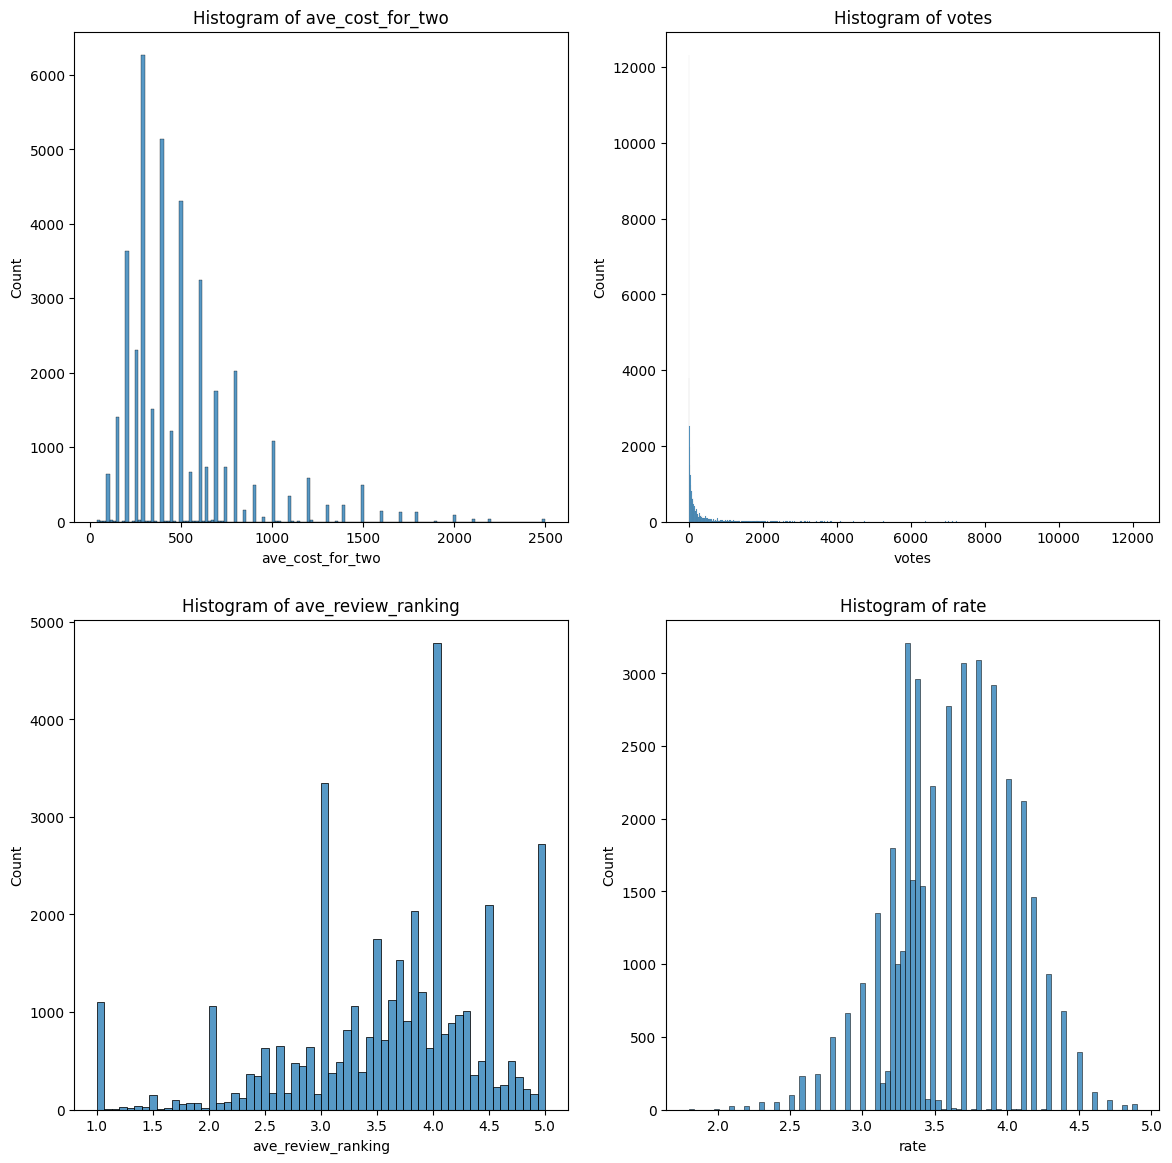

In [ ]:
#Visualize numerical columns with histogram
fig = plt.subplots(nrows = 2,ncols = 2,figsize = (14,14))
for i in range(len(numerical_variables)):
    plt.subplot(2,2,i+1)
    ax = sns.histplot(data=df_imputed, x=numerical_variables[i])
    plt.title(f"Histogram of {numerical_variables[i]}")
plt.show()

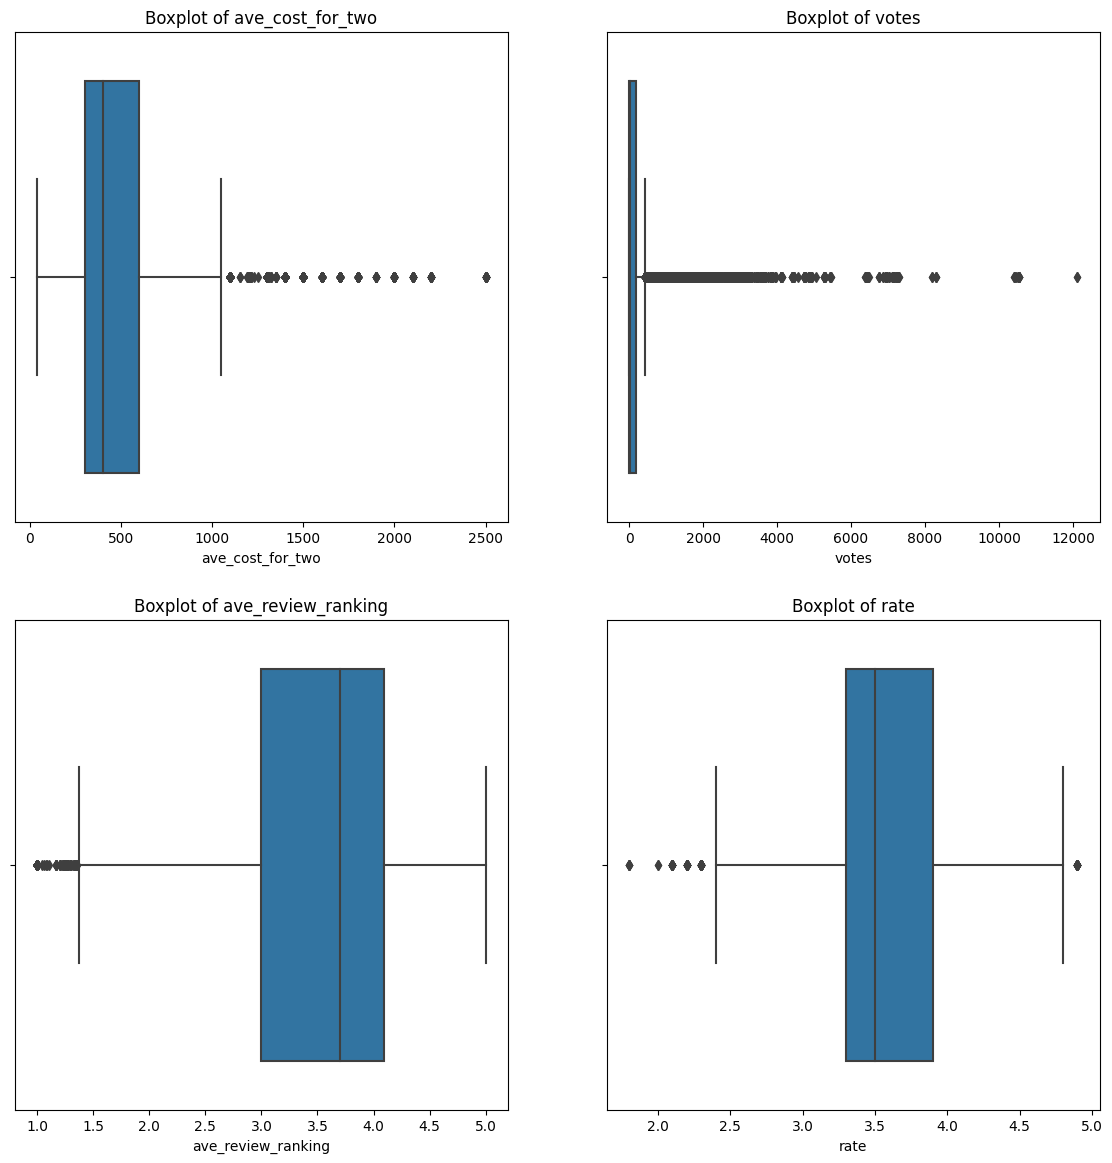

In [ ]:
#Visualize numerical columns with boxplot
fig = plt.subplots(nrows = 2,ncols = 2,figsize = (14,14))

for i in range(len(numerical_variables)):
    plt.subplot(2,2,i+1)
    ax = sns.boxplot(data=df_imputed, x=numerical_variables[i])
    plt.title(f"Boxplot of {numerical_variables[i]}")
plt.show()


As can be seen from two plots:
- The variable 'votes' is heavily left-skewed with the majority of values is less than 100 (nearly 70% of data) and the maximum ranges up to 12000. We will examine to see whether the extreme variation of this variable has any relationship with the variable 'rating'
- The variable 'ave_review_ranking' and 'rate' have fairly similar boxplots with the median is around 3.7, 25 percentile is nearly 3 and 75 percentile is around 4(However, looking at histograms, the distribution of 'rate' approximately has a normal distribution while the one of ave_review_ranking seem not to be).This may suggest a direct linear relationship between ave_review_ranking and rate
- 'ave_cost_for_two' is fairly left-skewed with the median is below 500 but the outliers range up to 2500.



#### Categorical variables

In [ ]:
food_data.head()

rest_type                               cuisines listed_in_type  \
0           Cafe                                   Cafe          Cafes   
1    Quick Bites         Burger, Continental, Fast Food       Dine-out   
2    Quick Bites             South Indian, Healthy Food       Delivery   
3  Casual Dining  Chinese, North Indian, Biryani, Kebab       Delivery   
4           Cafe                              Cafe, Tea       Dine-out   

          listed_in_city online_order book_table  ave_cost_for_two  \
0               JP Nagar           No         No             700.0   
1  Koramangala 5th Block          Yes         No             400.0   
2              Jayanagar          Yes         No             200.0   
3           Brigade Road          Yes        Yes            1200.0   
4           New BEL Road          Yes         No             250.0   

                                          dish_liked  votes  \
0                                                NaN     13   
1                                                NaN     28   
2                                                NaN     18   
3  Fish, Dumplings, Biryani, Paneer Tikka Masala,...    550   
4  Ginger Chai, Pakoda, Tea, Paneer Thali, Chole ...     67   

   ave_review_ranking  rate  
0                4.75   3.6  
1                4.50   3.8  
2                4.00   3.9  
3                4.80   4.3  
4                3.00   3.7

In [ ]:
food_data.describe(include=['object'])

rest_type      cuisines listed_in_type listed_in_city online_order  \
count         40112         40112          40112          40112        40112   
unique            7          2213              7             30            2   
top     Quick Bites  North Indian       Delivery            BTM          Yes   
freq          19129          2723          21434           2618        24547   

       book_table dish_liked  
count       40112      17351  
unique          2       3975  
top            No    Biryani  
freq        36018        177

There are 5 object variables can be treated as categorical variables ( rest_type, listed_in_city, online_order, book_table) in the data so I will visualize them first. Other object data (cuisines, menu_item, dish_liked) are in text format so I will not visualize them

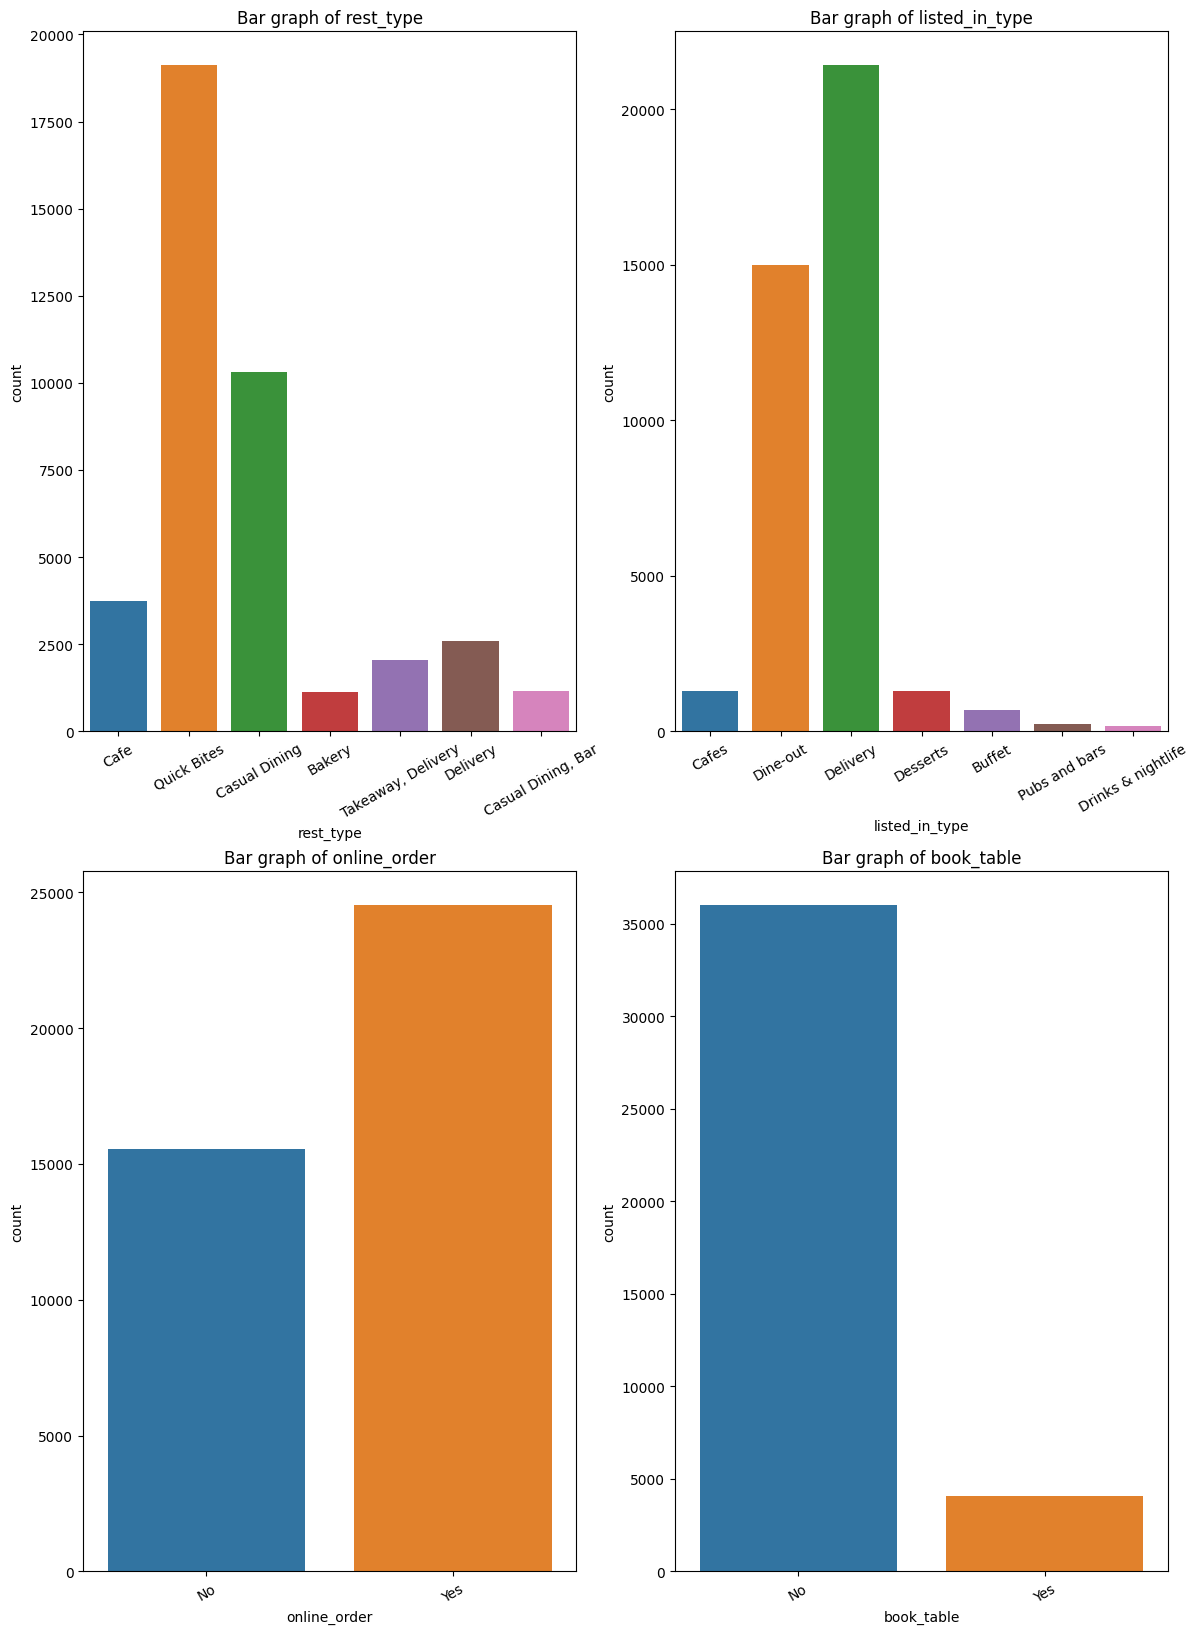

In [ ]:
#Visualize categorical columns with var graphs
fig = plt.subplots(nrows = 2,ncols = 2,figsize = (14,20))
cate_variables=['rest_type','listed_in_type','online_order','book_table']
for i in range(len(cate_variables)):
    plt.subplot(2,2,i+1)
    ax = sns.countplot(x=cate_variables[i],data=food_data)
    plt.xticks(rotation=30)
    plt.title(f"Bar graph of {cate_variables[i]}")
plt.show()


# New Section

As can be seen from that
-  In 'rest_type' there are 7 types of restaurant(Cafe,Quick Bites, Casual Dining, Bakery, Takeaway & Delivery, Delivery,Casual Dining & Bar) in that Quick Bites and Casual Dining account for the majority in the data. In 'listed_in_type' there are 7 types of service (Cafes, Dine_out,Delivery,Desserts, Buffet, Pubs and Bars, Drinks and nightlife) in that Dine-out and Delivery account for the majority.
- In 'online_order', most of restaurants provide online ordering
- In 'book_table', most of restaurant does not allow table booking.


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 [Text(0, 0, 'JP Nagar'),
  Text(1, 0, 'Koramangala 5th Block'),
  Text(2, 0, 'Jayanagar'),
  Text(3, 0, 'Brigade Road'),
  Text(4, 0, 'New BEL Road'),
  Text(5, 0, 'Kammanahalli'),
  Text(6, 0, 'Koramangala 6th Block'),
  Text(7, 0, 'BTM'),
  Text(8, 0, 'Brookefield'),
  Text(9, 0, 'HSR'),
  Text(10, 0, 'Marathahalli'),
  Text(11, 0, 'Koramangala 4th Block'),
  Text(12, 0, 'Old Airport Road'),
  Text(13, 0, 'Malleshwaram'),
  Text(14, 0, 'Bellandur'),
  Text(15, 0, 'Residency Road'),
  Text(16, 0, 'Church Street'),
  Text(17, 0, 'Koramangala 7th Block'),
  Text(18, 0, 'MG Road'),
  Text(19, 0, 'Bannerghatta Road'),
  Text(20, 0, 'Indiranagar'),
  Text(21, 0, 'Sarjapur Road'),
  Text(22, 0, 'Whitefield'),
  Text(23, 0, 'Basavanagudi'),
  Text(24, 0, 'Kalyan Nagar'),
  Text(25, 0, 'Frazer Town'),
  Text(26, 0, 'Lavelle Road'),
  Text(27, 0, 'Rajajinag

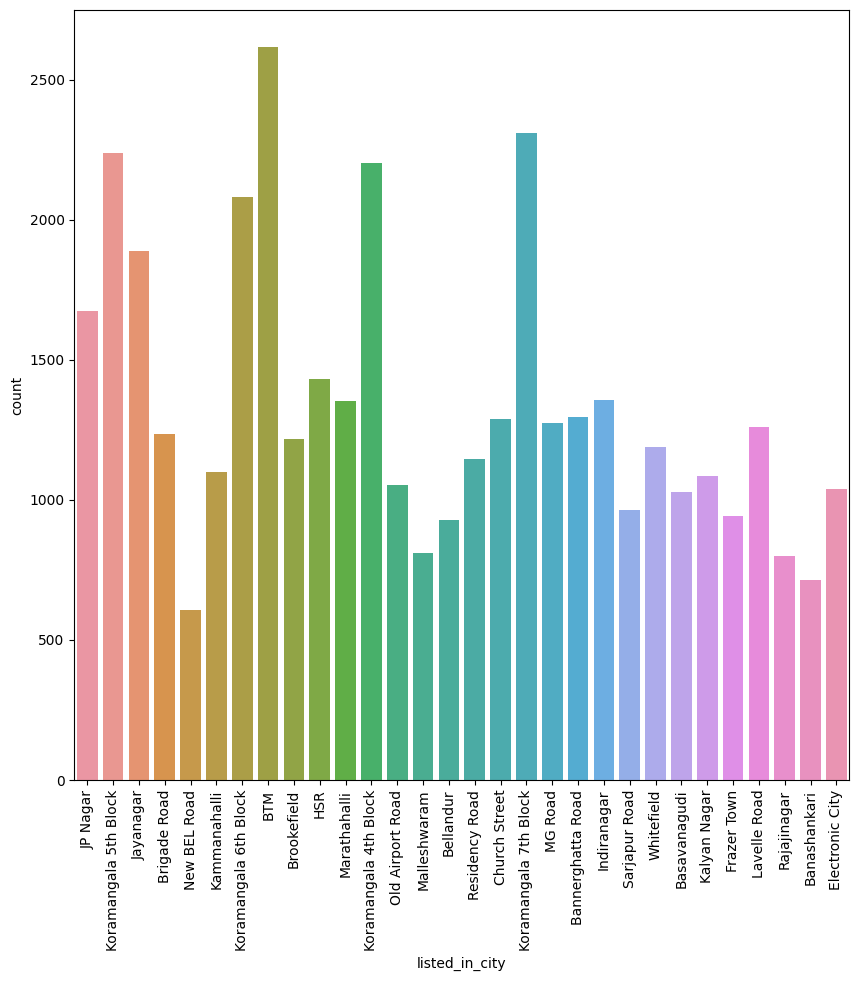

In [ ]:
 #Plot the variable 'listed_in_city'
 fig = plt.subplots(nrows = 1,ncols = 1,figsize = (10,10))
 sns.countplot(x='listed_in_city',data=food_data)
 plt.xticks(rotation=90)



As can be seen, restaurants are scattered on many cities in India.

#### Text variables

##### Column 'cuisines'

In [ ]:
food_data['cuisines'].head(20)



0                                                  Cafe
1                        Burger, Continental, Fast Food
2                            South Indian, Healthy Food
3                 Chinese, North Indian, Biryani, Kebab
4                                             Cafe, Tea
5     Cafe, Continental, Italian, Burger, Pizza, Sal...
6                                 South Indian, Biryani
7           South Indian, North Indian, Chinese, Juices
8                                 Chinese, North Indian
9                                          South Indian
10                                               Bakery
11                                         North Indian
12                                    Cafe, Continental
13                    Chinese, Momos, Nepalese, Tibetan
14                           Cafe, Continental, Chinese
15                          Chinese, Thai, North Indian
16                                Biryani, Kebab, Rolls
17                  Chinese, North Indian, South

So the cuisines column includes entries of multiple cuisines for a row

Based on those insights, I will use Count Vectorizer to count the frequency of each word in each row in the column 'cuisines' because I think each word will represent a category of cuisines and can influence the rating.

###### Cleaning

I will clean the column 'cuisines' to fit text vectorization.


In [ ]:
#import the Python module re to work with regular expressions
import re

In [ ]:
#define the lowercasing function to turn all letters into lowercases.
def lowercasing(text):
  # Convert to lowercase
  if isinstance(text, str):
    text = text.lower()
  else:
    text = text
  return (text)

In [ ]:
# Define function to clean text
def clean_text(text):
  if isinstance(text, str):
  # Remove HTML tags
     text = re.sub(r'<.*?>', '', text)
  # Remove punctuation and special characters
     text = re.sub(r'[^\w\s]', '', text)
  # Remove extra whitespace
     text = re.sub(r'\s+', ' ', text).strip()
  else:
      text = text
  return text

In [ ]:
#Clean the cuisine column to do text vectorization
food_data['cuisines']=food_data['cuisines'].apply(lowercasing)
food_data['cuisines']=food_data['cuisines'].apply(clean_text)


In [ ]:
food_data[['cuisines','dish_liked']]

cuisines  \
0                                    cafe   
1            burger continental fast food   
2               south indian healthy food   
3      chinese north indian biryani kebab   
4                                cafe tea   
...                                   ...   
40107                     pizza fast food   
40108                     desserts bakery   
40109  street food beverages north indian   
40110           arabian bbq rolls chinese   
40111             fast food biryani rolls   

                                              dish_liked  
0                                                    NaN  
1                                                    NaN  
2                                                    NaN  
3      Fish, Dumplings, Biryani, Paneer Tikka Masala,...  
4      Ginger Chai, Pakoda, Tea, Paneer Thali, Chole ...  
...                                                  ...  
40107                                                NaN  
40108                                                NaN  
40109                                                NaN  
40110  Pita Bread, Rolls, Shawarma Roll, Lebanese Sha...  
40111             Rolls, Chicken Tikka Roll, Cheese Roll  

[40112 rows x 2 columns]

In [ ]:
food_data['cuisines']

0                                      cafe
1              burger continental fast food
2                 south indian healthy food
3        chinese north indian biryani kebab
4                                  cafe tea
                        ...                
40107                       pizza fast food
40108                       desserts bakery
40109    street food beverages north indian
40110             arabian bbq rolls chinese
40111               fast food biryani rolls
Name: cuisines, Length: 40112, dtype: object

###### Fit CountVectorizer()

I will count each word in each row of text of the column 'cuisines'

In [ ]:
#import NLTK and functions for Tokenization, Stemming and Lemmatization
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer

#import NLTK stopwords from its corpus
from nltk.corpus import stopwords

In [ ]:
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
# define stopwords without negation words
stop_words = set(stopwords.words('english'))
negation_words = {'no', 'not', 'nor', 'neither', 'none', 'never'}
filtered_words = [word for word in stop_words if word not in negation_words]

In [ ]:
#define a function to perform tokenization, stemming or lemmatization, use PorterStemmer for stemming
def tokenize_lemmatize(text):
  #tokenization
  tokens = nltk.word_tokenize(text)

  #initialize stemmer OR lemmatizer
  lemmatizer = WordNetLemmatizer()

  # Filtering out the stopwords and lemmatizing the tokens
  lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens if token not in filtered_words and token.lower() not in negation_words]
  return ' '.join(lemmatized_tokens)

In [ ]:
# Tokenize and lemmatize the column cuisines
processed_cuisines= food_data['cuisines'].apply(tokenize_lemmatize)

In [ ]:
processed_cuisines

0                                      cafe
1              burger continental fast food
2                 south indian healthy food
3        chinese north indian biryani kebab
4                                  cafe tea
                        ...                
40107                       pizza fast food
40108                        dessert bakery
40109     street food beverage north indian
40110              arabian bbq roll chinese
40111                fast food biryani roll
Name: cuisines, Length: 40112, dtype: object

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
# Create the vectorizer object and fit on the corpus
vectorizer = CountVectorizer(ngram_range=(1, 2))
X= vectorizer.fit_transform(processed_cuisines)



In [ ]:
#convert the vectorizer array into dataframe
count_df_cuisines = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

In [ ]:
food_data.reset_index(inplace=True)

In [ ]:
food_data

rest_type                            cuisines listed_in_type  \
0                    Cafe                                cafe          Cafes   
1             Quick Bites        burger continental fast food       Dine-out   
2             Quick Bites           south indian healthy food       Delivery   
3           Casual Dining  chinese north indian biryani kebab       Delivery   
4                    Cafe                            cafe tea       Dine-out   
...                   ...                                 ...            ...   
40107  Takeaway, Delivery                     pizza fast food       Delivery   
40108  Takeaway, Delivery                     desserts bakery       Delivery   
40109         Quick Bites  street food beverages north indian       Delivery   
40110         Quick Bites           arabian bbq rolls chinese       Delivery   
40111         Quick Bites             fast food biryani rolls       Delivery   

              listed_in_city online_order book_table  ave_cost_for_two  \
0                   JP Nagar           No         No             700.0   
1      Koramangala 5th Block          Yes         No             400.0   
2                  Jayanagar          Yes         No             200.0   
3               Brigade Road          Yes        Yes            1200.0   
4               New BEL Road          Yes         No             250.0   
...                      ...          ...        ...               ...   
40107             Whitefield           No         No               NaN   
40108           Kammanahalli          Yes         No             500.0   
40109                MG Road           No         No             300.0   
40110              Bellandur          Yes         No             500.0   
40111           Brigade Road          Yes         No             350.0   

                                              dish_liked  votes  \
0                                                    NaN     13   
1                                                    NaN     28   
2                                                    NaN     18   
3      Fish, Dumplings, Biryani, Paneer Tikka Masala,...    550   
4      Ginger Chai, Pakoda, Tea, Paneer Thali, Chole ...     67   
...                                                  ...    ...   
40107                                                NaN     25   
40108                                                NaN     23   
40109                                                NaN     23   
40110  Pita Bread, Rolls, Shawarma Roll, Lebanese Sha...    162   
40111             Rolls, Chicken Tikka Roll, Cheese Roll    163   

       ave_review_ranking  rate  
0                4.750000   3.6  
1                4.500000   3.8  
2                4.000000   3.9  
3                4.800000   4.3  
4                3.000000   3.7  
...                   ...   ...  
40107            2.000000   2.9  
40108            3.454545   3.6  
40109            3.454545   3.1  
40110            3.500000   4.0  
40111            3.254808   3.1  

[40112 rows x 11 columns]

In [ ]:
#print count_df_cuisines after vectorizing
count_df_cuisines

afghan  afghani  afghani mughlai  african  african burger  american  \
0           0        0                0        0               0         0   
1           0        0                0        0               0         0   
2           0        0                0        0               0         0   
3           0        0                0        0               0         0   
4           0        0                0        0               0         0   
...       ...      ...              ...      ...             ...       ...   
40107       0        0                0        0               0         0   
40108       0        0                0        0               0         0   
40109       0        0                0        0               0         0   
40110       0        0                0        0               0         0   
40111       0        0                0        0               0         0   

       american asian  american bakery  american bbq  american beverage  ...  \
0                   0                0             0                  0  ...   
1                   0                0             0                  0  ...   
2                   0                0             0                  0  ...   
3                   0                0             0                  0  ...   
4                   0                0             0                  0  ...   
...               ...              ...           ...                ...  ...   
40107               0                0             0                  0  ...   
40108               0                0             0                  0  ...   
40109               0                0             0                  0  ...   
40110               0                0             0                  0  ...   
40111               0                0             0                  0  ...   

       vietnamese momos  vietnamese salad  vietnamese sri  vietnamese thai  \
0                     0                 0               0                0   
1                     0                 0               0                0   
2                     0                 0               0                0   
3                     0                 0               0                0   
4                     0                 0               0                0   
...                 ...               ...             ...              ...   
40107                 0                 0               0                0   
40108                 0                 0               0                0   
40109                 0                 0               0                0   
40110                 0                 0               0                0   
40111                 0                 0               0                0   

       wrap  wrap beverage  wrap burger  wrap cafe  wrap pizza  wrap roll  
0         0              0            0          0           0          0  
1         0              0            0          0           0          0  
2         0              0            0          0           0          0  
3         0              0            0          0           0          0  
4         0              0            0          0           0          0  
...     ...            ...          ...        ...         ...        ...  
40107     0              0            0          0           0          0  
40108     0              0            0          0           0          0  
40109     0              0            0          0           0          0  
40110     0              0            0          0           0          0  
40111     0              0            0          0           0          0  

[40112 rows x 1143 columns]

In [ ]:
df_imputed

ave_cost_for_two  votes  ave_review_ranking  rate  rest_type_Bakery  \
0                 700.0   13.0            4.750000   3.6               0.0   
1                 400.0   28.0            4.500000   3.8               0.0   
2                 200.0   18.0            4.000000   3.9               0.0   
3                1200.0  550.0            4.800000   4.3               0.0   
4                 250.0   67.0            3.000000   3.7               0.0   
...                 ...    ...                 ...   ...               ...   
40107             515.0   25.0            2.000000   2.9               0.0   
40108             500.0   23.0            3.454545   3.6               0.0   
40109             300.0   23.0            3.454545   3.1               0.0   
40110             500.0  162.0            3.500000   4.0               0.0   
40111             350.0  163.0            3.254808   3.1               0.0   

       rest_type_Cafe  rest_type_Casual Dining  rest_type_Casual Dining, Bar  \
0                 1.0                      0.0                           0.0   
1                 0.0                      0.0                           0.0   
2                 0.0                      0.0                           0.0   
3                 0.0                      1.0                           0.0   
4                 1.0                      0.0                           0.0   
...               ...                      ...                           ...   
40107             0.0                      0.0                           0.0   
40108             0.0                      0.0                           0.0   
40109             0.0                      0.0                           0.0   
40110             0.0                      0.0                           0.0   
40111             0.0                      0.0                           0.0   

       rest_type_Delivery  rest_type_Quick Bites  \
0                     0.0                    0.0   
1                     0.0                    1.0   
2                     0.0                    1.0   
3                     0.0                    0.0   
4                     0.0                    0.0   
...                   ...                    ...   
40107                 0.0                    0.0   
40108                 0.0                    0.0   
40109                 0.0                    1.0   
40110                 0.0                    1.0   
40111                 0.0                    1.0   

       rest_type_Takeaway, Delivery  online_order_No  online_order_Yes  \
0                               0.0              1.0               0.0   
1                               0.0              0.0               1.0   
2                               0.0              0.0               1.0   
3                               0.0              0.0               1.0   
4                               0.0              0.0               1.0   
...                             ...              ...               ...   
40107                           1.0              1.0               0.0   
40108                           1.0              0.0               1.0   
40109                           0.0              1.0               0.0   
40110                           0.0              0.0               1.0   
40111                           0.0              0.0               1.0   

       book_table_No  book_table_Yes  
0                1.0             0.0  
1                1.0             0.0  
2                1.0             0.0  
3                0.0             1.0  
4                1.0             0.0  
...              ...             ...  
40107            1.0             0.0  
40108            1.0             0.0  
40109            1.0             0.0  
40110            1.0             0.0  
40111            1.0             0.0  

[40112 rows x 15 columns]

In [ ]:
count_df_cuisines.reset_index(inplace=True)

I will merge the dataframe of words-count of cuisine with the dataset into a version to fit the models and compare

In [ ]:
df_imputed

ave_cost_for_two  votes  ave_review_ranking  rate  rest_type_Bakery  \
0                 700.0   13.0            4.750000   3.6               0.0   
1                 400.0   28.0            4.500000   3.8               0.0   
2                 200.0   18.0            4.000000   3.9               0.0   
3                1200.0  550.0            4.800000   4.3               0.0   
4                 250.0   67.0            3.000000   3.7               0.0   
...                 ...    ...                 ...   ...               ...   
40107             515.0   25.0            2.000000   2.9               0.0   
40108             500.0   23.0            3.454545   3.6               0.0   
40109             300.0   23.0            3.454545   3.1               0.0   
40110             500.0  162.0            3.500000   4.0               0.0   
40111             350.0  163.0            3.254808   3.1               0.0   

       rest_type_Cafe  rest_type_Casual Dining  rest_type_Casual Dining, Bar  \
0                 1.0                      0.0                           0.0   
1                 0.0                      0.0                           0.0   
2                 0.0                      0.0                           0.0   
3                 0.0                      1.0                           0.0   
4                 1.0                      0.0                           0.0   
...               ...                      ...                           ...   
40107             0.0                      0.0                           0.0   
40108             0.0                      0.0                           0.0   
40109             0.0                      0.0                           0.0   
40110             0.0                      0.0                           0.0   
40111             0.0                      0.0                           0.0   

       rest_type_Delivery  rest_type_Quick Bites  \
0                     0.0                    0.0   
1                     0.0                    1.0   
2                     0.0                    1.0   
3                     0.0                    0.0   
4                     0.0                    0.0   
...                   ...                    ...   
40107                 0.0                    0.0   
40108                 0.0                    0.0   
40109                 0.0                    1.0   
40110                 0.0                    1.0   
40111                 0.0                    1.0   

       rest_type_Takeaway, Delivery  online_order_No  online_order_Yes  \
0                               0.0              1.0               0.0   
1                               0.0              0.0               1.0   
2                               0.0              0.0               1.0   
3                               0.0              0.0               1.0   
4                               0.0              0.0               1.0   
...                             ...              ...               ...   
40107                           1.0              1.0               0.0   
40108                           1.0              0.0               1.0   
40109                           0.0              1.0               0.0   
40110                           0.0              0.0               1.0   
40111                           0.0              0.0               1.0   

       book_table_No  book_table_Yes  
0                1.0             0.0  
1                1.0             0.0  
2                1.0             0.0  
3                0.0             1.0  
4                1.0             0.0  
...              ...             ...  
40107            1.0             0.0  
40108            1.0             0.0  
40109            1.0             0.0  
40110            1.0             0.0  
40111            1.0             0.0  

[40112 rows x 15 columns]

In [ ]:
#merge into a full df for model developments
df_count_cuisines=pd.concat([df_imputed,count_df_cuisines],axis=1)

In [ ]:
df_count_cuisines

ave_cost_for_two  votes  ave_review_ranking  rate  rest_type_Bakery  \
0                 700.0   13.0            4.750000   3.6               0.0   
1                 400.0   28.0            4.500000   3.8               0.0   
2                 200.0   18.0            4.000000   3.9               0.0   
3                1200.0  550.0            4.800000   4.3               0.0   
4                 250.0   67.0            3.000000   3.7               0.0   
...                 ...    ...                 ...   ...               ...   
40107             515.0   25.0            2.000000   2.9               0.0   
40108             500.0   23.0            3.454545   3.6               0.0   
40109             300.0   23.0            3.454545   3.1               0.0   
40110             500.0  162.0            3.500000   4.0               0.0   
40111             350.0  163.0            3.254808   3.1               0.0   

       rest_type_Cafe  rest_type_Casual Dining  rest_type_Casual Dining, Bar  \
0                 1.0                      0.0                           0.0   
1                 0.0                      0.0                           0.0   
2                 0.0                      0.0                           0.0   
3                 0.0                      1.0                           0.0   
4                 1.0                      0.0                           0.0   
...               ...                      ...                           ...   
40107             0.0                      0.0                           0.0   
40108             0.0                      0.0                           0.0   
40109             0.0                      0.0                           0.0   
40110             0.0                      0.0                           0.0   
40111             0.0                      0.0                           0.0   

       rest_type_Delivery  rest_type_Quick Bites  ...  vietnamese momos  \
0                     0.0                    0.0  ...                 0   
1                     0.0                    1.0  ...                 0   
2                     0.0                    1.0  ...                 0   
3                     0.0                    0.0  ...                 0   
4                     0.0                    0.0  ...                 0   
...                   ...                    ...  ...               ...   
40107                 0.0                    0.0  ...                 0   
40108                 0.0                    0.0  ...                 0   
40109                 0.0                    1.0  ...                 0   
40110                 0.0                    1.0  ...                 0   
40111                 0.0                    1.0  ...                 0   

       vietnamese salad  vietnamese sri  vietnamese thai  wrap  wrap beverage  \
0                     0               0                0     0              0   
1                     0               0                0     0              0   
2                     0               0                0     0              0   
3                     0               0                0     0              0   
4                     0               0                0     0              0   
...                 ...             ...              ...   ...            ...   
40107                 0               0                0     0              0   
40108                 0               0                0     0              0   
40109                 0               0                0     0              0   
40110                 0               0                0     0              0   
40111                 0               0                0     0              0   

       wrap burger  wrap cafe  wrap pizza  wrap roll  
0                0          0           0          0  
1                0          0           0          0  
2                0          0           0          0  
3              

In [ ]:
food_data.reset_index(inplace=True)

In [ ]:
df_count_cuisines

ave_cost_for_two  votes  ave_review_ranking  rate  rest_type_Bakery  \
0                 700.0   13.0            4.750000   3.6               0.0   
1                 400.0   28.0            4.500000   3.8               0.0   
2                 200.0   18.0            4.000000   3.9               0.0   
3                1200.0  550.0            4.800000   4.3               0.0   
4                 250.0   67.0            3.000000   3.7               0.0   
...                 ...    ...                 ...   ...               ...   
40107             515.0   25.0            2.000000   2.9               0.0   
40108             500.0   23.0            3.454545   3.6               0.0   
40109             300.0   23.0            3.454545   3.1               0.0   
40110             500.0  162.0            3.500000   4.0               0.0   
40111             350.0  163.0            3.254808   3.1               0.0   

       rest_type_Cafe  rest_type_Casual Dining  rest_type_Casual Dining, Bar  \
0                 1.0                      0.0                           0.0   
1                 0.0                      0.0                           0.0   
2                 0.0                      0.0                           0.0   
3                 0.0                      1.0                           0.0   
4                 1.0                      0.0                           0.0   
...               ...                      ...                           ...   
40107             0.0                      0.0                           0.0   
40108             0.0                      0.0                           0.0   
40109             0.0                      0.0                           0.0   
40110             0.0                      0.0                           0.0   
40111             0.0                      0.0                           0.0   

       rest_type_Delivery  rest_type_Quick Bites  ...  vietnamese momos  \
0                     0.0                    0.0  ...                 0   
1                     0.0                    1.0  ...                 0   
2                     0.0                    1.0  ...                 0   
3                     0.0                    0.0  ...                 0   
4                     0.0                    0.0  ...                 0   
...                   ...                    ...  ...               ...   
40107                 0.0                    0.0  ...                 0   
40108                 0.0                    0.0  ...                 0   
40109                 0.0                    1.0  ...                 0   
40110                 0.0                    1.0  ...                 0   
40111                 0.0                    1.0  ...                 0   

       vietnamese salad  vietnamese sri  vietnamese thai  wrap  wrap beverage  \
0                     0               0                0     0              0   
1                     0               0                0     0              0   
2                     0               0                0     0              0   
3                     0               0                0     0              0   
4                     0               0                0     0              0   
...                 ...             ...              ...   ...            ...   
40107                 0               0                0     0              0   
40108                 0               0                0     0              0   
40109                 0               0                0     0              0   
40110                 0               0                0     0              0   
40111                 0               0                0     0              0   

       wrap burger  wrap cafe  wrap pizza  wrap roll  
0                0          0           0          0  
1                0          0           0          0  
2                0          0           0          0  
3              

In [ ]:
food_data

index           rest_type                               cuisines  \
0          0                Cafe                                   Cafe   
1          1         Quick Bites         Burger, Continental, Fast Food   
2          2         Quick Bites             South Indian, Healthy Food   
3          3       Casual Dining  Chinese, North Indian, Biryani, Kebab   
4          4                Cafe                              Cafe, Tea   
...      ...                 ...                                    ...   
40107  40125  Takeaway, Delivery                       Pizza, Fast Food   
40108  40126  Takeaway, Delivery                       Desserts, Bakery   
40109  40127         Quick Bites   Street Food, Beverages, North Indian   
40110  40128         Quick Bites           Arabian, BBQ, Rolls, Chinese   
40111  40129         Quick Bites              Fast Food, Biryani, Rolls   

                                               menu_item listed_in_type  \
0                                                     []          Cafes   
1                                                     []       Dine-out   
2                                                     []       Delivery   
3      ['Hyderabadi Biryani', 'Special Veg Combo', 'S...       Delivery   
4                                                     []       Dine-out   
...                                                  ...            ...   
40107                                                 []       Delivery   
40108                                                 []       Delivery   
40109                                                 []       Delivery   
40110                                                 []       Delivery   
40111  ['Chilli Paneer Roll', 'Paneer Tikka Roll', 'C...       Delivery   

              listed_in_city online_order book_table  ave_cost_for_two  \
0                   JP Nagar           No         No             700.0   
1      Koramangala 5th Block          Yes         No             400.0   
2                  Jayanagar          Yes         No             200.0   
3               Brigade Road          Yes        Yes            1200.0   
4               New BEL Road          Yes         No             250.0   
...                      ...          ...        ...               ...   
40107             Whitefield           No         No               NaN   
40108           Kammanahalli          Yes         No             500.0   
40109                MG Road           No         No             300.0   
40110              Bellandur          Yes         No             500.0   
40111           Brigade Road          Yes         No             350.0   

                                              dish_liked  votes  \
0                                                    NaN     13   
1                                                    NaN     28   
2                                                    NaN     18   
3      Fish, Dumplings, Biryani, Paneer Tikka Masala,...    550   
4      Ginger Chai, Pakoda, Tea, Paneer Thali, Chole ...     67   
...                                                  ...    ...   
40107                                                NaN     25   
40108                                                NaN     23   
40109                                                NaN     23   
40110  Pita Bread, Rolls, Shawarma Roll, Lebanese Sha...    162   
40111             Rolls, Chicken Tikka Roll, Cheese Roll    163   

       ave_review_ranking  rate  
0                4.750000   3.6  
1                4.500000   3.8  
2                4.000000   3.9  
3                4.800000   4.3  
4                3.000000   3.7  
...                   ...   ...  
40107            2.000000   2.9  
40108            3.454545   3.6  
40109            3.454545   3.1  
40110            3.500000   4.0  
40111            3.254808   3.1  

[40112 rows x 13 columns]

##### Column 'dish_liked'

In [ ]:
food_data['dish_liked'].head(20)

0                                                   NaN
1                                                   NaN
2                                                   NaN
3     Fish, Dumplings, Biryani, Paneer Tikka Masala,...
4     Ginger Chai, Pakoda, Tea, Paneer Thali, Chole ...
5     Pizza, Burgers, Chicken Pasta, Minestrone Soup...
6                                                   NaN
7                                Coffee, Roti, Vada Pav
8                                                 Lassi
9                                                   NaN
10                                                  NaN
11                                                  NaN
12    English Breakfast, Waffles, Chocolate Cake, Fr...
13                                       Momos, Noodles
14    Sandwich, Pancakes, Garlic Bread, Coffee, Nach...
15                                                  NaN
16                                                  NaN
17                                              

In [ ]:
food_data['dish_liked'].isna().sum()

22761

The column 'dish_liked' includes many cuisines per row and has more than 50% rows of missing values. We dont know clearly the reason of missing values ( because of data operation, bias in survey or it means no dishes liked in that restaurant) so I need to discover and make assumption on this

In [ ]:
#Filter non-NA of the dish_liked column
not_na=food_data[~food_data['dish_liked'].isna()]


Text(0.5, 1.0, 'Rate of dish_liked with non-missing values')

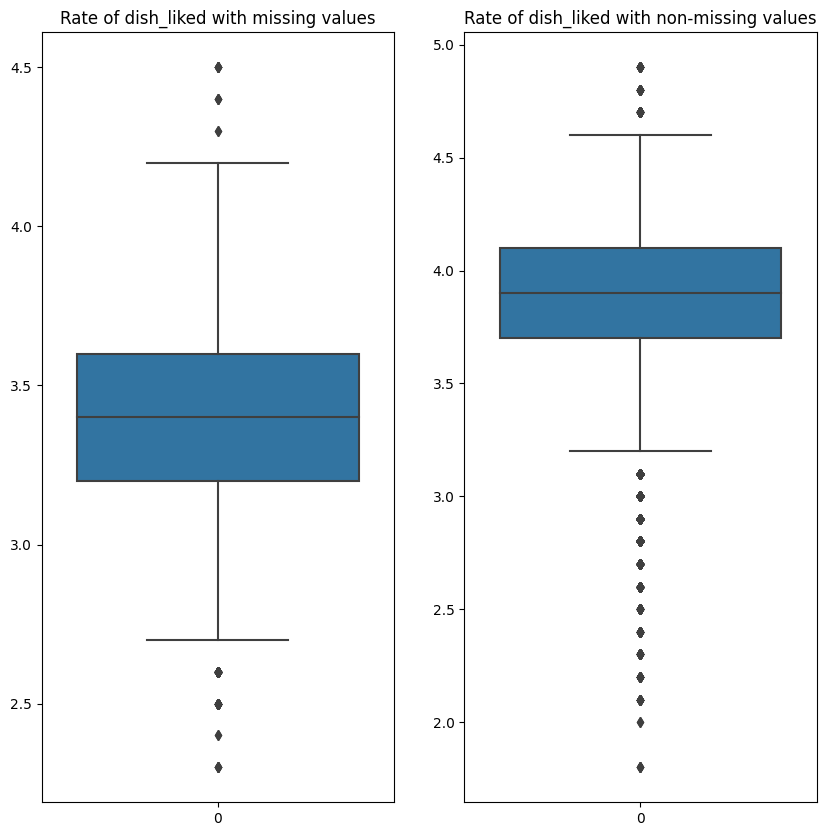

In [ ]:
#Compare rate between dish_liked column with missing values and non_missing values
fig = plt.subplots(nrows = 1,ncols = 2,figsize = (10,10))
plt.subplot(1,2,1)
sns.boxplot(food_data[food_data['dish_liked'].isna()]['rate'])
plt.title('Rate of dish_liked with missing values')
plt.subplot(1,2,2)
sns.boxplot(not_na['rate'])
plt.title('Rate of dish_liked with non-missing values')

It can be seen from that dish_liked column with non_missing values has significantly higher average rate than with missing_values. This is quite consistent with our common sense that if customers express their favourite dishes in a restaurant, it is likely that they will rank that restaurant high. However, in the dataset, the dish_liked column with missing values account for more than 50% and I don't have clear information about why the data is missing (because of data collection or the missing means customers do not like any dishes) so I need to make assumption of the missing values based on the above insight. That means if the dish_liked is missing, customers do not express any favourite dishes in that restaurant

I create a new column of counting the number of dish liked

In [ ]:
#create a function to calculate the number of dish_liked
def count_dish_liked(text):
  if isinstance(text, str):
    return (len(text.split(',')))
  else:
    return (0)


In [ ]:
#add dish_liked_count to the dataset
food_data['dish_liked_count']=food_data['dish_liked'].apply(lambda x: count_dish_liked(x))

In [ ]:
food_data

rest_type                            cuisines listed_in_type  \
0                    Cafe                                cafe          Cafes   
1             Quick Bites        burger continental fast food       Dine-out   
2             Quick Bites           south indian healthy food       Delivery   
3           Casual Dining  chinese north indian biryani kebab       Delivery   
4                    Cafe                            cafe tea       Dine-out   
...                   ...                                 ...            ...   
40107  Takeaway, Delivery                     pizza fast food       Delivery   
40108  Takeaway, Delivery                     desserts bakery       Delivery   
40109         Quick Bites  street food beverages north indian       Delivery   
40110         Quick Bites           arabian bbq rolls chinese       Delivery   
40111         Quick Bites             fast food biryani rolls       Delivery   

              listed_in_city online_order book_table  ave_cost_for_two  \
0                   JP Nagar           No         No             700.0   
1      Koramangala 5th Block          Yes         No             400.0   
2                  Jayanagar          Yes         No             200.0   
3               Brigade Road          Yes        Yes            1200.0   
4               New BEL Road          Yes         No             250.0   
...                      ...          ...        ...               ...   
40107             Whitefield           No         No               NaN   
40108           Kammanahalli          Yes         No             500.0   
40109                MG Road           No         No             300.0   
40110              Bellandur          Yes         No             500.0   
40111           Brigade Road          Yes         No             350.0   

                                              dish_liked  votes  \
0                                                    NaN     13   
1                                                    NaN     28   
2                                                    NaN     18   
3      Fish, Dumplings, Biryani, Paneer Tikka Masala,...    550   
4      Ginger Chai, Pakoda, Tea, Paneer Thali, Chole ...     67   
...                                                  ...    ...   
40107                                                NaN     25   
40108                                                NaN     23   
40109                                                NaN     23   
40110  Pita Bread, Rolls, Shawarma Roll, Lebanese Sha...    162   
40111             Rolls, Chicken Tikka Roll, Cheese Roll    163   

       ave_review_ranking  rate  dish_liked_count  
0                4.750000   3.6                 0  
1                4.500000   3.8                 0  
2                4.000000   3.9                 0  
3                4.800000   4.3                 7  
4                3.000000   3.7                 5  
...                   ...   ...               ...  
40107            2.000000   2.9                 0  
40108            3.454545   3.6                 0  
40109            3.454545   3.1                 0  
40110            3.500000   4.0                 6  
40111            3.254808   3.1                 3  

[40112 rows x 12 columns]

In [ ]:
food_data.drop(columns=['index'],inplace=True)

### Bivariate analysis

I will plot visualization of each variable with the target variable 'rate' to discover any relationship between them.

#### Numerical variables

In [ ]:
df_imputed

ave_cost_for_two  votes  ave_review_ranking  rate  rest_type_Bakery  \
0                 700.0   13.0            4.750000   3.6               0.0   
1                 400.0   28.0            4.500000   3.8               0.0   
2                 200.0   18.0            4.000000   3.9               0.0   
3                1200.0  550.0            4.800000   4.3               0.0   
4                 250.0   67.0            3.000000   3.7               0.0   
...                 ...    ...                 ...   ...               ...   
40107             500.0   25.0            2.000000   2.9               0.0   
40108             500.0   23.0            3.454545   3.6               0.0   
40109             300.0   23.0            3.454545   3.1               0.0   
40110             500.0  162.0            3.500000   4.0               0.0   
40111             350.0  163.0            3.254808   3.1               0.0   

       rest_type_Cafe  rest_type_Casual Dining  rest_type_Casual Dining, Bar  \
0                 1.0                      0.0                           0.0   
1                 0.0                      0.0                           0.0   
2                 0.0                      0.0                           0.0   
3                 0.0                      1.0                           0.0   
4                 1.0                      0.0                           0.0   
...               ...                      ...                           ...   
40107             0.0                      0.0                           0.0   
40108             0.0                      0.0                           0.0   
40109             0.0                      0.0                           0.0   
40110             0.0                      0.0                           0.0   
40111             0.0                      0.0                           0.0   

       rest_type_Delivery  rest_type_Quick Bites  ...  \
0                     0.0                    0.0  ...   
1                     0.0                    1.0  ...   
2                     0.0                    1.0  ...   
3                     0.0                    0.0  ...   
4                     0.0                    0.0  ...   
...                   ...                    ...  ...   
40107                 0.0                    0.0  ...   
40108                 0.0                    0.0  ...   
40109                 0.0                    1.0  ...   
40110                 0.0                    1.0  ...   
40111                 0.0                    1.0  ...   

       listed_in_city_New BEL Road  listed_in_city_Old Airport Road  \
0                              0.0                              0.0   
1                              0.0                              0.0   
2                              0.0                              0.0   
3                              0.0                              0.0   
4                              1.0                              0.0   
...                            ...                              ...   
40107                          0.0                              0.0   
40108                          0.0                              0.0   
40109                          0.0                              0.0   
40110                          0.0                              0.0   
40111                          0.0                              0.0   

       listed_in_city_Rajajinagar  listed_in_city_Residency Road  \
0                             0.0                            0.0   
1                             0.0                            0.0   
2                             0.0                            0.0   
3                             0.0                            0.0   
4                             0.0                            0.0   
...                           ...                            ...   
40107                         0.0                            0.0   
40108                      

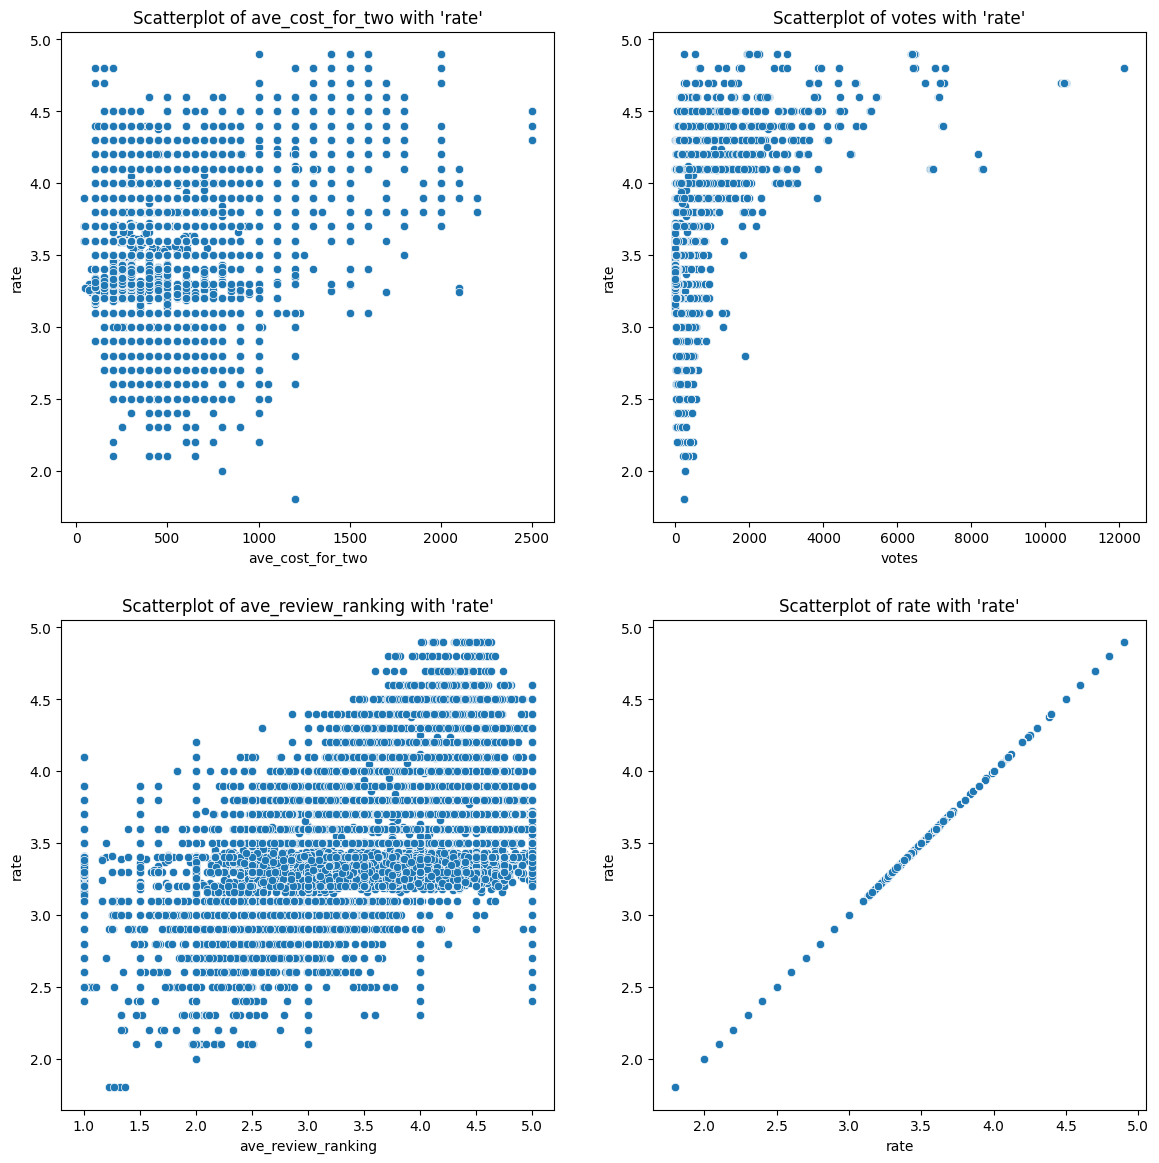

In [ ]:
# Boxplots of numerical variables with 'rate'
fig = plt.subplots(nrows = 2,ncols = 2,figsize = (14,14))
for i in range(len(numerical_variables)):
    plt.subplot(2,2,i+1)
    ax = sns.scatterplot(data=df_imputed, x=numerical_variables[i],y='rate')
    plt.title(f"Scatterplot of {numerical_variables[i]} with 'rate'")
plt.show()

As can be seen from scatter plots:
- 'ave_review_ranking' seem to be positively linearly correlated with 'rate'
- 'ave_cost_for_two' and 'votes' have a different scale with 'rate' so I use 'log' to transform them to fit better (below)

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Text(0.5, 1.0, 'Scatterplot of log of votes with rate')

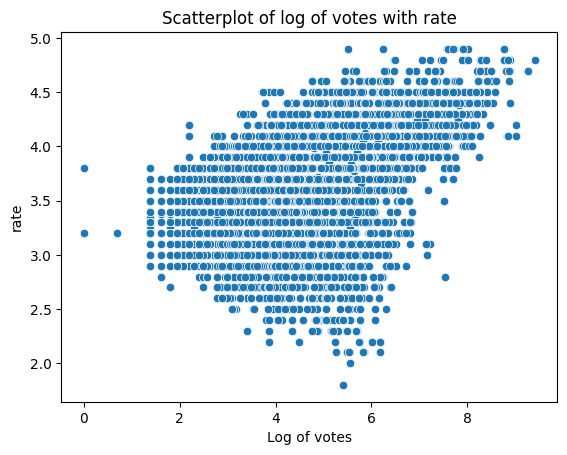

In [ ]:
sns.scatterplot(data=df_imputed, x=np.log(df_imputed['votes']),y='rate')
plt.xlabel('Log of votes')
plt.title('Scatterplot of log of votes with rate')

-Log of votes seem to be positively correlated with rate

Text(0.5, 1.0, 'Scatterplot of log of ave_cost_for_two with rate')

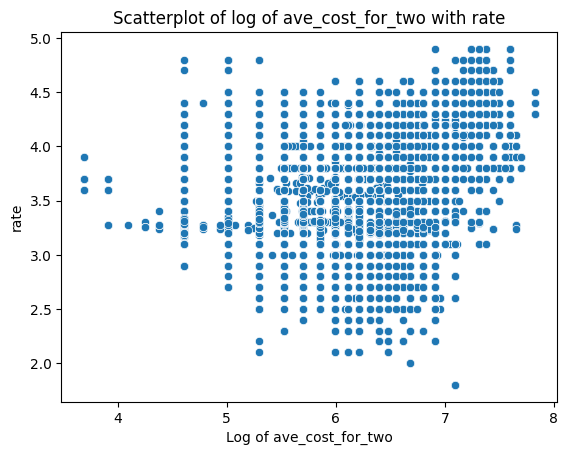

In [ ]:
sns.scatterplot(data=df_imputed, x=np.log(df_imputed['ave_cost_for_two']),y='rate')
plt.xlabel('Log of ave_cost_for_two')
plt.title('Scatterplot of log of ave_cost_for_two with rate')

- Log of ave_cost_for_two does not show a clear linear relationship with rate

#### Categorical variables

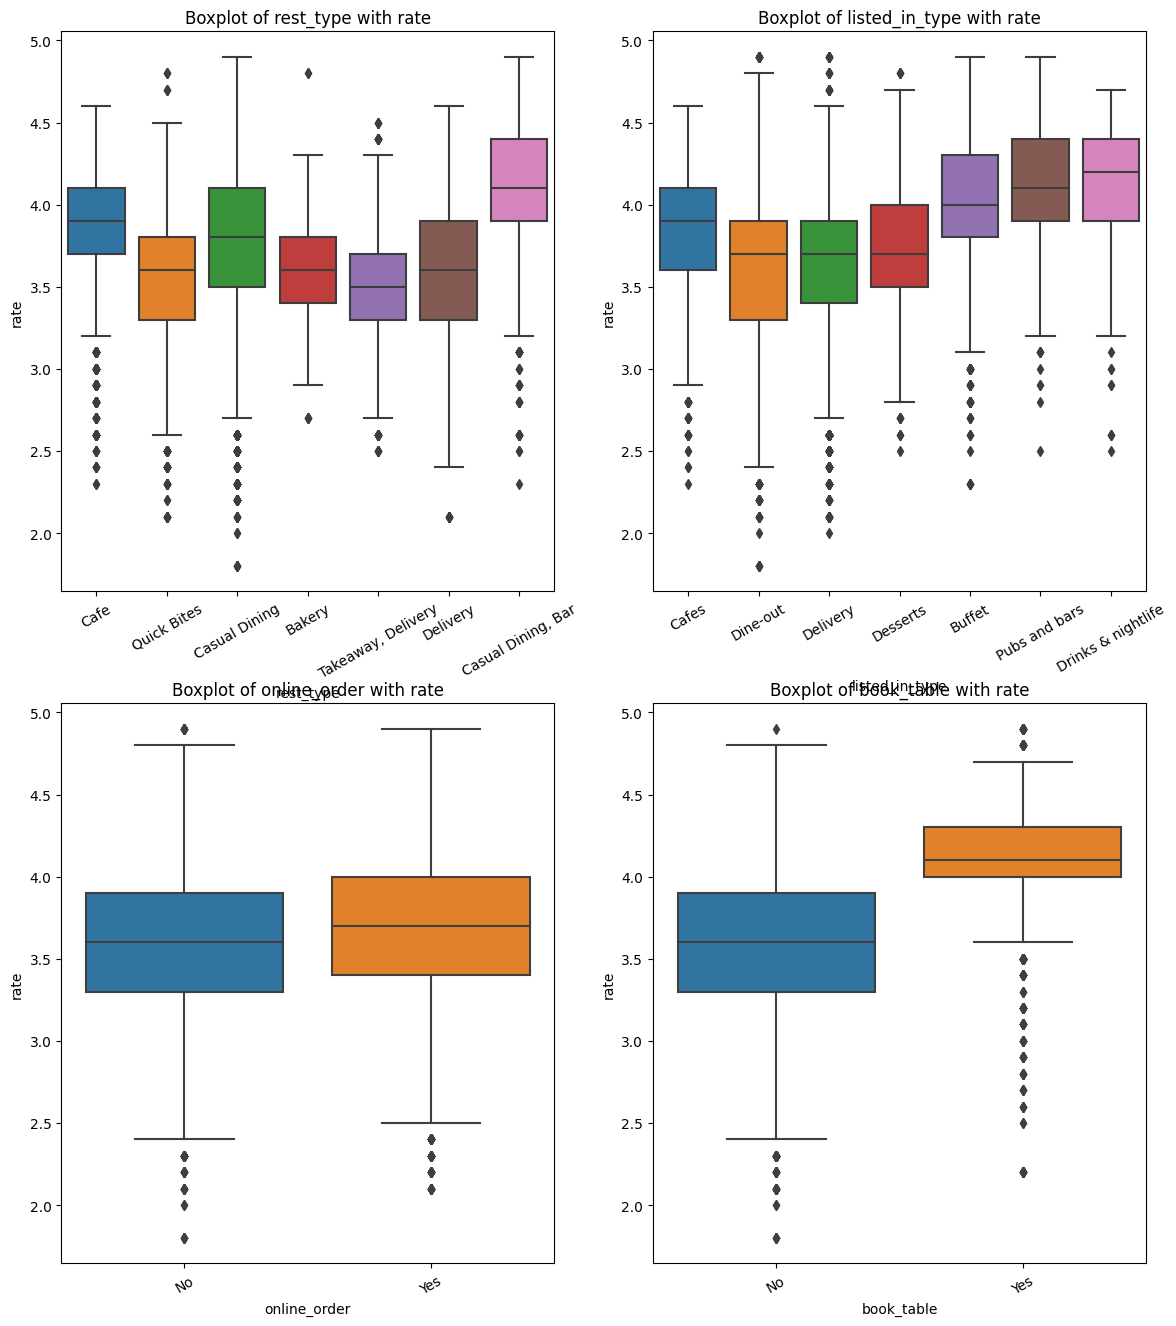

In [ ]:
fig = plt.subplots(nrows = 2,ncols = 2,figsize = (14,16))
cate_variables=['rest_type','listed_in_type','online_order','book_table']
for i in range(len(cate_variables)):
    plt.subplot(2,2,i+1)
    ax = sns.boxplot(data=food_data,x=cate_variables[i],y='rate')
    plt.xticks(rotation=30)
    plt.title(f"Boxplot of {cate_variables[i]} with rate")
plt.show()


From the boxplots I see:
- Cafe, Casual Dining, Casual Dining and Bar seem to have a fairly higher avergare of rate compared to other restaurant types
- In listed_in_type, it is quitely compatible with the rest_type, cafes, buffet,pubs and bars,drinks and nightlife have fairly higher average of rate than other types
- In online_order,'Yes' is a bit higher than 'No'
- In book_table, 'Yes' is significantly higher than 'No'

In [ ]:
food_data.head()

index      rest_type                            cuisines listed_in_type  \
0      0           Cafe                                cafe          Cafes   
1      1    Quick Bites        burger continental fast food       Dine-out   
2      2    Quick Bites           south indian healthy food       Delivery   
3      3  Casual Dining  chinese north indian biryani kebab       Delivery   
4      4           Cafe                            cafe tea       Dine-out   

          listed_in_city online_order book_table  ave_cost_for_two  \
0               JP Nagar           No         No             700.0   
1  Koramangala 5th Block          Yes         No             400.0   
2              Jayanagar          Yes         No             200.0   
3           Brigade Road          Yes        Yes            1200.0   
4           New BEL Road          Yes         No             250.0   

                                          dish_liked  votes  \
0                                                NaN     13   
1                                                NaN     28   
2                                                NaN     18   
3  Fish, Dumplings, Biryani, Paneer Tikka Masala,...    550   
4  Ginger Chai, Pakoda, Tea, Paneer Thali, Chole ...     67   

   ave_review_ranking  rate  dish_liked_count  
0                4.75   3.6                 0  
1                4.50   3.8                 0  
2                4.00   3.9                 0  
3                4.80   4.3                 7  
4                3.00   3.7                 5

### Multivariate analysis

In [ ]:
food_data

rest_type                            cuisines listed_in_type  \
0                    Cafe                                cafe          Cafes   
1             Quick Bites        burger continental fast food       Dine-out   
2             Quick Bites           south indian healthy food       Delivery   
3           Casual Dining  chinese north indian biryani kebab       Delivery   
4                    Cafe                            cafe tea       Dine-out   
...                   ...                                 ...            ...   
40107  Takeaway, Delivery                     pizza fast food       Delivery   
40108  Takeaway, Delivery                     desserts bakery       Delivery   
40109         Quick Bites  street food beverages north indian       Delivery   
40110         Quick Bites           arabian bbq rolls chinese       Delivery   
40111         Quick Bites             fast food biryani rolls       Delivery   

              listed_in_city online_order book_table  ave_cost_for_two  \
0                   JP Nagar           No         No             700.0   
1      Koramangala 5th Block          Yes         No             400.0   
2                  Jayanagar          Yes         No             200.0   
3               Brigade Road          Yes        Yes            1200.0   
4               New BEL Road          Yes         No             250.0   
...                      ...          ...        ...               ...   
40107             Whitefield           No         No               NaN   
40108           Kammanahalli          Yes         No             500.0   
40109                MG Road           No         No             300.0   
40110              Bellandur          Yes         No             500.0   
40111           Brigade Road          Yes         No             350.0   

                                              dish_liked  votes  \
0                                                    NaN     13   
1                                                    NaN     28   
2                                                    NaN     18   
3      Fish, Dumplings, Biryani, Paneer Tikka Masala,...    550   
4      Ginger Chai, Pakoda, Tea, Paneer Thali, Chole ...     67   
...                                                  ...    ...   
40107                                                NaN     25   
40108                                                NaN     23   
40109                                                NaN     23   
40110  Pita Bread, Rolls, Shawarma Roll, Lebanese Sha...    162   
40111             Rolls, Chicken Tikka Roll, Cheese Roll    163   

       ave_review_ranking  rate  dish_liked_count  
0                4.750000   3.6                 0  
1                4.500000   3.8                 0  
2                4.000000   3.9                 0  
3                4.800000   4.3                 7  
4                3.000000   3.7                 5  
...                   ...   ...               ...  
40107            2.000000   2.9                 0  
40108            3.454545   3.6                 0  
40109            3.454545   3.1                 0  
40110            3.500000   4.0                 6  
40111            3.254808   3.1                 3  

[40112 rows x 12 columns]

<ipython-input-195-1fd4e627e11e>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data=food_data.corr(),  cmap='Blues', annot=True)


<Axes: >

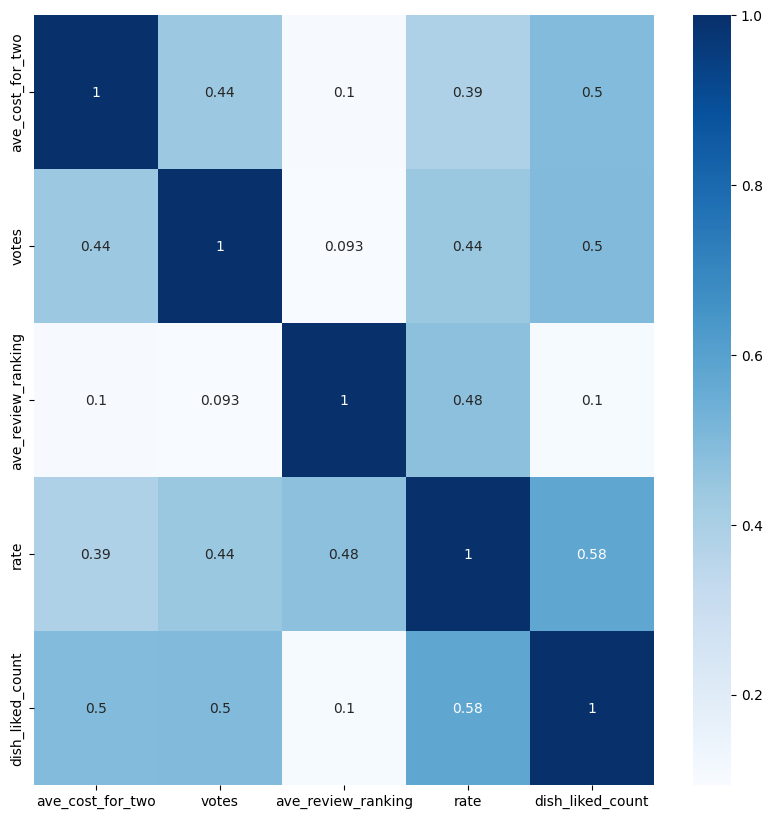

In [ ]:
plt.figure(figsize=(10, 10))

sns.heatmap(data=food_data.corr(),  cmap='Blues', annot=True)

The heatmap of numerical variables show that
-  There are clear positive relationships between numerical variables (ave_cost_for_two, votes, ave_review_ranking,dish_liked_count) with the target variable 'rate'. Both of them have correlations are approximately above 0.4 with rate
- ave_cost_for_two has a positive correlation with votes.
- the dish_liked_count has a positive correlation with  rate ( corr 0.58) as we expect from the visualization

###Complete and split dataset to fit models

I will create 2 dataset to fit models: the original one (after processing) and the one with vectorizing the cuisines column


In [ ]:
food_data

rest_type                            cuisines listed_in_type  \
0                    Cafe                                cafe          Cafes   
1             Quick Bites        burger continental fast food       Dine-out   
2             Quick Bites           south indian healthy food       Delivery   
3           Casual Dining  chinese north indian biryani kebab       Delivery   
4                    Cafe                            cafe tea       Dine-out   
...                   ...                                 ...            ...   
40107  Takeaway, Delivery                     pizza fast food       Delivery   
40108  Takeaway, Delivery                     desserts bakery       Delivery   
40109         Quick Bites  street food beverages north indian       Delivery   
40110         Quick Bites           arabian bbq rolls chinese       Delivery   
40111         Quick Bites             fast food biryani rolls       Delivery   

              listed_in_city online_order book_table  ave_cost_for_two  \
0                   JP Nagar           No         No             700.0   
1      Koramangala 5th Block          Yes         No             400.0   
2                  Jayanagar          Yes         No             200.0   
3               Brigade Road          Yes        Yes            1200.0   
4               New BEL Road          Yes         No             250.0   
...                      ...          ...        ...               ...   
40107             Whitefield           No         No               NaN   
40108           Kammanahalli          Yes         No             500.0   
40109                MG Road           No         No             300.0   
40110              Bellandur          Yes         No             500.0   
40111           Brigade Road          Yes         No             350.0   

                                              dish_liked  votes  \
0                                                    NaN     13   
1                                                    NaN     28   
2                                                    NaN     18   
3      Fish, Dumplings, Biryani, Paneer Tikka Masala,...    550   
4      Ginger Chai, Pakoda, Tea, Paneer Thali, Chole ...     67   
...                                                  ...    ...   
40107                                                NaN     25   
40108                                                NaN     23   
40109                                                NaN     23   
40110  Pita Bread, Rolls, Shawarma Roll, Lebanese Sha...    162   
40111             Rolls, Chicken Tikka Roll, Cheese Roll    163   

       ave_review_ranking  rate  dish_liked_count  
0                4.750000   3.6                 0  
1                4.500000   3.8                 0  
2                4.000000   3.9                 0  
3                4.800000   4.3                 7  
4                3.000000   3.7                 5  
...                   ...   ...               ...  
40107            2.000000   2.9                 0  
40108            3.454545   3.6                 0  
40109            3.454545   3.1                 0  
40110            3.500000   4.0                 6  
40111            3.254808   3.1                 3  

[40112 rows x 12 columns]

In [ ]:
df_imputed.columns

Index(['ave_cost_for_two', 'votes', 'ave_review_ranking', 'rate',
       'rest_type_Bakery', 'rest_type_Cafe', 'rest_type_Casual Dining',
       'rest_type_Casual Dining, Bar', 'rest_type_Delivery',
       'rest_type_Quick Bites', 'rest_type_Takeaway, Delivery',
       'online_order_No', 'online_order_Yes', 'book_table_No',
       'book_table_Yes', 'dish_liked_count'],
      dtype='object')

In [ ]:
df_imputed

ave_cost_for_two  votes  ave_review_ranking  rate  rest_type_Bakery  \
0                 700.0   13.0            4.750000   3.6               0.0   
1                 400.0   28.0            4.500000   3.8               0.0   
2                 200.0   18.0            4.000000   3.9               0.0   
3                1200.0  550.0            4.800000   4.3               0.0   
4                 250.0   67.0            3.000000   3.7               0.0   
...                 ...    ...                 ...   ...               ...   
40107             515.0   25.0            2.000000   2.9               0.0   
40108             500.0   23.0            3.454545   3.6               0.0   
40109             300.0   23.0            3.454545   3.1               0.0   
40110             500.0  162.0            3.500000   4.0               0.0   
40111             350.0  163.0            3.254808   3.1               0.0   

       rest_type_Cafe  rest_type_Casual Dining  rest_type_Casual Dining, Bar  \
0                 1.0                      0.0                           0.0   
1                 0.0                      0.0                           0.0   
2                 0.0                      0.0                           0.0   
3                 0.0                      1.0                           0.0   
4                 1.0                      0.0                           0.0   
...               ...                      ...                           ...   
40107             0.0                      0.0                           0.0   
40108             0.0                      0.0                           0.0   
40109             0.0                      0.0                           0.0   
40110             0.0                      0.0                           0.0   
40111             0.0                      0.0                           0.0   

       rest_type_Delivery  rest_type_Quick Bites  \
0                     0.0                    0.0   
1                     0.0                    1.0   
2                     0.0                    1.0   
3                     0.0                    0.0   
4                     0.0                    0.0   
...                   ...                    ...   
40107                 0.0                    0.0   
40108                 0.0                    0.0   
40109                 0.0                    1.0   
40110                 0.0                    1.0   
40111                 0.0                    1.0   

       rest_type_Takeaway, Delivery  online_order_No  online_order_Yes  \
0                               0.0              1.0               0.0   
1                               0.0              0.0               1.0   
2                               0.0              0.0               1.0   
3                               0.0              0.0               1.0   
4                               0.0              0.0               1.0   
...                             ...              ...               ...   
40107                           1.0              1.0               0.0   
40108                           1.0              0.0               1.0   
40109                           0.0              1.0               0.0   
40110                           0.0              0.0               1.0   
40111                           0.0              0.0               1.0   

       book_table_No  book_table_Yes  dish_liked_count  
0                1.0             0.0                 0  
1                1.0             0.0                 0  
2                1.0             0.0                 0  
3                0.0             1.0                 7  
4                1.0             0.0                 5  
...              ...             ...               ...  
40107            1.0             0.0                 0  
40108            1.0             0.0                 0  
40109            1.0             0.0                 0  
40110            1.0     

In [ ]:
#The original dataset (after processing) is the df_imputed after I fill missing values above and add dish_liked_count column from the original dataset
df_imputed['dish_liked_count']=food_data['dish_liked_count']

I will merge the original dataset ( after processing) with the matrix of vectorizing 'cuisines' into one to fit models and compare with the original dataset ( baseline model)

In [ ]:
count_df_cuisines

afghan  afghani  afghani mughlai  african  african burger  american  \
0           0        0                0        0               0         0   
1           0        0                0        0               0         0   
2           0        0                0        0               0         0   
3           0        0                0        0               0         0   
4           0        0                0        0               0         0   
...       ...      ...              ...      ...             ...       ...   
40107       0        0                0        0               0         0   
40108       0        0                0        0               0         0   
40109       0        0                0        0               0         0   
40110       0        0                0        0               0         0   
40111       0        0                0        0               0         0   

       american asian  american bakery  american bbq  american beverage  ...  \
0                   0                0             0                  0  ...   
1                   0                0             0                  0  ...   
2                   0                0             0                  0  ...   
3                   0                0             0                  0  ...   
4                   0                0             0                  0  ...   
...               ...              ...           ...                ...  ...   
40107               0                0             0                  0  ...   
40108               0                0             0                  0  ...   
40109               0                0             0                  0  ...   
40110               0                0             0                  0  ...   
40111               0                0             0                  0  ...   

       vietnamese momos  vietnamese salad  vietnamese sri  vietnamese thai  \
0                     0                 0               0                0   
1                     0                 0               0                0   
2                     0                 0               0                0   
3                     0                 0               0                0   
4                     0                 0               0                0   
...                 ...               ...             ...              ...   
40107                 0                 0               0                0   
40108                 0                 0               0                0   
40109                 0                 0               0                0   
40110                 0                 0               0                0   
40111                 0                 0               0                0   

       wrap  wrap beverage  wrap burger  wrap cafe  wrap pizza  wrap roll  
0         0              0            0          0           0          0  
1         0              0            0          0           0          0  
2         0              0            0          0           0          0  
3         0              0            0          0           0          0  
4         0              0            0          0           0          0  
...     ...            ...          ...        ...         ...        ...  
40107     0              0            0          0           0          0  
40108     0              0            0          0           0          0  
40109     0              0            0          0           0          0  
40110     0              0            0          0           0          0  
40111     0              0            0          0           0          0  

[40112 rows x 1143 columns]

In [ ]:
#create a df with data frame of words-count done above for model developments
df_count_cuisines=pd.concat([df_imputed,count_df_cuisines],axis=1)

In [ ]:
#This is the df of combining the original dataset (after processing) and vectorizing of cuisines column
df_count_cuisines

ave_cost_for_two  votes  ave_review_ranking  rate  rest_type_Bakery  \
0                 700.0   13.0            4.750000   3.6               0.0   
1                 400.0   28.0            4.500000   3.8               0.0   
2                 200.0   18.0            4.000000   3.9               0.0   
3                1200.0  550.0            4.800000   4.3               0.0   
4                 250.0   67.0            3.000000   3.7               0.0   
...                 ...    ...                 ...   ...               ...   
40107             515.0   25.0            2.000000   2.9               0.0   
40108             500.0   23.0            3.454545   3.6               0.0   
40109             300.0   23.0            3.454545   3.1               0.0   
40110             500.0  162.0            3.500000   4.0               0.0   
40111             350.0  163.0            3.254808   3.1               0.0   

       rest_type_Cafe  rest_type_Casual Dining  rest_type_Casual Dining, Bar  \
0                 1.0                      0.0                           0.0   
1                 0.0                      0.0                           0.0   
2                 0.0                      0.0                           0.0   
3                 0.0                      1.0                           0.0   
4                 1.0                      0.0                           0.0   
...               ...                      ...                           ...   
40107             0.0                      0.0                           0.0   
40108             0.0                      0.0                           0.0   
40109             0.0                      0.0                           0.0   
40110             0.0                      0.0                           0.0   
40111             0.0                      0.0                           0.0   

       rest_type_Delivery  rest_type_Quick Bites  ...  vietnamese momos  \
0                     0.0                    0.0  ...                 0   
1                     0.0                    1.0  ...                 0   
2                     0.0                    1.0  ...                 0   
3                     0.0                    0.0  ...                 0   
4                     0.0                    0.0  ...                 0   
...                   ...                    ...  ...               ...   
40107                 0.0                    0.0  ...                 0   
40108                 0.0                    0.0  ...                 0   
40109                 0.0                    1.0  ...                 0   
40110                 0.0                    1.0  ...                 0   
40111                 0.0                    1.0  ...                 0   

       vietnamese salad  vietnamese sri  vietnamese thai  wrap  wrap beverage  \
0                     0               0                0     0              0   
1                     0               0                0     0              0   
2                     0               0                0     0              0   
3                     0               0                0     0              0   
4                     0               0                0     0              0   
...                 ...             ...              ...   ...            ...   
40107                 0               0                0     0              0   
40108                 0               0                0     0              0   
40109                 0               0                0     0              0   
40110                 0               0                0     0              0   
40111                 0               0                0     0              0   

       wrap burger  wrap cafe  wrap pizza  wrap roll  
0                0          0           0          0  
1                0          0           0          0  
2                0          0           0          0  
3              

So I will try two datasets: df_imputed ( full processed dataset) and df_count_cuisines ( full processed dataset with vectorizing 'cuisines' column)

In [ ]:
#Create X and y, split data for df_imputed
X=df_imputed.drop('rate', axis=1)
y=df_imputed['rate']
#split dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2023)

In [ ]:
#Create X and y, spplit data for df_count_cuisines
X_count_cuisines=df_count_cuisines.drop('rate', axis=1)
y_count_cuisines=df_count_cuisines['rate']
#split dataset
from sklearn.model_selection import train_test_split
X_count_cuisines_train, X_count_cuisines_test, y_count_cuisines_train, y_count_cuisines_test = train_test_split(X_count_cuisines, y_count_cuisines, test_size=0.3, random_state=2023)

## Model Development

### Supervised Machine Learning

I will fit 2 predictive supervised machine learning models into the dataset: kNN and Artificial Neural Networks. For the full processed dataset (df_imputed), I call it the 'baseline model' and the other 'the model with vectorizing 'cuisines''


#### kNN Model

##### Baseline model

###### k = 10

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
# Scale the features using Min-Max Scaling
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
# Create a KNN regressor object
k=10
knn = KNeighborsRegressor(k)

# Write code to fit the model to the SCALED training data
knn.fit(X_train_scaled, y_train)

KNeighborsRegressor(n_neighbors=10)

In [ ]:
# Write code to predict the charges for the SCALED testing data
y_pred = knn.predict(X_test_scaled)

In [ ]:
inspection=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
inspection.head(20)

Actual  Predicted
14191    4.00      3.450
4913     4.10      3.950
27020    3.36      3.355
29093    3.25      3.250
27033    4.40      4.260
30706    3.50      3.380
26803    2.30      2.520
4327     3.50      3.450
23593    3.10      3.220
36887    4.00      3.960
3193     3.80      3.660
9469     3.29      3.290
23255    3.34      3.416
252      3.50      3.580
20239    3.80      3.820
28418    3.20      3.386
19001    3.30      3.310
32013    3.39      3.411
1649     3.90      3.840
36131    3.80      3.830

In [ ]:
# Calculate performance metrics for the first model
rmse_1 = np.sqrt(mean_squared_error(y_test, y_pred))
r2_1 = r2_score(y_test, y_pred)
mae_1 = mean_absolute_error(y_test, y_pred)

# Print performance metrics for the first model
print("Root Mean Squared Error: {:.3f}".format(rmse_1))
print("R Squared: {:.3f}".format(r2_1))
print("Absolute Squared Error: {:.3f}".format(mae_1))

Root Mean Squared Error: 0.210
R Squared: 0.737
Absolute Squared Error: 0.131


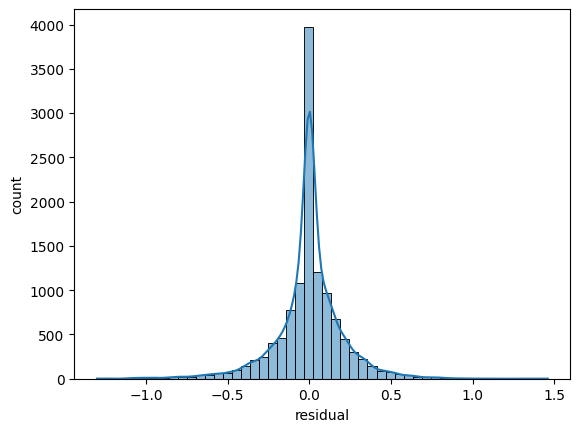

In [ ]:
# Plot residuals, i.e. the differences between the actual and predicted values.
sns.histplot(x=y_test-y_pred, bins=50, kde=True)
plt.xlabel('residual')
plt.ylabel('count')
plt.show()

Looking at the residual plots, it can be seen the residuals distribute nearly normal with mean around 0

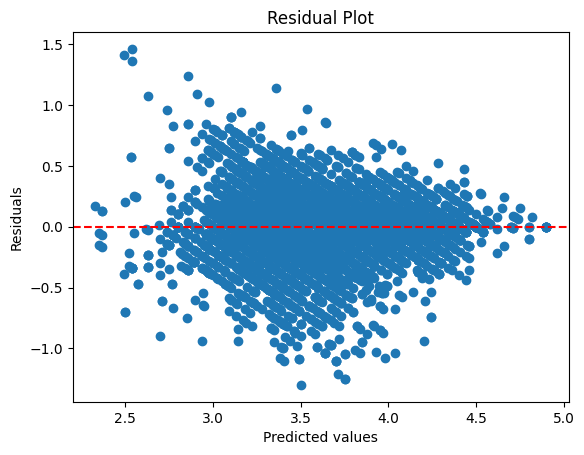

In [ ]:
# Create a scatter plot of residuals against predicted values
plt.scatter(y_pred, y_test-y_pred)
plt.title('Residual Plot')
plt.ylabel('Residuals')
plt.xlabel('Predicted values')
plt.axhline(y=0, color='r', linestyle='--') # Adds a horizontal line at y = 0
plt.show()

###### Optimize k

In [ ]:
# Define a list of k values to test
k_values = list(range(1, 31))

# Train and evaluate KNN classifiers with different k values

best_k=10
best_rmse=0.288
error_rates=[]
for k in k_values:
    knn = KNeighborsRegressor(k)
    knn.fit(X_train_scaled, y_train)
    y_pred=knn.predict(X_test_scaled)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    error_rates.append(rmse)
    if rmse <= best_rmse:
        best_k = k
        best_rmse = rmse

# Find the best k value with highest accuracy score
print(f"Best k value: {best_k}")
print(f"Best rmse: {best_rmse:.3f}")


Best k value: 1
Best rmse: 0.152


The best value of k is 1 that gives rmse of 0.152

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
# Create a KNN regressor object
k=1
knn = KNeighborsRegressor(k)

# Write code to fit the model to the SCALED training data
knn.fit(X_train_scaled, y_train)

KNeighborsRegressor(n_neighbors=1)

In [ ]:
# Write code to predict the charges for the SCALED testing data
y_pred = knn.predict(X_test_scaled)

In [ ]:
# Calculate performance metrics for the first model
rmse_1 = np.sqrt(mean_squared_error(y_test, y_pred))
r2_1 = r2_score(y_test, y_pred)
mae_1 = mean_absolute_error(y_test, y_pred)

# Print performance metrics for the first model
print("Root Mean Squared Error: {:.3f}".format(rmse_1))
print("R Squared: {:.3f}".format(r2_1))
print("Absolute Squared Error: {:.3f}".format(mae_1))

Root Mean Squared Error: 0.152
R Squared: 0.863
Absolute Squared Error: 0.050


###### Cross-Validation


I do the cross-validation with k=1

In [ ]:
#Import Kfold
from sklearn.model_selection import KFold, cross_val_score

In [ ]:
# Create a KFold object for 5-fold cross-validation with shuffling
kf = KFold(n_splits=10, shuffle=True, random_state=2023)

In [ ]:
# Scale the features using Min-Max Scaling
scaler = MinMaxScaler()


In [ ]:
#Create X and y, split data for df_imputed
X=df_imputed.drop('rate', axis=1)
y=df_imputed['rate']

In [ ]:
X_scaled_values = scaler.fit_transform(X)

In [ ]:
# Create a KNN regressor object
k=1
knn = KNeighborsRegressor(k)

In [ ]:
# Perform cross-validation on the KNN model
neg_mse_scores = cross_val_score(knn, X_scaled_values, y, cv=kf, scoring='neg_mean_squared_error')
r2_scores = cross_val_score(knn, X_scaled_values, y, cv=kf, scoring='r2')

# Compute the root mean squared error (RMSE) from the negative mean squared error scores
rmse_scores = np.sqrt(-neg_mse_scores)

# Compute the mean and standard deviation of the RMSE scores
mean_rmse = np.mean(rmse_scores)
std_rmse = np.std(rmse_scores)

# Compute the 95% confidence interval for the mean RMSE
ci_rmse = 1.96 * (std_rmse / np.sqrt(len(rmse_scores)))

# Compute the mean and standard deviation of r2
mean_r2 = np.mean(r2_scores)
std_r2 = np.std(r2_scores)

# Compute the 95% confidence interval for the mean r2
ci_r2 = 1.96 * (std_r2 / np.sqrt(len(r2_scores)))


# Print the results
print("Average RMSE: {:.2f} (95% CI: {:.2f}, {:.2f})".format(mean_rmse, mean_rmse - ci_rmse, mean_rmse + ci_rmse))
print("Average R2: {:.2f} (95% CI: {:.2f}, {:.2f})".format(mean_r2, mean_r2 - ci_r2, mean_r2 + ci_r2))


Average RMSE: 0.14 (95% CI: 0.14, 0.14)
Average R2: 0.88 (95% CI: 0.88, 0.89)


##### Model with vectorizing 'cuisines'




I fit kNN for k = 10 and the k optimized above = 1

###### k = 10

In [ ]:
X_count_cuisines

ave_cost_for_two  votes  ave_review_ranking  rest_type_Bakery  \
0                 700.0   13.0            4.750000               0.0   
1                 400.0   28.0            4.500000               0.0   
2                 200.0   18.0            4.000000               0.0   
3                1200.0  550.0            4.800000               0.0   
4                 250.0   67.0            3.000000               0.0   
...                 ...    ...                 ...               ...   
40107             515.0   25.0            2.000000               0.0   
40108             500.0   23.0            3.454545               0.0   
40109             300.0   23.0            3.454545               0.0   
40110             500.0  162.0            3.500000               0.0   
40111             350.0  163.0            3.254808               0.0   

       rest_type_Cafe  rest_type_Casual Dining  rest_type_Casual Dining, Bar  \
0                 1.0                      0.0                           0.0   
1                 0.0                      0.0                           0.0   
2                 0.0                      0.0                           0.0   
3                 0.0                      1.0                           0.0   
4                 1.0                      0.0                           0.0   
...               ...                      ...                           ...   
40107             0.0                      0.0                           0.0   
40108             0.0                      0.0                           0.0   
40109             0.0                      0.0                           0.0   
40110             0.0                      0.0                           0.0   
40111             0.0                      0.0                           0.0   

       rest_type_Delivery  rest_type_Quick Bites  \
0                     0.0                    0.0   
1                     0.0                    1.0   
2                     0.0                    1.0   
3                     0.0                    0.0   
4                     0.0                    0.0   
...                   ...                    ...   
40107                 0.0                    0.0   
40108                 0.0                    0.0   
40109                 0.0                    1.0   
40110                 0.0                    1.0   
40111                 0.0                    1.0   

       rest_type_Takeaway, Delivery  ...  vietnamese momos  vietnamese salad  \
0                               0.0  ...                 0                 0   
1                               0.0  ...                 0                 0   
2                               0.0  ...                 0                 0   
3                               0.0  ...                 0                 0   
4                               0.0  ...                 0                 0   
...                             ...  ...               ...               ...   
40107                           1.0  ...                 0                 0   
40108                           1.0  ...                 0                 0   
40109                           0.0  ...                 0                 0   
40110                           0.0  ...                 0                 0   
40111                           0.0  ...                 0                 0   

       vietnamese sri  vietnamese thai  wraps  wraps beverages  wraps burger  \
0                   0                0      0                0             0   
1                   0                0      0                0             0   
2                   0                0      0                0             0   
3                   0                0      0                0             0   
4                   0                0      0                0             0   
...               ...              ...    ...              ...           ...   
40107               0              

In [ ]:
# Normalize the features using StandardScaler
scaler  = MinMaxScaler()

# Fit the scaler on the training data
X_count_cuisines_train_scaled = scaler.fit_transform(X_count_cuisines_train)

# Transform the test data using the same scaler
X_count_cuisines_test_scaled = scaler.transform(X_count_cuisines_test)

In [ ]:
# Create a KNN regressor object
k=10
knn = KNeighborsRegressor(k)

# Write code to fit the model to the SCALED training data
knn.fit(X_count_cuisines_train_scaled, y_count_cuisines_train)

KNeighborsRegressor(n_neighbors=10)

In [ ]:
# Predict
y_count_cuisines_pred = knn.predict(X_count_cuisines_test_scaled)

In [ ]:
inspection=pd.DataFrame({'Actual':y_count_cuisines_test, 'Predicted':y_count_cuisines_pred})
inspection.head(10)

Actual  Predicted
14191    4.00      3.533
4913     4.10      3.704
27020    3.32      3.399
29093    3.26      3.450
27033    4.40      4.370
30706    3.50      3.434
26803    2.30      3.130
4327     3.50      3.430
23593    3.10      3.346
36887    4.00      3.780

In [ ]:
# Calculate performance metrics for the first model
rmse_1 = np.sqrt(mean_squared_error(y_count_cuisines_test, y_count_cuisines_pred))
r2_1 = r2_score(y_count_cuisines_test, y_count_cuisines_pred)
mae_1 = mean_absolute_error(y_count_cuisines_test,y_count_cuisines_pred )

# Print performance metrics for the first model
print("Root Mean Squared Error: {:.3f}".format(rmse_1))
print("R Squared: {:.3f}".format(r2_1))
print("Absolute Squared Error: {:.3f}".format(mae_1))

Root Mean Squared Error: 0.223
R Squared: 0.706
Absolute Squared Error: 0.148


###### k = 1

In [ ]:
# Create a KNN regressor object
k=1
knn = KNeighborsRegressor(k)

# Write code to fit the model to the SCALED training data
knn.fit(X_count_cuisines_train_scaled, y_count_cuisines_train)

KNeighborsRegressor(n_neighbors=1)

In [ ]:
# Predict
y_count_cuisines_pred = knn.predict(X_count_cuisines_test_scaled)

In [ ]:
# Calculate performance metrics for the first model
rmse_1 = np.sqrt(mean_squared_error(y_count_cuisines_test, y_count_cuisines_pred))
r2_1 = r2_score(y_count_cuisines_test, y_count_cuisines_pred)
mae_1 = mean_absolute_error(y_count_cuisines_test,y_count_cuisines_pred )

# Print performance metrics for the first model
print("Root Mean Squared Error: {:.3f}".format(rmse_1))
print("R Squared: {:.3f}".format(r2_1))
print("Absolute Squared Error: {:.3f}".format(mae_1))

Root Mean Squared Error: 0.132
R Squared: 0.897
Absolute Squared Error: 0.038


In [ ]:
# Create a KFold object for 5-fold cross-validation with shuffling
kf = KFold(n_splits=10, shuffle=True, random_state=2023)

In [ ]:
#Create X and y, split data for df_imputed
X=df_count_cuisines.drop('rate', axis=1)
y=df_count_cuisines['rate']

In [ ]:
X_scaled_values = scaler.fit_transform(X)

###### Cross-Validation

In [ ]:
# Perform cross-validation on the KNN model
neg_mse_scores = cross_val_score(knn, X_scaled_values, y, cv=kf, scoring='neg_mean_squared_error')
r2_scores = cross_val_score(knn, X_scaled_values, y, cv=kf, scoring='r2')

# Compute the root mean squared error (RMSE) from the negative mean squared error scores
rmse_scores = np.sqrt(-neg_mse_scores)

# Compute the mean and standard deviation of the RMSE scores
mean_rmse = np.mean(rmse_scores)
std_rmse = np.std(rmse_scores)

# Compute the 95% confidence interval for the mean RMSE
ci_rmse = 1.96 * (std_rmse / np.sqrt(len(rmse_scores)))

# Compute the mean and standard deviation of r2
mean_r2 = np.mean(r2_scores)
std_r2 = np.std(r2_scores)

# Compute the 95% confidence interval for the mean r2
ci_r2 = 1.96 * (std_r2 / np.sqrt(len(r2_scores)))


# Print the results
print("Average RMSE: {:.2f} (95% CI: {:.2f}, {:.2f})".format(mean_rmse, mean_rmse - ci_rmse, mean_rmse + ci_rmse))
print("Average R2: {:.2f} (95% CI: {:.2f}, {:.2f})".format(mean_r2, mean_r2 - ci_r2, mean_r2 + ci_r2))

Average RMSE: 0.11 (95% CI: 0.10, 0.11)
Average R2: 0.93 (95% CI: 0.92, 0.93)


#### ANN Model(Artificial Neural Network Model)

I fit ANN model with two hidden layer and the size of neurons are 20,10 respectively

##### Baseline Model


In [ ]:
#import MLPRegressor and metric functions
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [ ]:
# Initialise an ANN model
ann_reg = MLPRegressor(hidden_layer_sizes=(20,10), activation='relu', solver='adam', max_iter=1000, random_state=2023)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
# Scale the features using Min-Max Scaling
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Fit it to the scaled training data
ann_reg.fit(X_train_scaled, y_train)

MLPRegressor(hidden_layer_sizes=(20, 10), max_iter=1000, random_state=2023)

In [ ]:
# Use the trained model to predict on the scaled test data
y_pred_mlp= ann_reg.predict(X_test_scaled)


In [ ]:
inspection=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred_mlp})
inspection.sample(10)

Actual  Predicted
35888    4.20   3.927081
25557    4.00   4.119184
34397    3.30   3.351965
39133    2.90   3.302562
8063     3.31   3.194478
28661    3.41   3.350462
3372     3.50   3.453978
29410    3.50   3.328925
23757    4.30   4.191083
36006    3.41   3.347609

In [ ]:
# Calculate RMSE, R-squared, and MAE
rmse_mlp = np.sqrt(mean_squared_error(y_test, y_pred_mlp))
r2_mlp = r2_score(y_test, y_pred_mlp)
mae_mlp = mean_absolute_error(y_test, y_pred_mlp)

# Print the evaluation metrics
print("Scikit learn MLP RMSE: {:.3f}" .format(rmse_mlp))
print("Scikit learn MLP MAE: {:.3f}" .format(mae_mlp))
print("Scikit learn MLP R-squared: {:.3f}" .format(r2_mlp))

Scikit learn MLP RMSE: 0.266
Scikit learn MLP MAE: 0.198
Scikit learn MLP R-squared: 0.581


##### Model with vectorizing 'cuisines'


In [ ]:
# Initialise an ANN model
ann_reg = MLPRegressor(hidden_layer_sizes=(10,5), activation='relu', solver='adam', max_iter=1000, random_state=2023)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
# Scale the features using Min-Max Scaling
scaler = MinMaxScaler()
X_count_cuisines_train_scaled = scaler.fit_transform(X_count_cuisines_train)
X_count_cuisines_test_scaled = scaler.transform(X_count_cuisines_test)

In [ ]:
# Fit it to the scaled training data
ann_reg.fit(X_count_cuisines_train_scaled, y_count_cuisines_train)

MLPRegressor(hidden_layer_sizes=(10, 5), max_iter=1000, random_state=2023)

In [ ]:
# Use the trained model to predict on the scaled test data
y_count_cuisines_pred_mlp= ann_reg.predict(X_count_cuisines_test_scaled)

In [ ]:
inspection=pd.DataFrame({'Actual':y_count_cuisines_test, 'Predicted':y_count_cuisines_pred_mlp})
inspection.sample(20)

Actual  Predicted
19060    3.41   3.360753
1653     4.40   4.388689
30244    3.41   3.387466
4004     3.50   3.327819
31973    3.41   3.311863
30167    3.60   3.254717
7295     3.80   3.302472
26413    4.10   3.817539
25032    3.70   3.809430
39825    3.80   4.146166
12452    3.10   3.047314
35386    2.60   3.015031
39250    3.90   3.738470
5595     3.90   3.858356
5422     3.29   3.370951
15640    3.20   3.304500
19582    3.20   3.365849
15972    3.90   3.569061
22221    3.29   3.353901
32257    3.80   3.643675

In [ ]:
# Calculate RMSE, R-squared, and MAE
rmse_mlp = np.sqrt(mean_squared_error(y_count_cuisines_test, y_count_cuisines_test))
r2_mlp = r2_score(y_count_cuisines_test, y_count_cuisines_pred_mlp)
mae_mlp = mean_absolute_error(y_count_cuisines_test, y_count_cuisines_pred_mlp)

# Print the evaluation metrics
print("Scikit learn MLP RMSE: {:.3f}" .format(rmse_mlp))
print("Scikit learn MLP MAE: {:.3f}" .format(mae_mlp))
print("Scikit learn MLP R-squared: {:.3f}" .format(r2_mlp))

Scikit learn MLP RMSE: 0.000
Scikit learn MLP MAE: 0.166
Scikit learn MLP R-squared: 0.670


###### Cross-validation


df_count_cú

In [ ]:
df_count_cuisines

ave_cost_for_two  votes  ave_review_ranking  rate  rest_type_Bakery  \
0                 700.0   13.0            4.750000   3.6               0.0   
1                 400.0   28.0            4.500000   3.8               0.0   
2                 200.0   18.0            4.000000   3.9               0.0   
3                1200.0  550.0            4.800000   4.3               0.0   
4                 250.0   67.0            3.000000   3.7               0.0   
...                 ...    ...                 ...   ...               ...   
40107             500.0   25.0            2.000000   2.9               0.0   
40108             500.0   23.0            3.454545   3.6               0.0   
40109             300.0   23.0            3.454545   3.1               0.0   
40110             500.0  162.0            3.500000   4.0               0.0   
40111             350.0  163.0            3.254808   3.1               0.0   

       rest_type_Cafe  rest_type_Casual Dining  rest_type_Casual Dining, Bar  \
0                 1.0                      0.0                           0.0   
1                 0.0                      0.0                           0.0   
2                 0.0                      0.0                           0.0   
3                 0.0                      1.0                           0.0   
4                 1.0                      0.0                           0.0   
...               ...                      ...                           ...   
40107             0.0                      0.0                           0.0   
40108             0.0                      0.0                           0.0   
40109             0.0                      0.0                           0.0   
40110             0.0                      0.0                           0.0   
40111             0.0                      0.0                           0.0   

       rest_type_Delivery  rest_type_Quick Bites  ...  vietnamese momos  \
0                     0.0                    0.0  ...                 0   
1                     0.0                    1.0  ...                 0   
2                     0.0                    1.0  ...                 0   
3                     0.0                    0.0  ...                 0   
4                     0.0                    0.0  ...                 0   
...                   ...                    ...  ...               ...   
40107                 0.0                    0.0  ...                 0   
40108                 0.0                    0.0  ...                 0   
40109                 0.0                    1.0  ...                 0   
40110                 0.0                    1.0  ...                 0   
40111                 0.0                    1.0  ...                 0   

       vietnamese salad  vietnamese sri  vietnamese thai  wrap  wrap beverage  \
0                     0               0                0     0              0   
1                     0               0                0     0              0   
2                     0               0                0     0              0   
3                     0               0                0     0              0   
4                     0               0                0     0              0   
...                 ...             ...              ...   ...            ...   
40107                 0               0                0     0              0   
40108                 0               0                0     0              0   
40109                 0               0                0     0              0   
40110                 0               0                0     0              0   
40111                 0               0                0     0              0   

       wrap burger  wrap cafe  wrap pizza  wrap roll  
0                0          0           0          0  
1                0          0           0          0  
2                0          0           0          0  
3              

In [ ]:
df_count_cuisin

In [ ]:

# Create a KFold object for 5-fold cross-validation with shuffling
kf = KFold(n_splits=10, shuffle=True, random_state=2023)
# Scale the features using Min-Max Scaling
scaler = MinMaxScaler()
#Create X and y, split data for df_imputed
X=df_count_cuisines.drop('rate', axis=1)
y=df_count_cuisines['rate']

In [ ]:
# Initialise an ANN model
ann_reg = MLPRegressor(hidden_layer_sizes=(10,5), activation='relu', solver='adam', max_iter=1000, random_state=2023)

In [ ]:
X_scaled_values = scaler.fit_transform(X)

In [ ]:
# Perform cross-validation on the ANN model
neg_mse_scores = cross_val_score(ann_reg, X_scaled_values, y, cv=kf, scoring='neg_mean_squared_error')
r2_scores = cross_val_score(ann_reg, X_scaled_values, y, cv=kf, scoring='r2')

# Compute the root mean squared error (RMSE) from the negative mean squared error scores
rmse_scores = np.sqrt(-neg_mse_scores)

# Compute the mean and standard deviation of the RMSE scores
mean_rmse = np.mean(rmse_scores)
std_rmse = np.std(rmse_scores)

# Compute the 95% confidence interval for the mean RMSE
ci_rmse = 1.96 * (std_rmse / np.sqrt(len(rmse_scores)))

# Compute the mean and standard deviation of r2
mean_r2 = np.mean(r2_scores)
std_r2 = np.std(r2_scores)

# Compute the 95% confidence interval for the mean r2
ci_r2 = 1.96 * (std_r2 / np.sqrt(len(r2_scores)))


# Print the results
print("Average RMSE: {:.2f} (95% CI: {:.2f}, {:.2f})".format(mean_rmse, mean_rmse - ci_rmse, mean_rmse + ci_rmse))
print("Average R2: {:.2f} (95% CI: {:.2f}, {:.2f})".format(mean_r2, mean_r2 - ci_r2, mean_r2 + ci_r2))


Average RMSE: 0.23 (95% CI: 0.23, 0.23)
Average R2: 0.68 (95% CI: 0.67, 0.68)


### Unsupervised Machine Learning

#### KMeans Clustering

I will cluster the dataset based on: restaurant type and ave_review_ranking

In [ ]:
food_data.columns

Index(['rest_type', 'cuisines', 'listed_in_type', 'listed_in_city',
       'online_order', 'book_table', 'ave_cost_for_two', 'dish_liked', 'votes',
       'ave_review_ranking', 'rate', 'dish_liked_count', 'Cluster'],
      dtype='object')

In [ ]:
#filter two columns to cluster on
df_to_cluster=food_data[['rest_type','ave_review_ranking']]

In [ ]:
df_to_cluster

rest_type  ave_review_ranking
0                    Cafe            4.750000
1             Quick Bites            4.500000
2             Quick Bites            4.000000
3           Casual Dining            4.800000
4                    Cafe            3.000000
...                   ...                 ...
40107  Takeaway, Delivery            2.000000
40108  Takeaway, Delivery            3.454545
40109         Quick Bites            3.454545
40110         Quick Bites            3.500000
40111         Quick Bites            3.254808

[40112 rows x 2 columns]

In [ ]:
#check missing values
df_to_cluster.isna().sum()

rest_type                0
ave_review_ranking    6374
dtype: int64

In [ ]:
#refill missing values from the processed dataset
df_to_cluster['ave_review_ranking']=df_imputed['ave_review_ranking']

<ipython-input-89-507ffebc50d3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_to_cluster['ave_review_ranking']=df_imputed['ave_review_ranking']


In [ ]:
df_to_cluster.isna().sum()

rest_type             0
ave_review_ranking    0
dtype: int64

In [ ]:
df_to_cluster

rest_type  ave_review_ranking
0                    Cafe            4.750000
1             Quick Bites            4.500000
2             Quick Bites            4.000000
3           Casual Dining            4.800000
4                    Cafe            3.000000
...                   ...                 ...
40107  Takeaway, Delivery            2.000000
40108  Takeaway, Delivery            3.454545
40109         Quick Bites            3.454545
40110         Quick Bites            3.500000
40111         Quick Bites            3.254808

[40112 rows x 2 columns]

In [ ]:
#convert rest_type to dummy variables
df_to_cluster=pd.get_dummies(df_to_cluster, columns = ['rest_type'])


In [ ]:
df_to_cluster.drop(columns=['cuisines'],inplace=True)

In [ ]:

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [ ]:
#import scaler
from sklearn.preprocessing import MinMaxScaler

In [ ]:
# Scale the features using Min-Max Scaling
scaler = MinMaxScaler()

In [ ]:
df_to_cluster.columns

Index(['ave_review_ranking', 'rest_type_Bakery', 'rest_type_Cafe',
       'rest_type_Casual Dining', 'rest_type_Casual Dining, Bar',
       'rest_type_Delivery', 'rest_type_Quick Bites',
       'rest_type_Takeaway, Delivery'],
      dtype='object')

In [ ]:
#Create X and y
X=df_to_cluster

In [ ]:
# Fit and transform the features to scale on the training data
X_scaled = scaler.fit_transform(X)

In [ ]:
# Fit K-means clustering model with a 'guessed' number of clusters
k=10
kmeans = KMeans(n_clusters=k, n_init='auto',max_iter=300, random_state=2023)

#fit kmeans with X_scaled
kmeans.fit(X_scaled)

# Add cluster labels to original dataset
df_to_cluster['Cluster'] = kmeans.labels_

In [ ]:
# Evaluate the model using within-cluster sum of squares (WCSS)
wcss = kmeans.inertia_
print("Within-Cluster Sum of Squares (WCSS):", '%.3f' % wcss)


Within-Cluster Sum of Squares (WCSS): 974.137


In [ ]:
from sklearn.metrics import davies_bouldin_score


In [ ]:
from sklearn.metrics import davies_bouldin_score

# Compute the Davies-Bouldin index
dbs = davies_bouldin_score(X_scaled, kmeans.labels_)
print("Davies Bouldin index:", '%.3f' % dbs)

Davies Bouldin index: 0.404


In [ ]:
# Compute the Silhouette score for the clustering model
silhouette_avg = silhouette_score(X_scaled, kmeans.labels_)

print('Silhouette score:', '%.3f' % silhouette_avg)

Silhouette score: 0.682


In [ ]:
# Determine optimal number of clusters using silhouette score
sil_scores = []
best_k=10
best_sil_score=0.112
for i in range(2, 41):
  kmeans = KMeans(n_clusters=i, n_init=2)
  kmeans.fit(X_scaled)
  sil_score_i=silhouette_score(X_scaled, kmeans.labels_)
  sil_scores.append(sil_score_i)
  if best_sil_score < sil_score_i:
    best_k = i
    best_sil_score = sil_score_i

print('Best k: ', best_k)
print('Best silhouette score: ', '%.3f' %best_sil_score)

Best k:  7
Best silhouette score:  0.836


As can be seen from that, using Silhouette score, the best k to cluster is 7 and we can get a very high Silhouette score of 0.836

##### Cluster with k = 7

In [ ]:
# Fit K-means clustering model with a 'guessed' number of clusters
k=7
kmeans = KMeans(n_clusters=k, n_init='auto',max_iter=300, random_state=2023)

#fit kmeans with X_scaled
kmeans.fit(X_scaled)


KMeans(n_clusters=7, n_init='auto', random_state=2023)

In [ ]:
# Add cluster labels to original dataset
df_to_cluster['Cluster'] = kmeans.labels_

In [ ]:
# Evaluate the model using within-cluster sum of squares (WCSS)
wcss = kmeans.inertia_
print("Within-Cluster Sum of Squares (WCSS):", '%.3f' % wcss)

# Compute the Davies-Bouldin index
dbs = davies_bouldin_score(X_scaled, kmeans.labels_)
print("Davies Bouldin index:", '%.3f' % dbs)

# Compute the Silhouette score for the clustering model
silhouette_avg = silhouette_score(X_scaled, kmeans.labels_)

print('Silhouette score:', '%.3f' % silhouette_avg)

Within-Cluster Sum of Squares (WCSS): 1895.840
Davies Bouldin index: 0.275
Silhouette score: 0.836


As can be seen that with k =7, the clustering is far more better: lower WCSS (the sum of the squared distance (Sum of Squared Errors SSE) between each data point and its assigned cluster center is lower mean each cluster is more compact; lower Davies Bouldin index ( the ratio of the within-cluster compactness to the between-cluster separation); higher Silhouette score ( how similar the data points are within each cluster and how well separated the clusters are)


In [ ]:
cluster_labels = kmeans.fit_predict(X_scaled)

In [ ]:
from sklearn.metrics import silhouette_samples

In [ ]:
import matplotlib.cm as cm

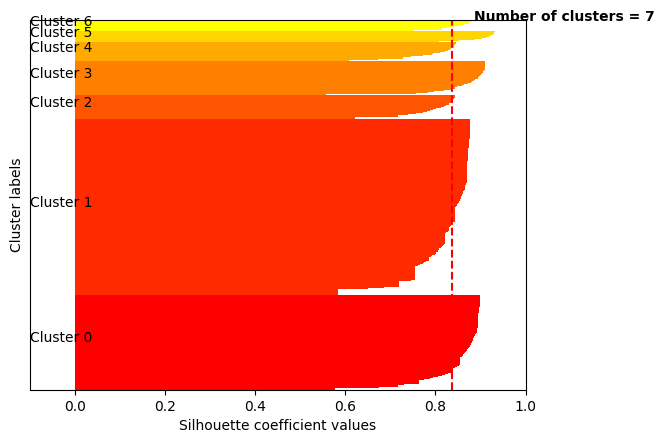

In [ ]:
# Compute silhouette scores
silhouette_avg = silhouette_score(X_scaled, cluster_labels)
sample_silhouette_values = silhouette_samples(X_scaled, cluster_labels)

# Define the colormap, options include: autumn, Spectral, viridis, plasma, cool, jet
cmap = cm.autumn
n_clusters = 7

# Create a list of evenly spaced values in the range [0, 1]
values = np.linspace(0, 1, n_clusters)

# Plot silhouette diagram
fig, ax = plt.subplots()
y_lower, y_upper = 0, 0
for i in range(n_clusters):
    ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
    ith_cluster_silhouette_values.sort()
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper += size_cluster_i
    color = cmap(values[i])
    ax.barh(range(y_lower, y_upper), ith_cluster_silhouette_values, height=1.0,
            edgecolor='none', color=color)
    ax.text(-0.1, (y_lower + y_upper) / 2, 'Cluster ' + str(i), color='black', fontsize=10)
    y_lower += size_cluster_i

ax.axvline(x=silhouette_avg, color="red", linestyle="--")
ax.set_xlabel("Silhouette coefficient values")
ax.set_ylabel("Cluster labels")
ax.set_yticks([])
ax.set_xlim([-0.1, 1])
ax.set_ylim([0, len(X_scaled) + (n_clusters + 1) * 10])

ax.text(silhouette_avg + 0.05, len(X_scaled) + 5, "Number of clusters = %d" % n_clusters, fontsize=10, fontweight='bold')

plt.show()

#### Post Analysis for Cluster Profiling

##### Examine the Cluster size

In [ ]:
df_to_cluster.head()

ave_review_ranking  rest_type_Bakery  rest_type_Cafe  \
0                4.75                 0               1   
1                4.50                 0               0   
2                4.00                 0               0   
3                4.80                 0               0   
4                3.00                 0               1   

   rest_type_Casual Dining  rest_type_Casual Dining, Bar  rest_type_Delivery  \
0                        0                             0                   0   
1                        0                             0                   0   
2                        0                             0                   0   
3                        1                             0                   0   
4                        0                             0                   0   

   rest_type_Quick Bites  rest_type_Takeaway, Delivery  Cluster  
0                      0                             0        3  
1                      1                             0        1  
2                      1                             0        1  
3                      0                             0        0  
4                      0                             0        3

In [ ]:
cluster_count=df_to_cluster.Cluster.value_counts()
cluster_count

1    19129
0    10326
3     3732
2     2595
4     2035
5     1154
6     1141
Name: Cluster, dtype: int64

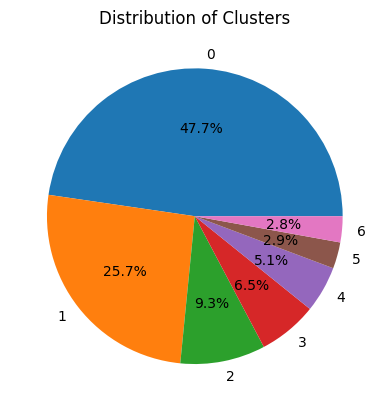

In [ ]:
#Let's generate a pie chart with the distribution of churned cases, along with percentage labels.

# Sort the index to ensure the clusters are in order
sorted_cluster_count = cluster_count.sort_index()

colours = sns.color_palette("tab10", n_colors=len(cluster_count))

plt.pie(cluster_count, labels=sorted_cluster_count.index, autopct='%1.1f%%', colors= colours)
plt.title('Distribution of Clusters')
plt.show()

As can be seen, the cluster 0 takes the majority part with 47.7%, the following cluster is cluster 1 with 25.7%, the remaining clusters are less than 10%

In [ ]:
food_data

rest_type                            cuisines listed_in_type  \
0                    Cafe                                cafe          Cafes   
1             Quick Bites        burger continental fast food       Dine-out   
2             Quick Bites           south indian healthy food       Delivery   
3           Casual Dining  chinese north indian biryani kebab       Delivery   
4                    Cafe                            cafe tea       Dine-out   
...                   ...                                 ...            ...   
40107  Takeaway, Delivery                     pizza fast food       Delivery   
40108  Takeaway, Delivery                     desserts bakery       Delivery   
40109         Quick Bites  street food beverages north indian       Delivery   
40110         Quick Bites           arabian bbq rolls chinese       Delivery   
40111         Quick Bites             fast food biryani rolls       Delivery   

              listed_in_city online_order book_table  ave_cost_for_two  \
0                   JP Nagar           No         No             700.0   
1      Koramangala 5th Block          Yes         No             400.0   
2                  Jayanagar          Yes         No             200.0   
3               Brigade Road          Yes        Yes            1200.0   
4               New BEL Road          Yes         No             250.0   
...                      ...          ...        ...               ...   
40107             Whitefield           No         No               NaN   
40108           Kammanahalli          Yes         No             500.0   
40109                MG Road           No         No             300.0   
40110              Bellandur          Yes         No             500.0   
40111           Brigade Road          Yes         No             350.0   

                                              dish_liked  votes  \
0                                                    NaN     13   
1                                                    NaN     28   
2                                                    NaN     18   
3      Fish, Dumplings, Biryani, Paneer Tikka Masala,...    550   
4      Ginger Chai, Pakoda, Tea, Paneer Thali, Chole ...     67   
...                                                  ...    ...   
40107                                                NaN     25   
40108                                                NaN     23   
40109                                                NaN     23   
40110  Pita Bread, Rolls, Shawarma Roll, Lebanese Sha...    162   
40111             Rolls, Chicken Tikka Roll, Cheese Roll    163   

       ave_review_ranking  rate  dish_liked_count  
0                4.750000   3.6                 0  
1                4.500000   3.8                 0  
2                4.000000   3.9                 0  
3                4.800000   4.3                 7  
4                3.000000   3.7                 5  
...                   ...   ...               ...  
40107            2.000000   2.9                 0  
40108            3.454545   3.6                 0  
40109            3.454545   3.1                 0  
40110            3.500000   4.0                 6  
40111            3.254808   3.1                 3  

[40112 rows x 12 columns]

In [ ]:
food_data.head()

rest_type                            cuisines listed_in_type  \
0           Cafe                                cafe          Cafes   
1    Quick Bites        burger continental fast food       Dine-out   
2    Quick Bites           south indian healthy food       Delivery   
3  Casual Dining  chinese north indian biryani kebab       Delivery   
4           Cafe                            cafe tea       Dine-out   

          listed_in_city online_order book_table  ave_cost_for_two  \
0               JP Nagar           No         No             700.0   
1  Koramangala 5th Block          Yes         No             400.0   
2              Jayanagar          Yes         No             200.0   
3           Brigade Road          Yes        Yes            1200.0   
4           New BEL Road          Yes         No             250.0   

                                          dish_liked  votes  \
0                                                NaN     13   
1                                                NaN     28   
2                                                NaN     18   
3  Fish, Dumplings, Biryani, Paneer Tikka Masala,...    550   
4  Ginger Chai, Pakoda, Tea, Paneer Thali, Chole ...     67   

   ave_review_ranking  rate  dish_liked_count  Cluster  
0                4.75   3.6                 0        2  
1                4.50   3.8                 0        5  
2                4.00   3.9                 0        5  
3                4.80   4.3                 7        0  
4                3.00   3.7                 5        2

In [ ]:
food_data.isna().sum()

rest_type                 0
cuisines                  0
listed_in_type            0
listed_in_city            0
online_order              0
book_table                0
ave_cost_for_two        237
dish_liked            22761
votes                     0
ave_review_ranking     6374
rate                   8326
dish_liked_count          0
Cluster                   0
dtype: int64

In [ ]:
df_imputed['Cluster']=food_data['Cluster']

In [ ]:
food_data['rate']=

In [ ]:
df_to_cluster

ave_review_ranking  rest_type_Bakery  rest_type_Cafe  \
0                4.750000                 0               1   
1                4.500000                 0               0   
2                4.000000                 0               0   
3                4.800000                 0               0   
4                3.000000                 0               1   
...                   ...               ...             ...   
40107            2.000000                 0               0   
40108            3.454545                 0               0   
40109            3.454545                 0               0   
40110            3.500000                 0               0   
40111            3.254808                 0               0   

       rest_type_Casual Dining  rest_type_Casual Dining, Bar  \
0                            0                             0   
1                            0                             0   
2                            0                             0   
3                            1                             0   
4                            0                             0   
...                        ...                           ...   
40107                        0                             0   
40108                        0                             0   
40109                        0                             0   
40110                        0                             0   
40111                        0                             0   

       rest_type_Delivery  rest_type_Quick Bites  \
0                       0                      0   
1                       0                      1   
2                       0                      1   
3                       0                      0   
4                       0                      0   
...                   ...                    ...   
40107                   0                      0   
40108                   0                      0   
40109                   0                      1   
40110                   0                      1   
40111                   0                      1   

       rest_type_Takeaway, Delivery  Cluster  
0                                 0        3  
1                                 0        1  
2                                 0        1  
3                                 0        0  
4                                 0        3  
...                             ...      ...  
40107                             1        4  
40108                             1        4  
40109                             0        1  
40110                             0        1  
40111                             0        1  

[40112 rows x 9 columns]

In [ ]:
food_data

rest_type                            cuisines listed_in_type  \
0                    Cafe                                cafe          Cafes   
1             Quick Bites        burger continental fast food       Dine-out   
2             Quick Bites           south indian healthy food       Delivery   
3           Casual Dining  chinese north indian biryani kebab       Delivery   
4                    Cafe                            cafe tea       Dine-out   
...                   ...                                 ...            ...   
40107  Takeaway, Delivery                     pizza fast food       Delivery   
40108  Takeaway, Delivery                     desserts bakery       Delivery   
40109         Quick Bites  street food beverages north indian       Delivery   
40110         Quick Bites           arabian bbq rolls chinese       Delivery   
40111         Quick Bites             fast food biryani rolls       Delivery   

              listed_in_city online_order book_table  ave_cost_for_two  \
0                   JP Nagar           No         No             700.0   
1      Koramangala 5th Block          Yes         No             400.0   
2                  Jayanagar          Yes         No             200.0   
3               Brigade Road          Yes        Yes            1200.0   
4               New BEL Road          Yes         No             250.0   
...                      ...          ...        ...               ...   
40107             Whitefield           No         No               NaN   
40108           Kammanahalli          Yes         No             500.0   
40109                MG Road           No         No             300.0   
40110              Bellandur          Yes         No             500.0   
40111           Brigade Road          Yes         No             350.0   

                                              dish_liked  votes  \
0                                                    NaN     13   
1                                                    NaN     28   
2                                                    NaN     18   
3      Fish, Dumplings, Biryani, Paneer Tikka Masala,...    550   
4      Ginger Chai, Pakoda, Tea, Paneer Thali, Chole ...     67   
...                                                  ...    ...   
40107                                                NaN     25   
40108                                                NaN     23   
40109                                                NaN     23   
40110  Pita Bread, Rolls, Shawarma Roll, Lebanese Sha...    162   
40111             Rolls, Chicken Tikka Roll, Cheese Roll    163   

       ave_review_ranking  rate  dish_liked_count  
0                4.750000   3.6                 0  
1                4.500000   3.8                 0  
2                4.000000   3.9                 0  
3                4.800000   4.3                 7  
4                3.000000   3.7                 5  
...                   ...   ...               ...  
40107            2.000000   2.9                 0  
40108            3.454545   3.6                 0  
40109            3.454545   3.1                 0  
40110            3.500000   4.0                 6  
40111            3.254808   3.1                 3  

[40112 rows x 12 columns]

In [ ]:
df_imputed

ave_cost_for_two  votes  ave_review_ranking  rate  rest_type_Bakery  \
0                 700.0   13.0            4.750000   3.6               0.0   
1                 400.0   28.0            4.500000   3.8               0.0   
2                 200.0   18.0            4.000000   3.9               0.0   
3                1200.0  550.0            4.800000   4.3               0.0   
4                 250.0   67.0            3.000000   3.7               0.0   
...                 ...    ...                 ...   ...               ...   
40107             515.0   25.0            2.000000   2.9               0.0   
40108             500.0   23.0            3.454545   3.6               0.0   
40109             300.0   23.0            3.454545   3.1               0.0   
40110             500.0  162.0            3.500000   4.0               0.0   
40111             350.0  163.0            3.254808   3.1               0.0   

       rest_type_Cafe  rest_type_Casual Dining  rest_type_Casual Dining, Bar  \
0                 1.0                      0.0                           0.0   
1                 0.0                      0.0                           0.0   
2                 0.0                      0.0                           0.0   
3                 0.0                      1.0                           0.0   
4                 1.0                      0.0                           0.0   
...               ...                      ...                           ...   
40107             0.0                      0.0                           0.0   
40108             0.0                      0.0                           0.0   
40109             0.0                      0.0                           0.0   
40110             0.0                      0.0                           0.0   
40111             0.0                      0.0                           0.0   

       rest_type_Delivery  rest_type_Quick Bites  \
0                     0.0                    0.0   
1                     0.0                    1.0   
2                     0.0                    1.0   
3                     0.0                    0.0   
4                     0.0                    0.0   
...                   ...                    ...   
40107                 0.0                    0.0   
40108                 0.0                    0.0   
40109                 0.0                    1.0   
40110                 0.0                    1.0   
40111                 0.0                    1.0   

       rest_type_Takeaway, Delivery  online_order_No  online_order_Yes  \
0                               0.0              1.0               0.0   
1                               0.0              0.0               1.0   
2                               0.0              0.0               1.0   
3                               0.0              0.0               1.0   
4                               0.0              0.0               1.0   
...                             ...              ...               ...   
40107                           1.0              1.0               0.0   
40108                           1.0              0.0               1.0   
40109                           0.0              1.0               0.0   
40110                           0.0              0.0               1.0   
40111                           0.0              0.0               1.0   

       book_table_No  book_table_Yes  dish_liked_count  Cluster  
0                1.0             0.0                 0        2  
1                1.0             0.0                 0        5  
2                1.0             0.0                 0        5  
3                0.0             1.0                 7        0  
4                1.0             0.0                 5        2  
...              ...             ...               ...      ...  
40107            1.0             0.0                 0        4  
40108            1.0             0.0                 0        4  
4

In [ ]:
df_imputed.groupby('Cluster')['rate'].describe()

count      mean       std  min   25%   50%  75%  max
Cluster                                                        
0        10326.0  3.713357  0.464759  1.8  3.40  3.80  4.0  4.9
1        12005.0  3.386883  0.296740  2.1  3.23  3.36  3.6  4.4
2         3732.0  3.803017  0.431582  2.3  3.50  3.90  4.1  4.6
3         2595.0  3.482408  0.359056  2.1  3.30  3.40  3.7  4.6
4         3189.0  3.666968  0.468457  2.3  3.32  3.60  4.1  4.9
5         7124.0  3.658898  0.301401  2.4  3.40  3.60  3.9  4.8
6         1141.0  3.498791  0.290679  2.7  3.30  3.40  3.7  4.8

In [ ]:
numerical_variables=['ave_cost_for_two', 'votes', 'ave_review_ranking', 'rate', 'dish_liked_count']

In [ ]:
df_imputed

ave_cost_for_two  votes  ave_review_ranking  rate  rest_type_Bakery  \
0                 700.0   13.0            4.750000   3.6               0.0   
1                 400.0   28.0            4.500000   3.8               0.0   
2                 200.0   18.0            4.000000   3.9               0.0   
3                1200.0  550.0            4.800000   4.3               0.0   
4                 250.0   67.0            3.000000   3.7               0.0   
...                 ...    ...                 ...   ...               ...   
40107             515.0   25.0            2.000000   2.9               0.0   
40108             500.0   23.0            3.454545   3.6               0.0   
40109             300.0   23.0            3.454545   3.1               0.0   
40110             500.0  162.0            3.500000   4.0               0.0   
40111             350.0  163.0            3.254808   3.1               0.0   

       rest_type_Cafe  rest_type_Casual Dining  rest_type_Casual Dining, Bar  \
0                 1.0                      0.0                           0.0   
1                 0.0                      0.0                           0.0   
2                 0.0                      0.0                           0.0   
3                 0.0                      1.0                           0.0   
4                 1.0                      0.0                           0.0   
...               ...                      ...                           ...   
40107             0.0                      0.0                           0.0   
40108             0.0                      0.0                           0.0   
40109             0.0                      0.0                           0.0   
40110             0.0                      0.0                           0.0   
40111             0.0                      0.0                           0.0   

       rest_type_Delivery  rest_type_Quick Bites  \
0                     0.0                    0.0   
1                     0.0                    1.0   
2                     0.0                    1.0   
3                     0.0                    0.0   
4                     0.0                    0.0   
...                   ...                    ...   
40107                 0.0                    0.0   
40108                 0.0                    0.0   
40109                 0.0                    1.0   
40110                 0.0                    1.0   
40111                 0.0                    1.0   

       rest_type_Takeaway, Delivery  online_order_No  online_order_Yes  \
0                               0.0              1.0               0.0   
1                               0.0              0.0               1.0   
2                               0.0              0.0               1.0   
3                               0.0              0.0               1.0   
4                               0.0              0.0               1.0   
...                             ...              ...               ...   
40107                           1.0              1.0               0.0   
40108                           1.0              0.0               1.0   
40109                           0.0              1.0               0.0   
40110                           0.0              0.0               1.0   
40111                           0.0              0.0               1.0   

       book_table_No  book_table_Yes  dish_liked_count  Cluster  
0                1.0             0.0                 0        2  
1                1.0             0.0                 0        5  
2                1.0             0.0                 0        5  
3                0.0             1.0                 7        0  
4                1.0             0.0                 5        2  
...              ...             ...               ...      ...  
40107            1.0             0.0                 0        4  
40108            1.0             0.0                 0        4  
4

In [ ]:
df_to_cluster.head()

ave_review_ranking  rest_type_Bakery  rest_type_Cafe  \
0                4.75                 0               1   
1                4.50                 0               0   
2                4.00                 0               0   
3                4.80                 0               0   
4                3.00                 0               1   

   rest_type_Casual Dining  rest_type_Casual Dining, Bar  rest_type_Delivery  \
0                        0                             0                   0   
1                        0                             0                   0   
2                        0                             0                   0   
3                        1                             0                   0   
4                        0                             0                   0   

   rest_type_Quick Bites  rest_type_Takeaway, Delivery  Cluster  
0                      0                             0        3  
1                      1                             0        1  
2                      1                             0        1  
3                      0                             0        0  
4                      0                             0        3

In [ ]:
#assign cluster to df_imputed
df_imputed['Cluster']=df_to_cluster['Cluster']

In [ ]:
df_imputed.head()

ave_cost_for_two  votes  ave_review_ranking  rate  rest_type_Bakery  \
0             700.0   13.0                4.75   3.6               0.0   
1             400.0   28.0                4.50   3.8               0.0   
2             200.0   18.0                4.00   3.9               0.0   
3            1200.0  550.0                4.80   4.3               0.0   
4             250.0   67.0                3.00   3.7               0.0   

   rest_type_Cafe  rest_type_Casual Dining  rest_type_Casual Dining, Bar  \
0             1.0                      0.0                           0.0   
1             0.0                      0.0                           0.0   
2             0.0                      0.0                           0.0   
3             0.0                      1.0                           0.0   
4             1.0                      0.0                           0.0   

   rest_type_Delivery  rest_type_Quick Bites  rest_type_Takeaway, Delivery  \
0                 0.0                    0.0                           0.0   
1                 0.0                    1.0                           0.0   
2                 0.0                    1.0                           0.0   
3                 0.0                    0.0                           0.0   
4                 0.0                    0.0                           0.0   

   online_order_No  online_order_Yes  book_table_No  book_table_Yes  \
0              1.0               0.0            1.0             0.0   
1              0.0               1.0            1.0             0.0   
2              0.0               1.0            1.0             0.0   
3              0.0               1.0            0.0             1.0   
4              0.0               1.0            1.0             0.0   

   dish_liked_count  Cluster  
0                 0        3  
1                 0        1  
2                 0        1  
3                 7        0  
4                 5        3

In [ ]:
df_imputed['Cluster']=

In [ ]:
df_imputed.head()

ave_cost_for_two  votes  ave_review_ranking  rate  rest_type_Bakery  \
0             700.0   13.0                4.75   3.6               0.0   
1             400.0   28.0                4.50   3.8               0.0   
2             200.0   18.0                4.00   3.9               0.0   
3            1200.0  550.0                4.80   4.3               0.0   
4             250.0   67.0                3.00   3.7               0.0   

   rest_type_Cafe  rest_type_Casual Dining  rest_type_Casual Dining, Bar  \
0             1.0                      0.0                           0.0   
1             0.0                      0.0                           0.0   
2             0.0                      0.0                           0.0   
3             0.0                      1.0                           0.0   
4             1.0                      0.0                           0.0   

   rest_type_Delivery  rest_type_Quick Bites  rest_type_Takeaway, Delivery  \
0                 0.0                    0.0                           0.0   
1                 0.0                    1.0                           0.0   
2                 0.0                    1.0                           0.0   
3                 0.0                    0.0                           0.0   
4                 0.0                    0.0                           0.0   

   online_order_No  online_order_Yes  book_table_No  book_table_Yes  \
0              1.0               0.0            1.0             0.0   
1              0.0               1.0            1.0             0.0   
2              0.0               1.0            1.0             0.0   
3              0.0               1.0            0.0             1.0   
4              0.0               1.0            1.0             0.0   

   dish_liked_count  Cluster  
0                 0        3  
1                 0        1  
2                 0        1  
3                 7        0  
4                 5        3

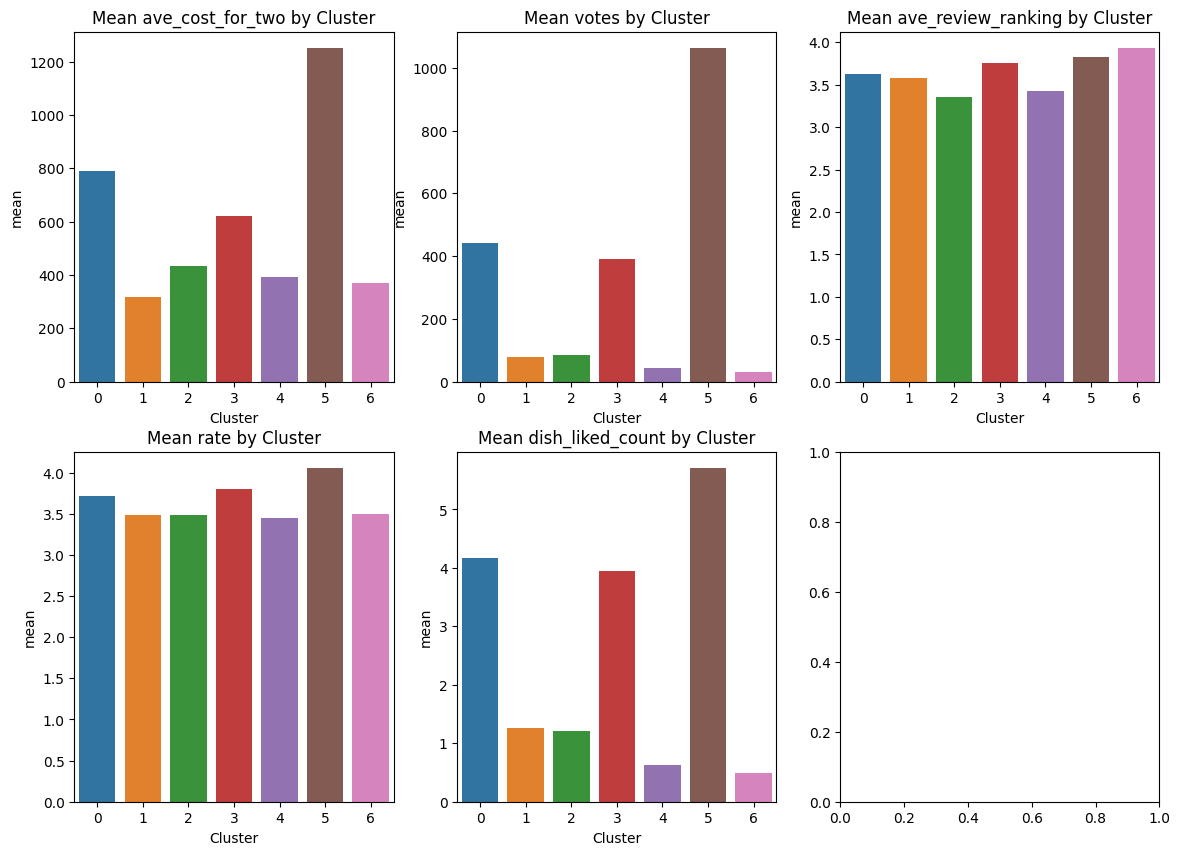

In [ ]:
#Visualize numerical columns with histogram
fig = plt.subplots(nrows = 2,ncols = 3,figsize = (14,10))
for i in range(len(numerical_variables)):
    plt.subplot(2,3,i+1)
    ax= sns.barplot(x=df_imputed.groupby('Cluster')[numerical_variables[i]].describe().index,y=df_imputed.groupby('Cluster')[numerical_variables[i]].describe()['mean'])

    plt.title(f"Mean {numerical_variables[i]} by Cluster")
plt.show()

ave_cost_for_two :

           count         mean         std    min     25%     50%     75%  \
Cluster                                                                    
0        10326.0   789.954000  331.919584  200.0   600.0   700.0   900.0   
1        19129.0   317.400282  124.210254   40.0   200.0   300.0   400.0   
2         2595.0   432.383044  145.800649   60.0   300.0   450.0   500.0   
3         3732.0   620.659164  241.771237   50.0   500.0   600.0   750.0   
4         2035.0   392.894840  177.696524  100.0   300.0   400.0   500.0   
5         1154.0  1249.740035  373.438434  400.0  1000.0  1200.0  1500.0   
6         1141.0   370.315513  127.047741   50.0   300.0   400.0   500.0   

            max  
Cluster          
0        2500.0  
1        1000.0  
2        1000.0  
3        2200.0  
4        1600.0  
5        2500.0  
6         900.0  




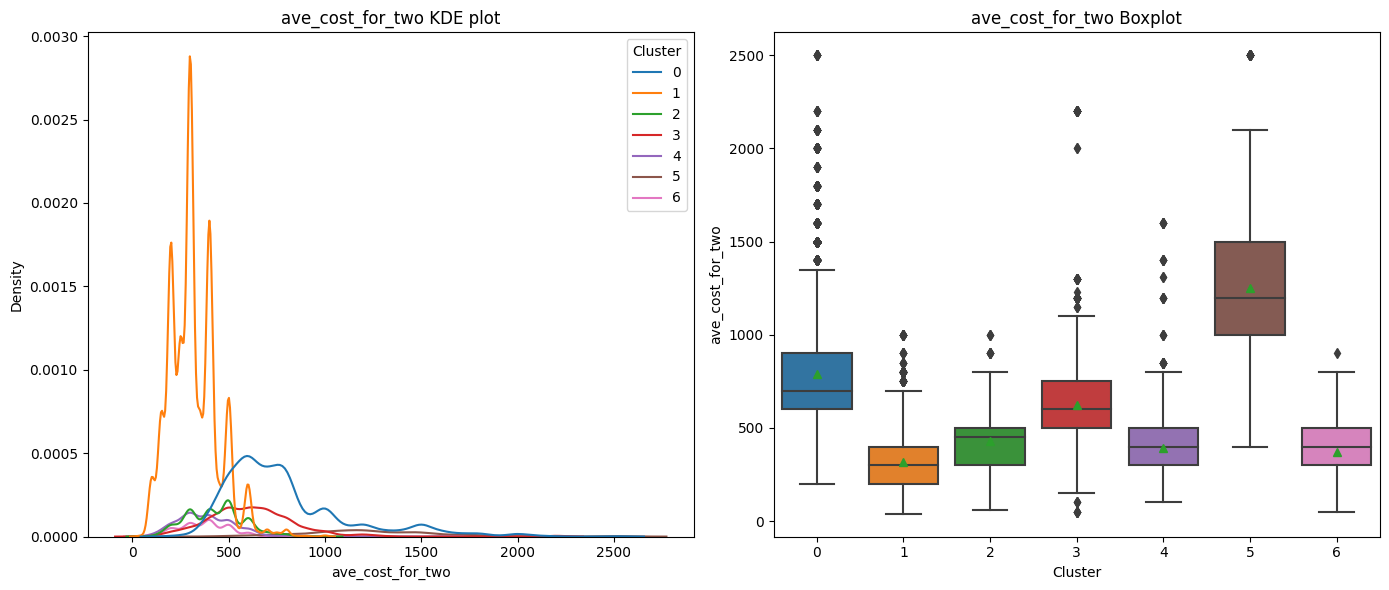

votes :

           count         mean          std  min     25%    50%     75%  \
Cluster                                                                  
0        10326.0   440.466880   802.418732  0.0   41.00  158.0   472.0   
1        19129.0    77.237022   199.578216  0.0    0.00   17.0    69.0   
2         2595.0    86.214644   189.295508  0.0    0.00   12.0    63.0   
3         3732.0   389.813237   742.179323  0.0   23.75   94.0   401.0   
4         2035.0    44.361671   102.841440  0.0    0.00   10.0    36.0   
5         1154.0  1061.878683  1564.716619  0.0  130.00  509.0  1365.0   
6         1141.0    31.186678    81.779803  0.0    0.00    8.0    28.0   

             max  
Cluster           
0        12121.0  
1         4460.0  
2         1238.0  
3         7137.0  
4         1054.0  
5        10550.0  
6         1161.0  




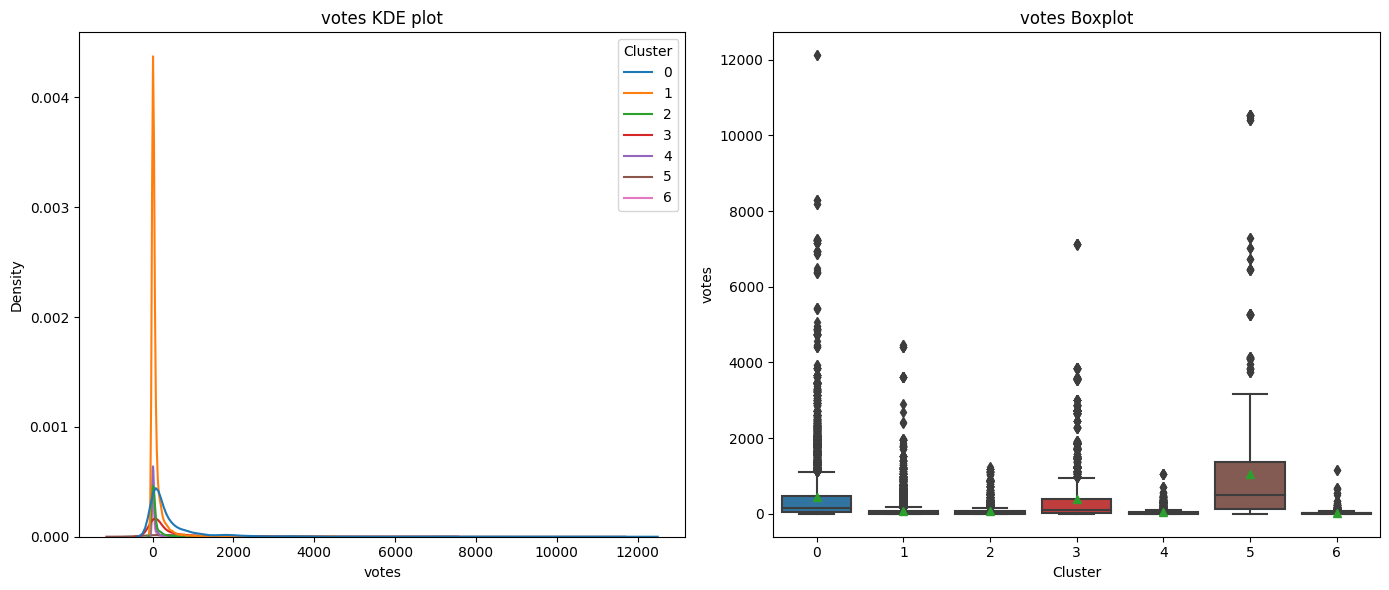

ave_review_ranking :

           count      mean       std  min       25%       50%       75%  max
Cluster                                                                     
0        10326.0  3.626693  0.763986  1.0  3.200000  3.750000  4.090909  5.0
1        19129.0  3.581444  0.911457  1.0  3.000000  3.717391  4.133333  5.0
2         2595.0  3.356152  1.075429  1.0  2.571429  3.500000  4.010686  5.0
3         3732.0  3.751641  0.719050  1.0  3.490244  3.905280  4.142857  5.0
4         2035.0  3.430360  1.055816  1.0  2.822727  3.403162  4.288690  5.0
5         1154.0  3.830525  0.533710  1.0  3.589208  3.916165  4.179601  5.0
6         1141.0  3.927745  0.884266  1.0  3.444444  4.000000  4.625000  5.0




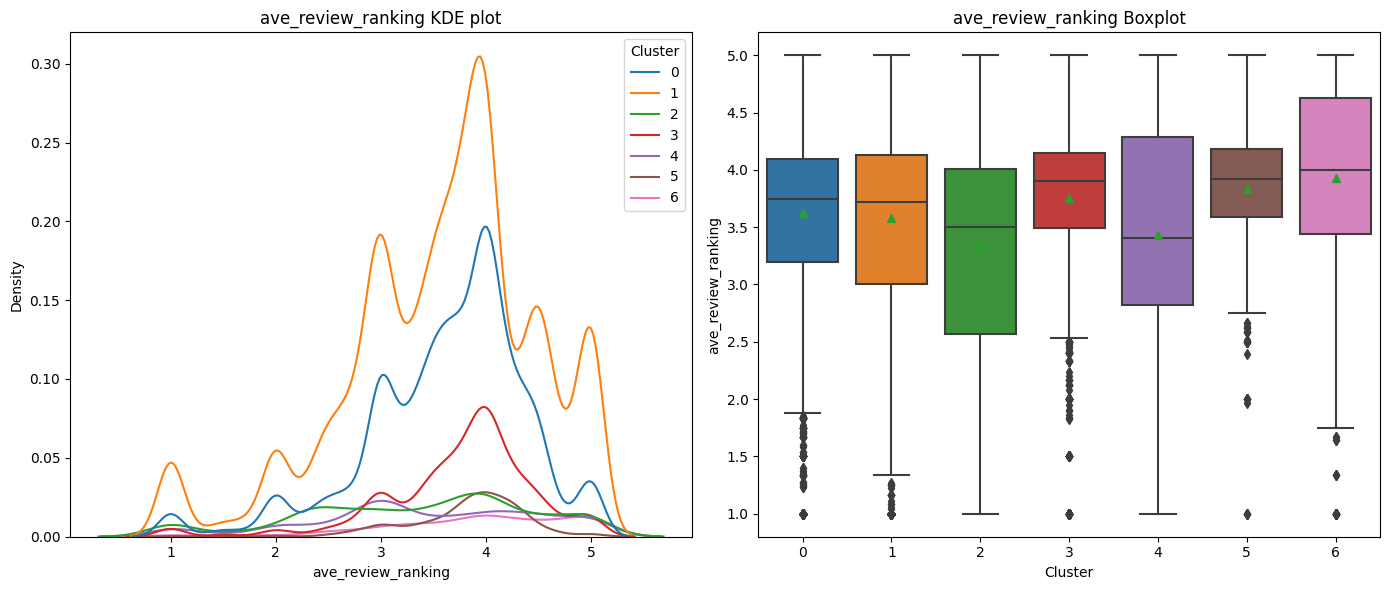

rate :

           count      mean       std  min  25%  50%  75%  max
Cluster                                                      
0        10326.0  3.713357  0.464759  1.8  3.4  3.8  4.0  4.9
1        19129.0  3.488187  0.326164  2.1  3.3  3.4  3.7  4.8
2         2595.0  3.482408  0.359056  2.1  3.3  3.4  3.7  4.6
3         3732.0  3.803017  0.431582  2.3  3.5  3.9  4.1  4.6
4         2035.0  3.449420  0.311897  2.5  3.3  3.4  3.6  4.5
5         1154.0  4.050598  0.452035  2.3  3.9  4.1  4.4  4.9
6         1141.0  3.498791  0.290679  2.7  3.3  3.4  3.7  4.8




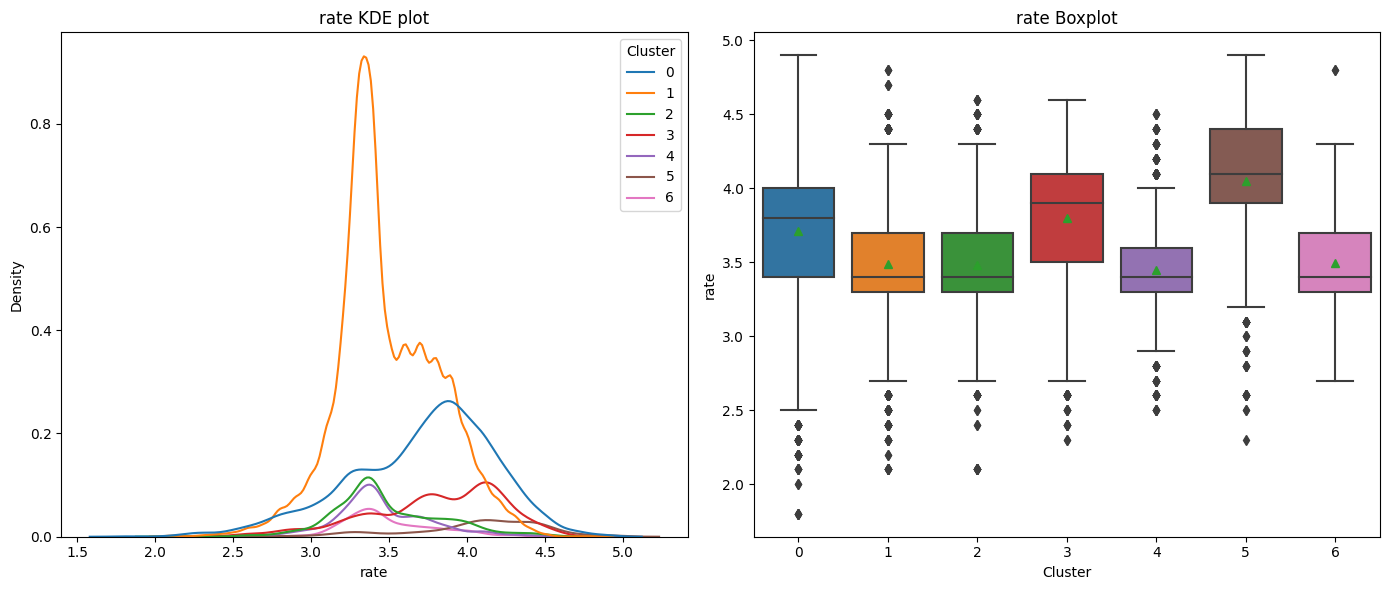

dish_liked_count :

           count      mean       std  min  25%  50%  75%  max
Cluster                                                      
0        10326.0  4.166957  3.103043  0.0  0.0  6.0  7.0  7.0
1        19129.0  1.268284  2.357937  0.0  0.0  0.0  1.0  7.0
2         2595.0  1.203083  2.316677  0.0  0.0  0.0  1.0  7.0
3         3732.0  3.950429  3.234423  0.0  0.0  6.0  7.0  7.0
4         2035.0  0.629975  1.661403  0.0  0.0  0.0  0.0  7.0
5         1154.0  5.702773  2.524992  0.0  7.0  7.0  7.0  7.0
6         1141.0  0.483786  1.420696  0.0  0.0  0.0  0.0  7.0




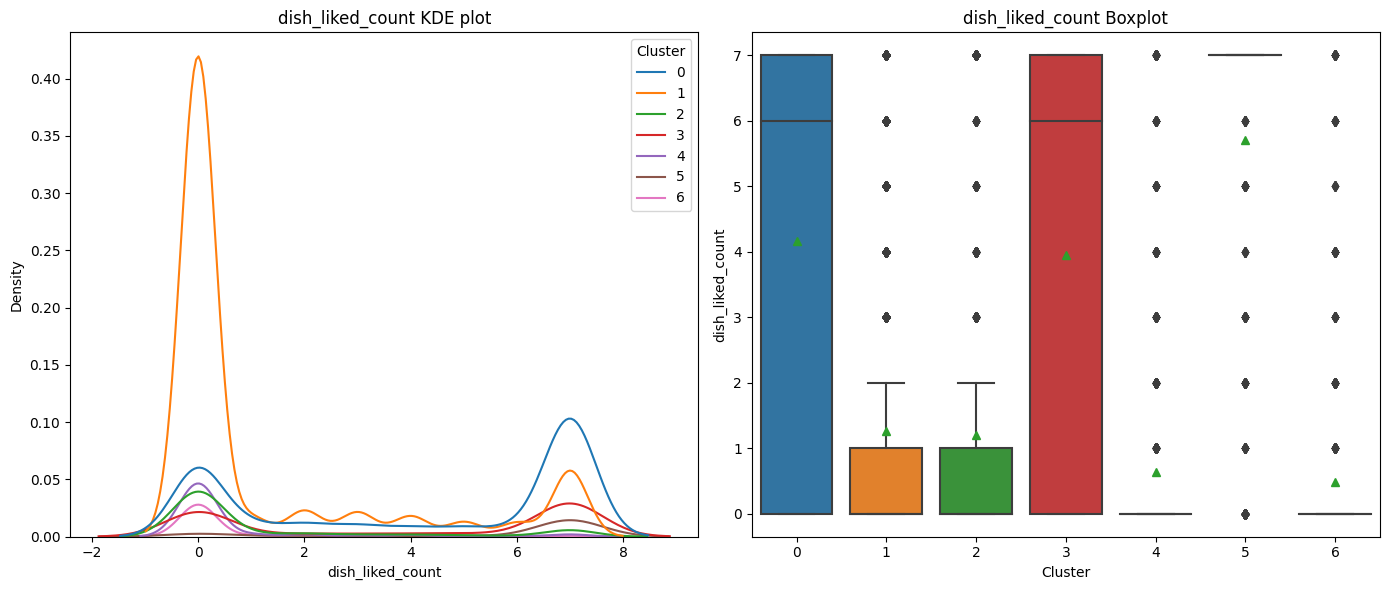

In [ ]:

for i in numerical_variables:
  print(i, ':\n')
  print(df_imputed.groupby('Cluster')[i].describe())
  print('\n')

  # Create subplots
  fig, axes = plt.subplots(1, 2, figsize=(14, 6))

  # Plot KDE on the first subplot
  sns.kdeplot(data=df_imputed, x=i, hue='Cluster', palette='tab10', ax=axes[0])
  axes[0].set_title(f'{i} KDE plot')

  # Plot Boxplot on the second subplot
  sns.boxplot(data=df_imputed, x='Cluster', y=i, showmeans=True, ax=axes[1])
  axes[1].set_title(f'{i} Boxplot')

  plt.tight_layout()  # Adjust layout so plots do not overlap
  plt.show()

In [ ]:
df_imputed.head()

ave_cost_for_two  votes  ave_review_ranking  rate  rest_type_Bakery  \
0             700.0   13.0                4.75   3.6               0.0   
1             400.0   28.0                4.50   3.8               0.0   
2             200.0   18.0                4.00   3.9               0.0   
3            1200.0  550.0                4.80   4.3               0.0   
4             250.0   67.0                3.00   3.7               0.0   

   rest_type_Cafe  rest_type_Casual Dining  rest_type_Casual Dining, Bar  \
0             1.0                      0.0                           0.0   
1             0.0                      0.0                           0.0   
2             0.0                      0.0                           0.0   
3             0.0                      1.0                           0.0   
4             1.0                      0.0                           0.0   

   rest_type_Delivery  rest_type_Quick Bites  rest_type_Takeaway, Delivery  \
0                 0.0                    0.0                           0.0   
1                 0.0                    1.0                           0.0   
2                 0.0                    1.0                           0.0   
3                 0.0                    0.0                           0.0   
4                 0.0                    0.0                           0.0   

   online_order_No  online_order_Yes  book_table_No  book_table_Yes  \
0              1.0               0.0            1.0             0.0   
1              0.0               1.0            1.0             0.0   
2              0.0               1.0            1.0             0.0   
3              0.0               1.0            0.0             1.0   
4              0.0               1.0            1.0             0.0   

   dish_liked_count  Cluster  
0                 0        2  
1                 0        5  
2                 0        5  
3                 7        0  
4                 5        2

<Figure size 1400x2000 with 0 Axes>

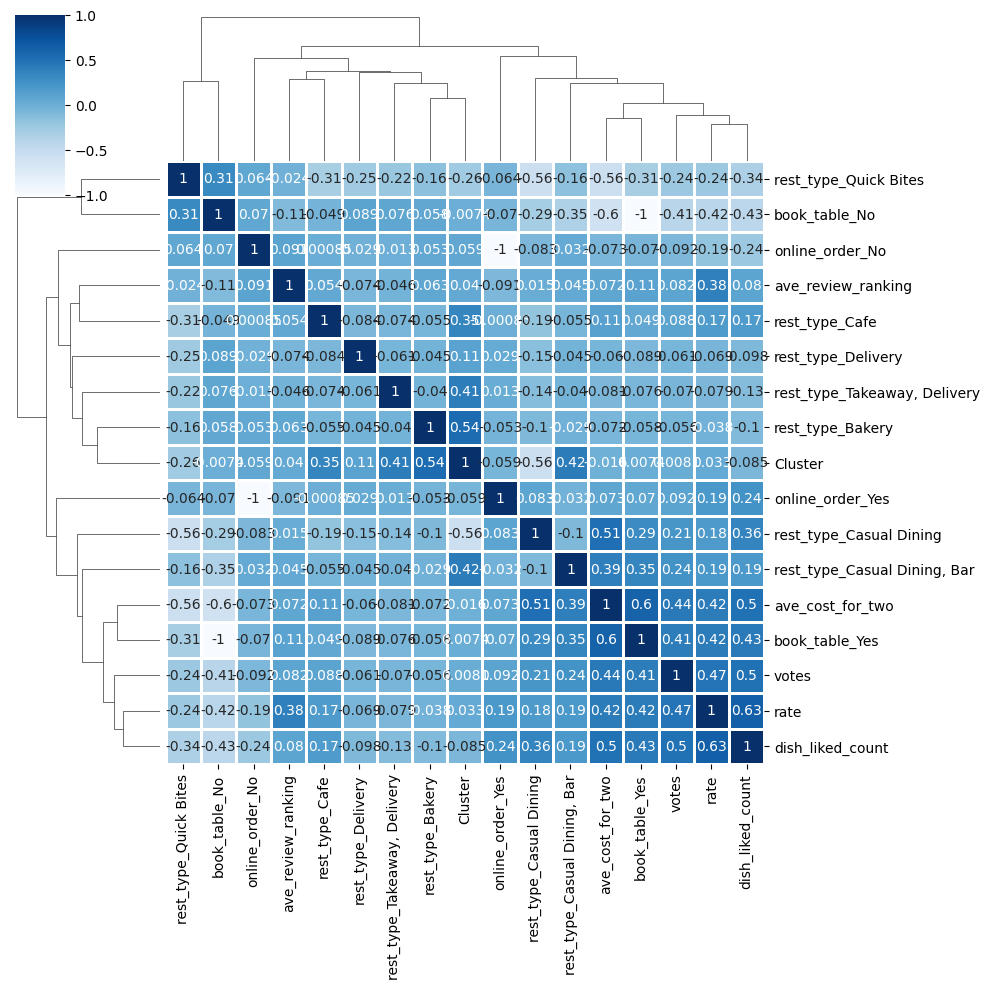

In [ ]:
fig = plt.figure(figsize=(14, 20))
sns.clustermap(data=df_imputed.corr(), cmap="Blues", linewidths=.9, annot=True)

In [ ]:
food_data

rest_type                            cuisines listed_in_type  \
0                    Cafe                                cafe          Cafes   
1             Quick Bites        burger continental fast food       Dine-out   
2             Quick Bites           south indian healthy food       Delivery   
3           Casual Dining  chinese north indian biryani kebab       Delivery   
4                    Cafe                            cafe tea       Dine-out   
...                   ...                                 ...            ...   
40107  Takeaway, Delivery                     pizza fast food       Delivery   
40108  Takeaway, Delivery                     desserts bakery       Delivery   
40109         Quick Bites  street food beverages north indian       Delivery   
40110         Quick Bites           arabian bbq rolls chinese       Delivery   
40111         Quick Bites             fast food biryani rolls       Delivery   

              listed_in_city online_order book_table  ave_cost_for_two  \
0                   JP Nagar           No         No             700.0   
1      Koramangala 5th Block          Yes         No             400.0   
2                  Jayanagar          Yes         No             200.0   
3               Brigade Road          Yes        Yes            1200.0   
4               New BEL Road          Yes         No             250.0   
...                      ...          ...        ...               ...   
40107             Whitefield           No         No               NaN   
40108           Kammanahalli          Yes         No             500.0   
40109                MG Road           No         No             300.0   
40110              Bellandur          Yes         No             500.0   
40111           Brigade Road          Yes         No             350.0   

                                              dish_liked  votes  \
0                                                    NaN     13   
1                                                    NaN     28   
2                                                    NaN     18   
3      Fish, Dumplings, Biryani, Paneer Tikka Masala,...    550   
4      Ginger Chai, Pakoda, Tea, Paneer Thali, Chole ...     67   
...                                                  ...    ...   
40107                                                NaN     25   
40108                                                NaN     23   
40109                                                NaN     23   
40110  Pita Bread, Rolls, Shawarma Roll, Lebanese Sha...    162   
40111             Rolls, Chicken Tikka Roll, Cheese Roll    163   

       ave_review_ranking  rate  dish_liked_count  Cluster  
0                4.750000   3.6                 0        2  
1                4.500000   3.8                 0        5  
2                4.000000   3.9                 0        5  
3                4.800000   4.3                 7        0  
4                3.000000   3.7                 5        2  
...                   ...   ...               ...      ...  
40107            2.000000   2.9                 0        4  
40108            3.454545   3.6                 0        4  
40109            3.454545   3.1                 0        1  
40110            3.500000   4.0                 6        1  
40111            3.254808   3.1                 3        1  

[40112 rows x 13 columns]

In [ ]:
cate_variables=['rest_type','listed_in_type','online_order','book_table']

In [ ]:
from sklearn.metrics import mutual_info_score

In [ ]:
food_data.isna().sum()

rest_type                 0
cuisines                  0
listed_in_type            0
listed_in_city            0
online_order              0
book_table                0
ave_cost_for_two        237
dish_liked            22761
votes                     0
ave_review_ranking     6374
rate                   8326
dish_liked_count          0
Cluster                   0
dtype: int64

In [ ]:
food_data['rate']=df_imputed['rate']

In [ ]:
mi_scores = {}

# Loop through each categorical feature and calculate MI score
for cat in cate_variables:
    mi_scores[cat] = mutual_info_score(food_data[cat], food_data['rate'])

# Sort features by their MI scores
sorted_scores = sorted(mi_scores.items(), key=lambda x: x[1], reverse=True)

# Display the scores
for feature, score in sorted_scores:
    print(f"{feature}: {score:.3f}")

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/cluster/_supervised.py:64: UserWarning: Clustering metrics expects discrete values but received multiclass values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/cluster/_supervised.py:64: UserWarning: Clustering metrics expects discrete values but received multiclass values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/cluster/_supervised.py:64: UserWarning: Clustering metrics expects discrete values but received binary values for label, and continuous values for target
  warnings.warn(msg, UserWarning)


rest_type: 0.214
book_table: 0.108
online_order: 0.099
listed_in_type: 0.048


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/cluster/_supervised.py:64: UserWarning: Clustering metrics expects discrete values but received binary values for label, and continuous values for target
  warnings.warn(msg, UserWarning)


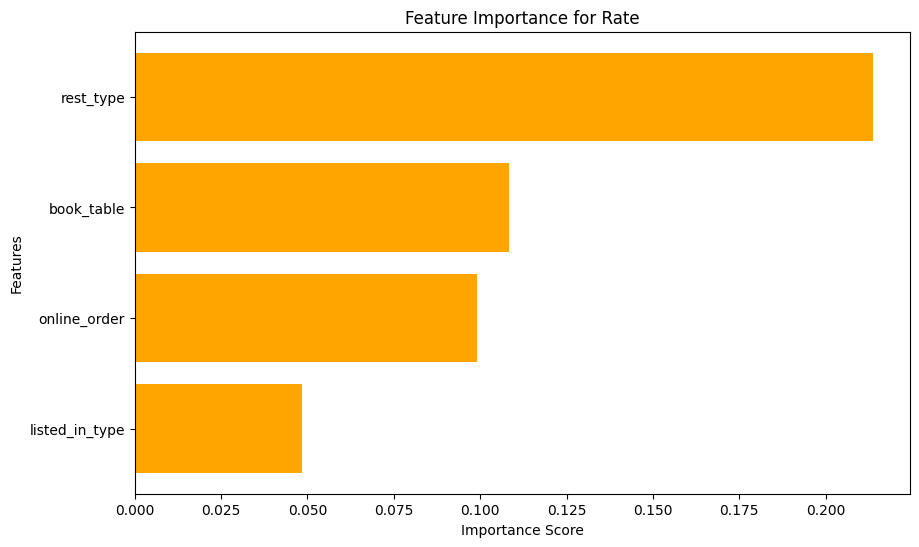

In [ ]:
features, scores = zip(*sorted_scores)
plt.figure(figsize=(10, 6))
plt.barh(features, scores, color='orange')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.title('Feature Importance for Rate')
plt.gca().invert_yaxis()
plt.show()

In [ ]:
cate_variables

['rest_type', 'listed_in_type', 'online_order', 'book_table']

In [ ]:
food_data['Cluster']=df_imputed['Cluster']

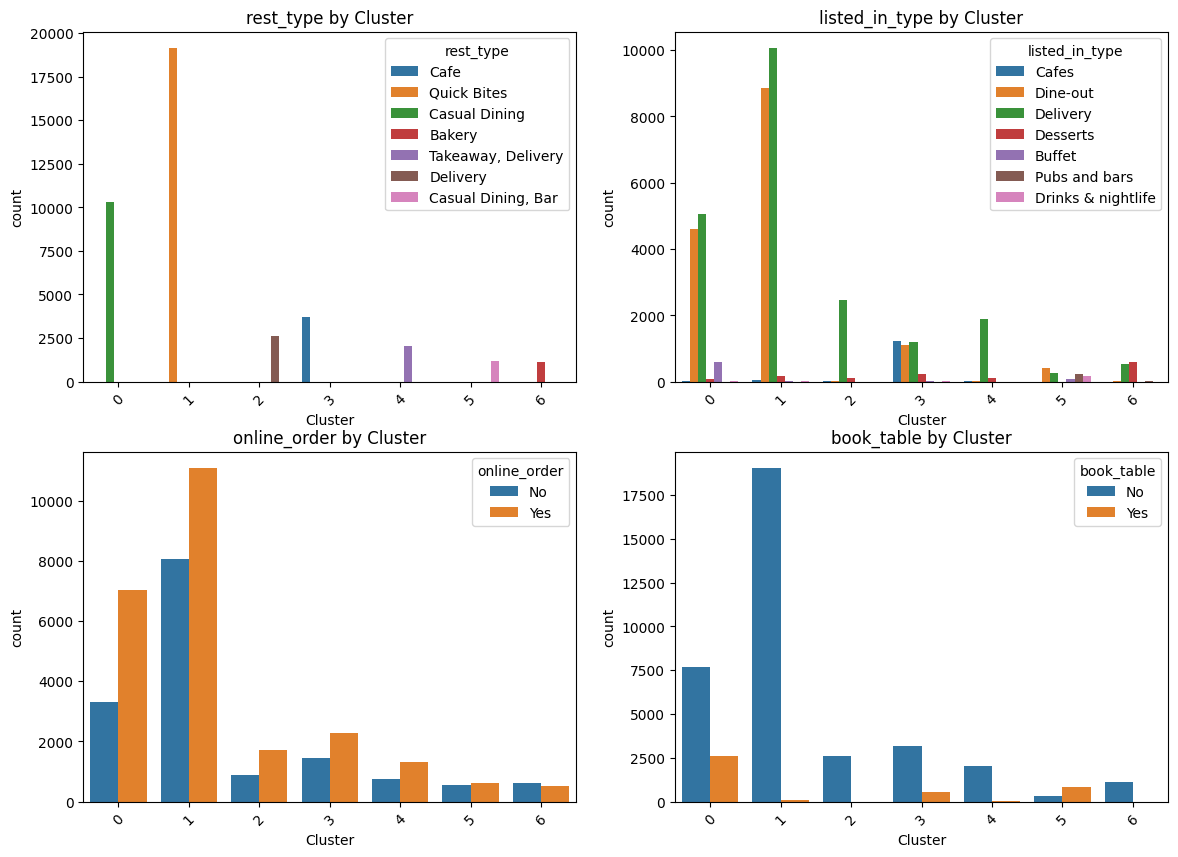

In [ ]:
fig = plt.subplots(nrows = 2,ncols = 2,figsize = (14,10))
for i in range(len(cate_variables)):
    plt.subplot(2,2,i+1)
    sns.countplot(hue=food_data[cate_variables[i]], x=food_data['Cluster'], palette='tab10')
    plt.title(f"{cate_variables[i]} by Cluster")
   # Rotate labels on the x-axis
    plt.xticks(rotation=45)
plt.show()

##### Examine the Cluster with Cuisine


In [ ]:
df_imputed

ave_cost_for_two  votes  ave_review_ranking  rate  rest_type_Bakery  \
0                 700.0   13.0            4.750000   3.6               0.0   
1                 400.0   28.0            4.500000   3.8               0.0   
2                 200.0   18.0            4.000000   3.9               0.0   
3                1200.0  550.0            4.800000   4.3               0.0   
4                 250.0   67.0            3.000000   3.7               0.0   
...                 ...    ...                 ...   ...               ...   
40107             515.0   25.0            2.000000   2.9               0.0   
40108             500.0   23.0            3.454545   3.6               0.0   
40109             300.0   23.0            3.454545   3.1               0.0   
40110             500.0  162.0            3.500000   4.0               0.0   
40111             350.0  163.0            3.254808   3.1               0.0   

       rest_type_Cafe  rest_type_Casual Dining  rest_type_Casual Dining, Bar  \
0                 1.0                      0.0                           0.0   
1                 0.0                      0.0                           0.0   
2                 0.0                      0.0                           0.0   
3                 0.0                      1.0                           0.0   
4                 1.0                      0.0                           0.0   
...               ...                      ...                           ...   
40107             0.0                      0.0                           0.0   
40108             0.0                      0.0                           0.0   
40109             0.0                      0.0                           0.0   
40110             0.0                      0.0                           0.0   
40111             0.0                      0.0                           0.0   

       rest_type_Delivery  rest_type_Quick Bites  \
0                     0.0                    0.0   
1                     0.0                    1.0   
2                     0.0                    1.0   
3                     0.0                    0.0   
4                     0.0                    0.0   
...                   ...                    ...   
40107                 0.0                    0.0   
40108                 0.0                    0.0   
40109                 0.0                    1.0   
40110                 0.0                    1.0   
40111                 0.0                    1.0   

       rest_type_Takeaway, Delivery  online_order_No  online_order_Yes  \
0                               0.0              1.0               0.0   
1                               0.0              0.0               1.0   
2                               0.0              0.0               1.0   
3                               0.0              0.0               1.0   
4                               0.0              0.0               1.0   
...                             ...              ...               ...   
40107                           1.0              1.0               0.0   
40108                           1.0              0.0               1.0   
40109                           0.0              1.0               0.0   
40110                           0.0              0.0               1.0   
40111                           0.0              0.0               1.0   

       book_table_No  book_table_Yes  dish_liked_count  Cluster  
0                1.0             0.0                 0        2  
1                1.0             0.0                 0        5  
2                1.0             0.0                 0        5  
3                0.0             1.0                 7        0  
4                1.0             0.0                 5        2  
...              ...             ...               ...      ...  
40107            1.0             0.0                 0        4  
40108            1.0             0.0                 0        4  
4

In [ ]:
df_count_cuisines

ave_cost_for_two  votes  ave_review_ranking  rate  rest_type_Bakery  \
0                 700.0   13.0            4.750000   3.6               0.0   
1                 400.0   28.0            4.500000   3.8               0.0   
2                 200.0   18.0            4.000000   3.9               0.0   
3                1200.0  550.0            4.800000   4.3               0.0   
4                 250.0   67.0            3.000000   3.7               0.0   
...                 ...    ...                 ...   ...               ...   
40107             515.0   25.0            2.000000   2.9               0.0   
40108             500.0   23.0            3.454545   3.6               0.0   
40109             300.0   23.0            3.454545   3.1               0.0   
40110             500.0  162.0            3.500000   4.0               0.0   
40111             350.0  163.0            3.254808   3.1               0.0   

       rest_type_Cafe  rest_type_Casual Dining  rest_type_Casual Dining, Bar  \
0                 1.0                      0.0                           0.0   
1                 0.0                      0.0                           0.0   
2                 0.0                      0.0                           0.0   
3                 0.0                      1.0                           0.0   
4                 1.0                      0.0                           0.0   
...               ...                      ...                           ...   
40107             0.0                      0.0                           0.0   
40108             0.0                      0.0                           0.0   
40109             0.0                      0.0                           0.0   
40110             0.0                      0.0                           0.0   
40111             0.0                      0.0                           0.0   

       rest_type_Delivery  rest_type_Quick Bites  ...  vietnamese momos  \
0                     0.0                    0.0  ...                 0   
1                     0.0                    1.0  ...                 0   
2                     0.0                    1.0  ...                 0   
3                     0.0                    0.0  ...                 0   
4                     0.0                    0.0  ...                 0   
...                   ...                    ...  ...               ...   
40107                 0.0                    0.0  ...                 0   
40108                 0.0                    0.0  ...                 0   
40109                 0.0                    1.0  ...                 0   
40110                 0.0                    1.0  ...                 0   
40111                 0.0                    1.0  ...                 0   

       vietnamese salad  vietnamese sri  vietnamese thai  wrap  wrap beverage  \
0                     0               0                0     0              0   
1                     0               0                0     0              0   
2                     0               0                0     0              0   
3                     0               0                0     0              0   
4                     0               0                0     0              0   
...                 ...             ...              ...   ...            ...   
40107                 0               0                0     0              0   
40108                 0               0                0     0              0   
40109                 0               0                0     0              0   
40110                 0               0                0     0              0   
40111                 0               0                0     0              0   

       wrap burger  wrap cafe  wrap pizza  wrap roll  
0                0          0           0          0  
1                0          0           0          0  
2                0          0           0          0  
3              

In [ ]:
count_df_cuisines['Cluster']=df_imputed['Cluster']

In [ ]:
count_df_cuisines

afghan  afghani  afghani mughlai  african  african burger  american  \
0           0        0                0        0               0         0   
1           0        0                0        0               0         0   
2           0        0                0        0               0         0   
3           0        0                0        0               0         0   
4           0        0                0        0               0         0   
...       ...      ...              ...      ...             ...       ...   
40107       0        0                0        0               0         0   
40108       0        0                0        0               0         0   
40109       0        0                0        0               0         0   
40110       0        0                0        0               0         0   
40111       0        0                0        0               0         0   

       american asian  american bakery  american bbq  american beverage  ...  \
0                   0                0             0                  0  ...   
1                   0                0             0                  0  ...   
2                   0                0             0                  0  ...   
3                   0                0             0                  0  ...   
4                   0                0             0                  0  ...   
...               ...              ...           ...                ...  ...   
40107               0                0             0                  0  ...   
40108               0                0             0                  0  ...   
40109               0                0             0                  0  ...   
40110               0                0             0                  0  ...   
40111               0                0             0                  0  ...   

       vietnamese salad  vietnamese sri  vietnamese thai  wrap  wrap beverage  \
0                     0               0                0     0              0   
1                     0               0                0     0              0   
2                     0               0                0     0              0   
3                     0               0                0     0              0   
4                     0               0                0     0              0   
...                 ...             ...              ...   ...            ...   
40107                 0               0                0     0              0   
40108                 0               0                0     0              0   
40109                 0               0                0     0              0   
40110                 0               0                0     0              0   
40111                 0               0                0     0              0   

       wrap burger  wrap cafe  wrap pizza  wrap roll  Cluster  
0                0          0           0          0        2  
1                0          0           0          0        5  
2                0          0           0          0        5  
3                0          0           0          0        0  
4                0          0           0          0        2  
...            ...        ...         ...        ...      ...  
40107            0          0           0          0        4  
40108            0          0           0          0        4  
40109            0          0           0          0        1  
40110            0          0           0          0        1  
40111            0          0           0          0        1  

[40112 rows x 1144 columns]

In [ ]:
df_count_cuisines

ave_cost_for_two  votes  ave_review_ranking  rate  rest_type_Bakery  \
0                 700.0   13.0            4.750000   3.6               0.0   
1                 400.0   28.0            4.500000   3.8               0.0   
2                 200.0   18.0            4.000000   3.9               0.0   
3                1200.0  550.0            4.800000   4.3               0.0   
4                 250.0   67.0            3.000000   3.7               0.0   
...                 ...    ...                 ...   ...               ...   
40107             515.0   25.0            2.000000   2.9               0.0   
40108             500.0   23.0            3.454545   3.6               0.0   
40109             300.0   23.0            3.454545   3.1               0.0   
40110             500.0  162.0            3.500000   4.0               0.0   
40111             350.0  163.0            3.254808   3.1               0.0   

       rest_type_Cafe  rest_type_Casual Dining  rest_type_Casual Dining, Bar  \
0                 1.0                      0.0                           0.0   
1                 0.0                      0.0                           0.0   
2                 0.0                      0.0                           0.0   
3                 0.0                      1.0                           0.0   
4                 1.0                      0.0                           0.0   
...               ...                      ...                           ...   
40107             0.0                      0.0                           0.0   
40108             0.0                      0.0                           0.0   
40109             0.0                      0.0                           0.0   
40110             0.0                      0.0                           0.0   
40111             0.0                      0.0                           0.0   

       rest_type_Delivery  rest_type_Quick Bites  ...  vietnamese salad  \
0                     0.0                    0.0  ...                 0   
1                     0.0                    1.0  ...                 0   
2                     0.0                    1.0  ...                 0   
3                     0.0                    0.0  ...                 0   
4                     0.0                    0.0  ...                 0   
...                   ...                    ...  ...               ...   
40107                 0.0                    0.0  ...                 0   
40108                 0.0                    0.0  ...                 0   
40109                 0.0                    1.0  ...                 0   
40110                 0.0                    1.0  ...                 0   
40111                 0.0                    1.0  ...                 0   

       vietnamese sri  vietnamese thai  wrap  wrap beverage  wrap burger  \
0                   0                0     0              0            0   
1                   0                0     0              0            0   
2                   0                0     0              0            0   
3                   0                0     0              0            0   
4                   0                0     0              0            0   
...               ...              ...   ...            ...          ...   
40107               0                0     0              0            0   
40108               0                0     0              0            0   
40109               0                0     0              0            0   
40110               0                0     0              0            0   
40111               0                0     0              0            0   

       wrap cafe  wrap pizza  wrap roll  Cluster  
0              0           0          0        2  
1              0           0          0        5  
2              0           0          0        5  
3              0           0          0        0  
4              0           0          0 

In [ ]:
count_df_cuisines.groupby(['Cluster']).sum()

afghan  afghani  afghani mughlai  african  african burger  american  \
Cluster                                                                        
0            30        5                2       17              13       186   
1            16        0                0        0               0       109   
2             0        0                0        0               0       344   
3             0        0                0        0               0        90   
4             7        0                0        0               0       161   
5             2        0                0        0               0        60   
6             0        0                0        0               0         0   

         american asian  american bakery  american bbq  american beverage  \
Cluster                                                                     
0                    13                0             5                  0   
1                     0                0             0                  2   
2                     5                0             0                  4   
3                     0                2             0                  0   
4                     4                0            12                  4   
5                     0                1             0                  0   
6                     0                0             0                  0   

         ...  vietnamese momos  vietnamese salad  vietnamese sri  \
Cluster  ...                                                       
0        ...                20                 2              11   
1        ...                 0                 0               0   
2        ...                 0                 0               0   
3        ...                 0                 0               0   
4        ...                 0                 0               0   
5        ...                 0                 0               0   
6        ...                 0                 0               0   

         vietnamese thai  wrap  wrap beverage  wrap burger  wrap cafe  \
Cluster                                                                 
0                      4     7              0            7          0   
1                      0    11              0            0          0   
2                      0    26              6            0          0   
3                      3     6              0            0          0   
4                      0     0              0            0          0   
5                      0     4              0            0          4   
6                      0     0              0            0          0   

         wrap pizza  wrap roll  
Cluster                         
0                 0          0  
1                 0         11  
2                20          0  
3                 0          6  
4                 0          0  
5                 0          0  
6                 0          0  

[7 rows x 1143 columns]

In [ ]:
pd.Series(count_df_cuisines[count_df_cuisines['Cluster']==0].sum()).sort_values(ascending=False).head(50)

indian                 9023
north                  6837
north indian           6814
chinese                5735
indian chinese         3236
south                  2175
south indian           2175
biryani                1964
continental            1230
seafood                1132
andhra                  943
food                    927
mughlai                 879
italian                 736
indian north            657
indian south            628
thai                    592
chinese north           575
fast                    541
fast food               541
asian                   505
indian mughlai          496
kerala                  470
arabian                 438
momos                   410
biryani north           407
indian biryani          402
mangalorean             399
chinese thai            384
beverage                381
chinese biryani         333
andhra north            295
salad                   290
bbq                     290
pizza                   276
street              

In [ ]:
pd.Series(count_df_cuisines[count_df_cuisines['Cluster']==1].sum()).sort_values(ascending=False).head(50)

Cluster            12005
indian              8680
north               5454
north indian        5444
chinese             4170
food                3692
south indian        3230
south               3230
fast                2719
fast food           2719
indian chinese      2601
biryani             2324
street food          878
street               878
indian north         705
roll                 702
beverage             625
chinese north        490
kerala               476
kebab                472
indian south         426
indian biryani       405
burger               393
indian fast          360
arabian              359
momos                329
andhra               321
food beverage        286
chinese fast         272
juice                262
mughlai              253
pizza                251
biryani north        228
biryani kebab        225
indian street        213
chinese biryani      212
food roll            201
seafood              196
italian              193
bengali              191


In [ ]:
food_data

NameError: ignored

In [ ]:
from wordcloud import WordCloud

In [ ]:
sorted(food_data['Cluster'].unique().tolist())

[0, 1, 2, 3, 4, 5, 6]

In [ ]:
food_data.head()

rest_type                            cuisines listed_in_type  \
0           Cafe                                cafe          Cafes   
1    Quick Bites        burger continental fast food       Dine-out   
2    Quick Bites           south indian healthy food       Delivery   
3  Casual Dining  chinese north indian biryani kebab       Delivery   
4           Cafe                            cafe tea       Dine-out   

          listed_in_city online_order book_table  ave_cost_for_two  \
0               JP Nagar           No         No             700.0   
1  Koramangala 5th Block          Yes         No             400.0   
2              Jayanagar          Yes         No             200.0   
3           Brigade Road          Yes        Yes            1200.0   
4           New BEL Road          Yes         No             250.0   

                                          dish_liked  votes  \
0                                                NaN     13   
1                                                NaN     28   
2                                                NaN     18   
3  Fish, Dumplings, Biryani, Paneer Tikka Masala,...    550   
4  Ginger Chai, Pakoda, Tea, Paneer Thali, Chole ...     67   

   ave_review_ranking  rate  dish_liked_count  Cluster  
0                4.75   3.6                 0        3  
1                4.50   3.8                 0        1  
2                4.00   3.9                 0        1  
3                4.80   4.3                 7        0  
4                3.00   3.7                 5        3

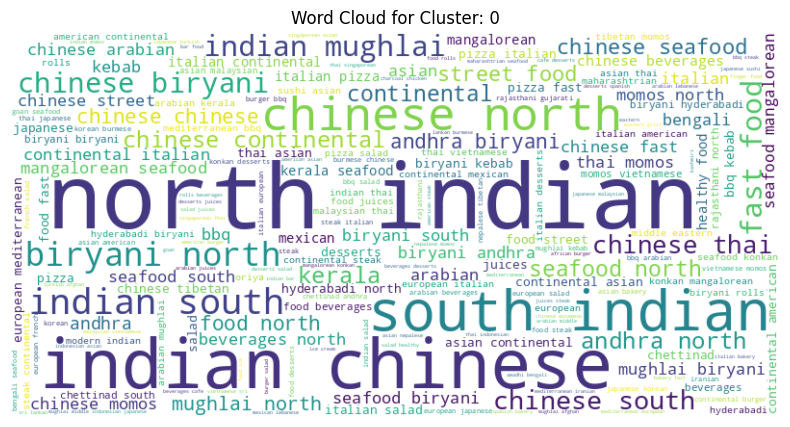

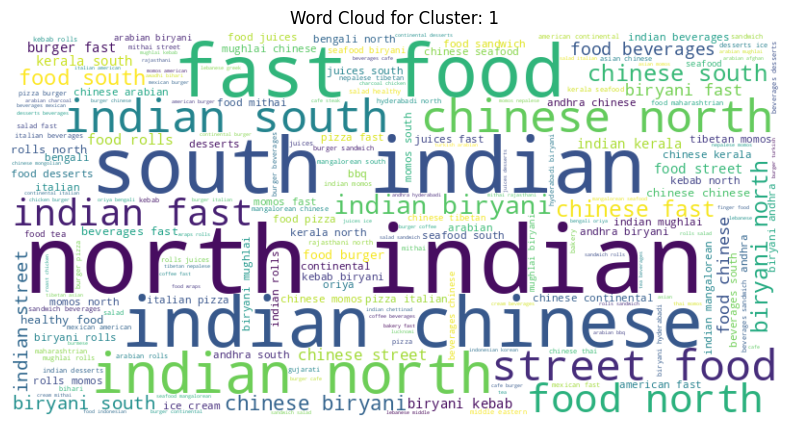

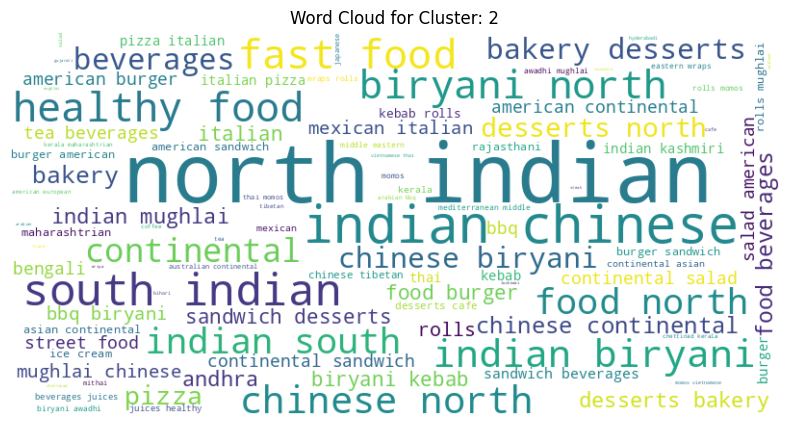

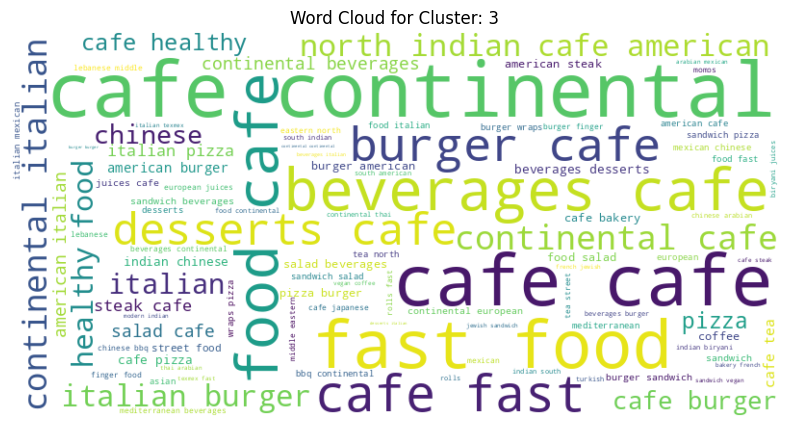

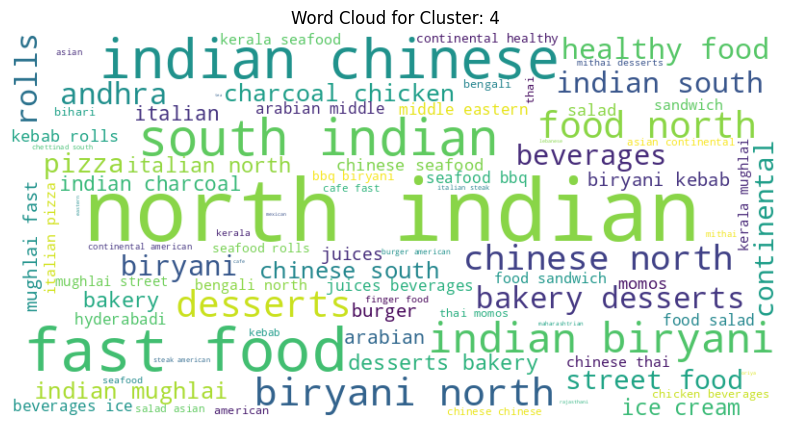

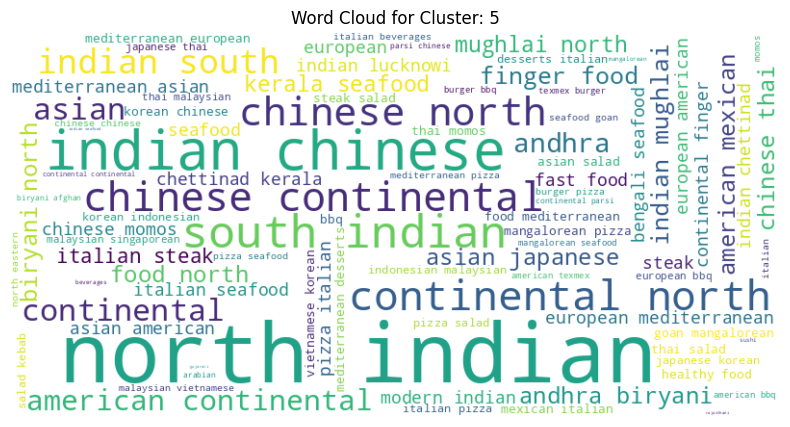

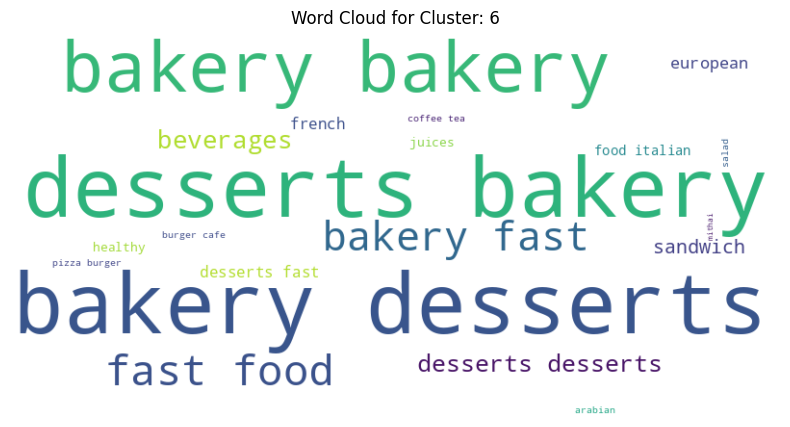

In [ ]:

# Create a word cloud for each quantile
for cl in sorted(food_data['Cluster'].unique().tolist()):
    # Filter the DataFrame for the specific quantile
    cluster = food_data[food_data['Cluster'] == cl]

    # Concatenate 'clean_description' text within the quantile
    text = ' '.join(cluster['cuisines'])

    # Create a WordCloud object
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

    # Plot the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for Cluster: {cl}')
    plt.axis('off')
    plt.show()

# ANSWER QUESTION FROM FOODIEBAY

# New Section

1. How many restaurants offer table booking, and what does it have on ratings?

In [ ]:
food_data.head()

rest_type                               cuisines listed_in_type  \
0           Cafe                                   Cafe          Cafes   
1    Quick Bites         Burger, Continental, Fast Food       Dine-out   
2    Quick Bites             South Indian, Healthy Food       Delivery   
3  Casual Dining  Chinese, North Indian, Biryani, Kebab       Delivery   
4           Cafe                              Cafe, Tea       Dine-out   

          listed_in_city online_order book_table  ave_cost_for_two  \
0               JP Nagar           No         No             700.0   
1  Koramangala 5th Block          Yes         No             400.0   
2              Jayanagar          Yes         No             200.0   
3           Brigade Road          Yes        Yes            1200.0   
4           New BEL Road          Yes         No             250.0   

                                          dish_liked  votes  \
0                                                NaN     13   
1                                                NaN     28   
2                                                NaN     18   
3  Fish, Dumplings, Biryani, Paneer Tikka Masala,...    550   
4  Ginger Chai, Pakoda, Tea, Paneer Thali, Chole ...     67   

   ave_review_ranking  rate  
0                4.75   3.6  
1                4.50   3.8  
2                4.00   3.9  
3                4.80   4.3  
4                3.00   3.7

In [ ]:
food_data.columns

Index(['rest_type', 'cuisines', 'listed_in_type', 'listed_in_city',
       'online_order', 'book_table', 'ave_cost_for_two', 'dish_liked', 'votes',
       'ave_review_ranking', 'rate'],
      dtype='object')

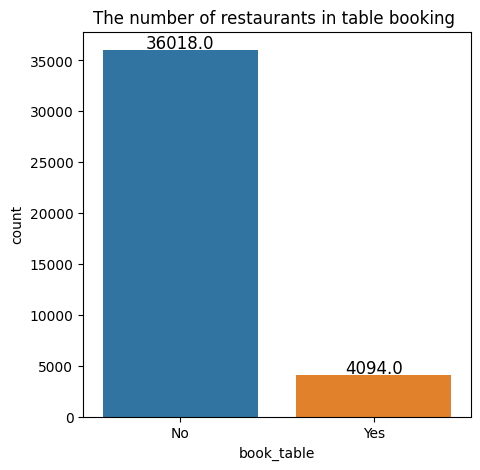

In [ ]:
plt.figure(figsize=(5,5))
ax= sns.countplot(x='book_table',data=food_data)
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.title('The number of restaurants in table booking ')
plt.show()


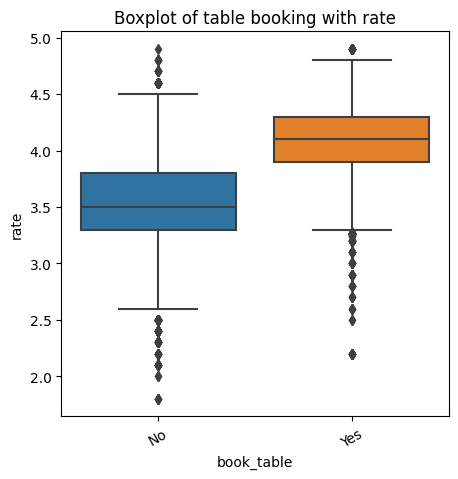

In [ ]:
plt.figure(figsize=(5,5))
ax = sns.boxplot(data=df_food,x='book_table',y='rate')
plt.xticks(rotation=30)
plt.title(f"Boxplot of table booking with rate")
plt.show()

2. How many restaurants offer online ordering, and what impact does it have on ratings?

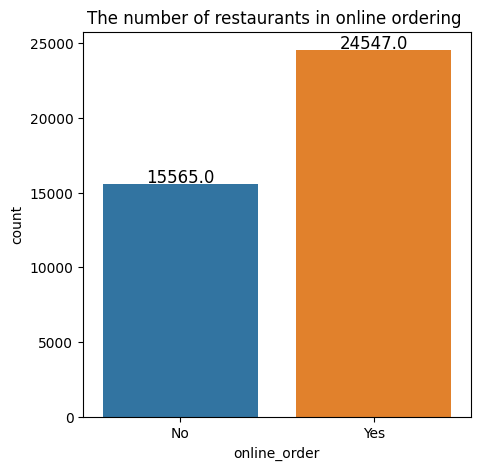

In [ ]:
plt.figure(figsize=(5,5))
ax= sns.countplot(x='online_order',data=food_data)
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.title('The number of restaurants in online ordering ')
plt.show()

In [ ]:
food_data['rate'].isna().sum()

8326

In [ ]:
df_imputed.head()

ave_cost_for_two  votes  ave_review_ranking  rate  rest_type_Bakery  \
0             700.0   13.0                4.75   3.6               0.0   
1             400.0   28.0                4.50   3.8               0.0   
2             200.0   18.0                4.00   3.9               0.0   
3            1200.0  550.0                4.80   4.3               0.0   
4             250.0   67.0                3.00   3.7               0.0   

   rest_type_Cafe  rest_type_Casual Dining  rest_type_Casual Dining, Bar  \
0             1.0                      0.0                           0.0   
1             0.0                      0.0                           0.0   
2             0.0                      0.0                           0.0   
3             0.0                      1.0                           0.0   
4             1.0                      0.0                           0.0   

   rest_type_Delivery  rest_type_Quick Bites  rest_type_Takeaway, Delivery  \
0                 0.0                    0.0                           0.0   
1                 0.0                    1.0                           0.0   
2                 0.0                    1.0                           0.0   
3                 0.0                    0.0                           0.0   
4                 0.0                    0.0                           0.0   

   online_order_No  online_order_Yes  book_table_No  book_table_Yes  
0              1.0               0.0            1.0             0.0  
1              0.0               1.0            1.0             0.0  
2              0.0               1.0            1.0             0.0  
3              0.0               1.0            0.0             1.0  
4              0.0               1.0            1.0             0.0

In [ ]:
df_food=food_data.copy()

In [ ]:

df_food['rate']=df_imputed['rate']

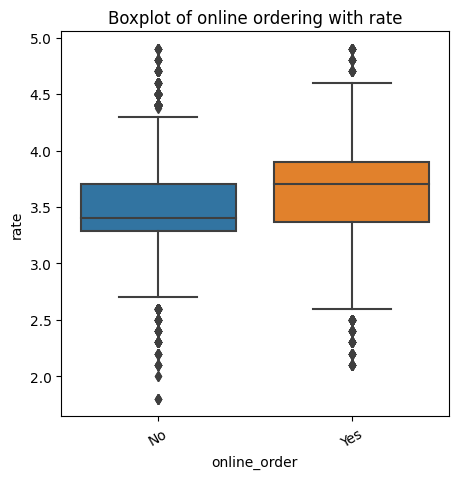

In [ ]:
plt.figure(figsize=(5,5))
ax = sns.boxplot(data=df_food,x='online_order',y='rate')
plt.xticks(rotation=30)
plt.title(f"Boxplot of online ordering with rate")
plt.show()

3. What is the effect of the average cost for two and the average customer review ranking on the overall rating?

In [ ]:
food_data['rate'].isna().sum()

8326

Text(0.5, 1.0, 'Scatterplot of log of ave_cost_for_two with rate')

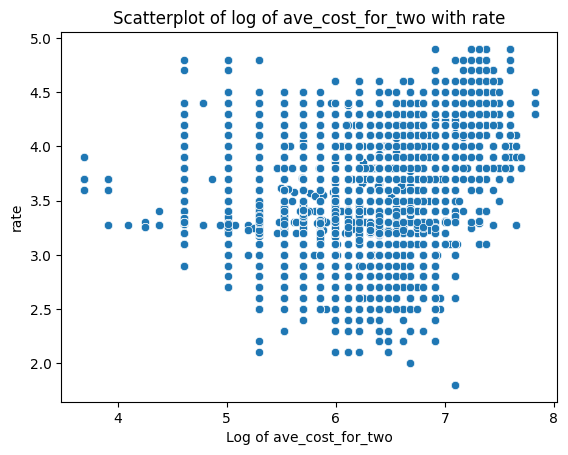

In [ ]:
sns.scatterplot(data=df_imputed, x=np.log(df_imputed['ave_cost_for_two']),y='rate')
plt.xlabel('Log of ave_cost_for_two')
plt.title('Scatterplot of log of ave_cost_for_two with rate')


Text(0.5, 1.0, 'Scatterplot of ave review ranking with rate')

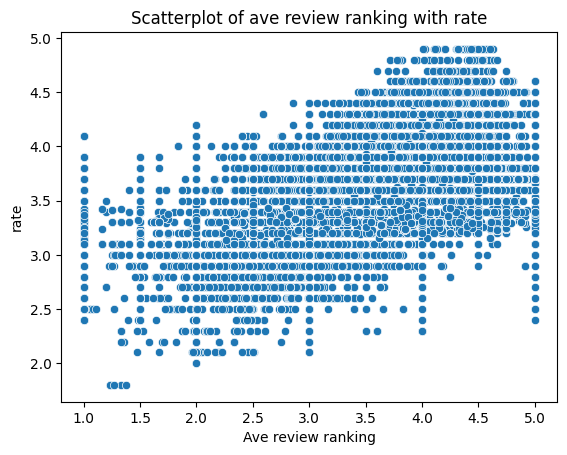

In [ ]:
sns.scatterplot(data=df_imputed, x=df_imputed['ave_review_ranking'],y='rate')
plt.xlabel('Ave review ranking')
plt.title('Scatterplot of ave review ranking with rate')


<Axes: >

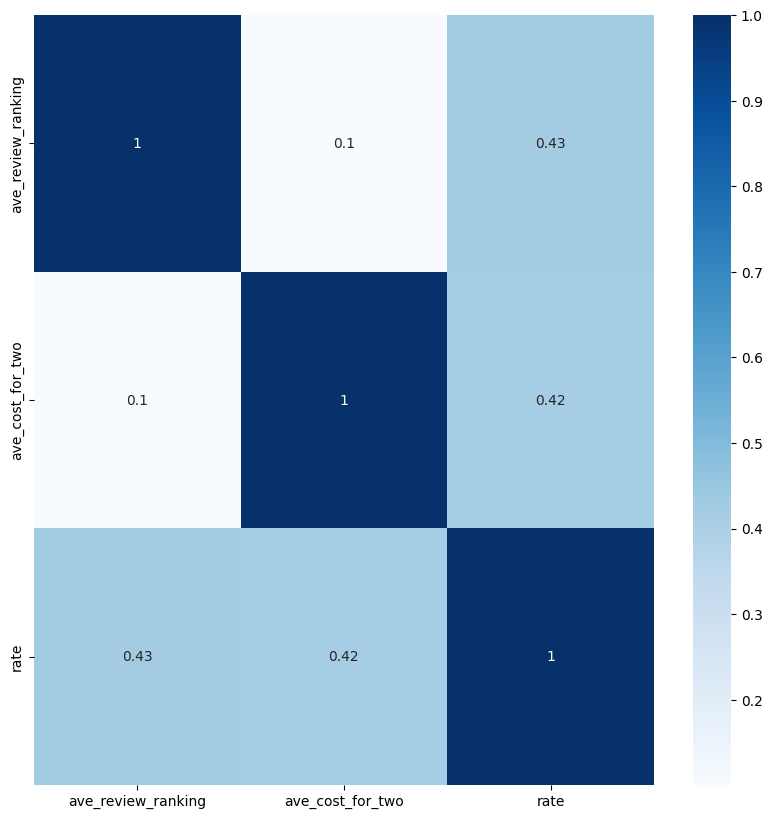

In [ ]:
plt.figure(figsize=(10, 10))

sns.heatmap(data=df_food[['ave_review_ranking','ave_cost_for_two','rate']].corr(),  cmap='Blues', annot=True)

4. How do ratings and average costs for two vary among the restaurant types?

In [ ]:
df_food.head()

rest_type                               cuisines listed_in_type  \
0           Cafe                                   Cafe          Cafes   
1    Quick Bites         Burger, Continental, Fast Food       Dine-out   
2    Quick Bites             South Indian, Healthy Food       Delivery   
3  Casual Dining  Chinese, North Indian, Biryani, Kebab       Delivery   
4           Cafe                              Cafe, Tea       Dine-out   

          listed_in_city online_order book_table  ave_cost_for_two  \
0               JP Nagar           No         No             700.0   
1  Koramangala 5th Block          Yes         No             400.0   
2              Jayanagar          Yes         No             200.0   
3           Brigade Road          Yes        Yes            1200.0   
4           New BEL Road          Yes         No             250.0   

                                          dish_liked  votes  \
0                                                NaN     13   
1                                                NaN     28   
2                                                NaN     18   
3  Fish, Dumplings, Biryani, Paneer Tikka Masala,...    550   
4  Ginger Chai, Pakoda, Tea, Paneer Thali, Chole ...     67   

   ave_review_ranking  rate  
0                4.75   3.6  
1                4.50   3.8  
2                4.00   3.9  
3                4.80   4.3  
4                3.00   3.7

<Axes: xlabel='rate', ylabel='Density'>

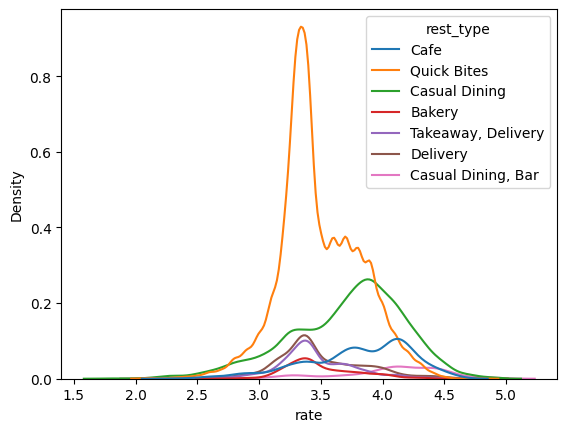

In [ ]:
 sns.kdeplot(data=df_food, x='rate', hue='rest_type', palette='tab10')

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Cafe'),
  Text(1, 0, 'Quick Bites'),
  Text(2, 0, 'Casual Dining'),
  Text(3, 0, 'Bakery'),
  Text(4, 0, 'Takeaway, Delivery'),
  Text(5, 0, 'Delivery'),
  Text(6, 0, 'Casual Dining, Bar')])

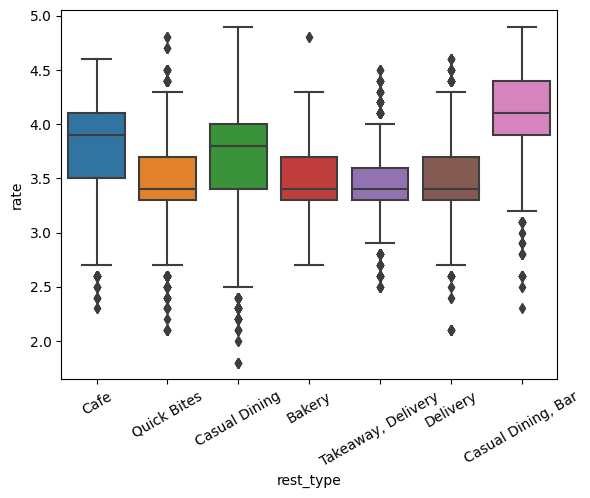

In [ ]:
sns.boxplot(data=df_food,x='rest_type',y='rate')
plt.xticks(rotation=30)

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Cafe'),
  Text(1, 0, 'Quick Bites'),
  Text(2, 0, 'Casual Dining'),
  Text(3, 0, 'Bakery'),
  Text(4, 0, 'Takeaway, Delivery'),
  Text(5, 0, 'Delivery'),
  Text(6, 0, 'Casual Dining, Bar')])

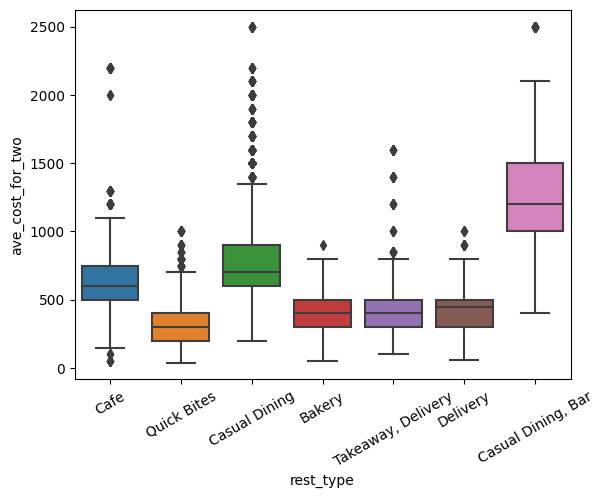

In [ ]:
sns.boxplot(data=df_food,x='rest_type',y='ave_cost_for_two')
plt.xticks(rotation=30)

In [ ]:
from sklearn.metrics import mutual_info_score

<Axes: xlabel='ave_cost_for_two', ylabel='Density'>

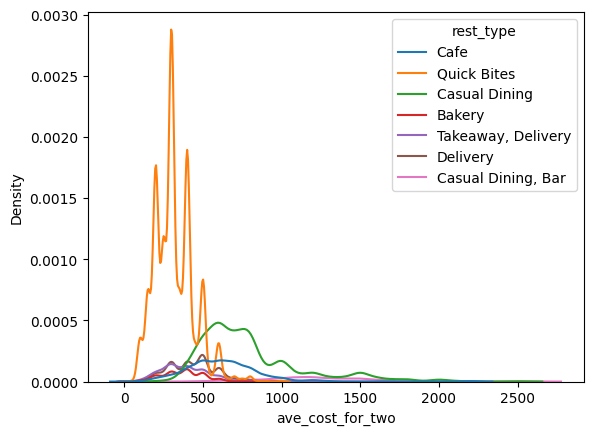

In [ ]:
 sns.kdeplot(data=df_food, x='ave_cost_for_two', hue='rest_type', palette='tab10')

In [ ]:
df_food.isna().sum()

rest_type                 0
cuisines                  0
listed_in_type            0
listed_in_city            0
online_order              0
book_table                0
ave_cost_for_two        237
dish_liked            22761
votes                     0
ave_review_ranking     6374
rate                      0
dtype: int64

In [ ]:
df_food['ave_cost_for_two']=df_imputed['ave_cost_for_two']

In [ ]:
#mutual info score of ave_cost_for_two and res_type
mutual_info_score(df_food['rest_type'], df_food['ave_cost_for_two'])

0.45200066593570126

In [ ]:
#mutual_info_score of rest_type and r
mutual_info_score(df_food['rest_type'], df_food['rate'])

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/cluster/_supervised.py:64: UserWarning: Clustering metrics expects discrete values but received multiclass values for label, and continuous values for target
  warnings.warn(msg, UserWarning)


0.21370619758151888